<a href="https://colab.research.google.com/github/David-Kumawat/Retail_Sales_Prediction-Regression/blob/main/Regression_Retail_Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


##**Project Name - Retail Sales Prediction**

Sales Prediction: Predicting sales of a major store chain Rossmann (Regression)

##### **Project Type**    - Supervised(Regression)
##### **Contribution**    - Individual - David Kumawat

# **Project Summary -**

* **Rossman Sales Prediction** data contains historical sales data for a retail store chain. The data includes information about the store such as Competitor's Details, holidays, the number of customers, sale transactions' dates, and the amount of sales on each day. The task was to forecast the "Sales" for the test set.

* After understanding the data and obtaining variables, I first gathered and cleaned the data, handled the **null values**, and, to obtain better results, **merged two datasets**. After that, I also cast the needed features into the required format to visualize them properly. I performed in-depth **EDA** and plotted different types of **graphs**, separating them into univariate, bivariate, and multivariate categories. As a result, I came across some meaningful insights that helped us make future decisions for the ML model pipeline.

* Further, using **feature engineering and data preprocessing**, I extracted new features like **Promotion_Month and Competition_Month** with the help of some features that do not directly impact sales. I also attempted to identify impactful features by addressing **multicollinearity** among the independent variables using **various inflation factors (VIF)**. Under the umbrella of feature engineering and data preprocessing, I detected and treated **outliers** using the IQR technique and capped all outliers of continuous features between the **5th and 90th percentiles**.

* I noticed that some features were **categorical**, and machine learning models cannot understand the language of alphabets (strings). Therefore, I encoded them numerically using the **Label encoding and One-Hot Encoding** technique, as they were unordered in nature. To achieve normally distributed data, I applied various transformation techniques such as **Logarithmic Transformation, Exponential Transformation, Square Root Transformation**, and others. I also plotted **quantile-quantile** plots to visualize how far our data points are from a normal distribution. To **scale the data**, I used the sklearn library's **StandardScaler**.

* With the final features ready, I **split the data** into training and testing sets. Next, I chose several machine learning algorithms and used the training data to train the model. Finally, I evaluated the model's performance on the testing data to see how well it could predict sales for real-time data. For this task, I employed various **machine learning algorithms**, **including linear regression, decision trees, random forests, and XGBoost**. For the less complex models like Linear Regression, I achieved an **R-squared score of 0.81**, even after applying regularization techniques such as **Lasso and Ridge**.

* To capture more variance and train the model more effectively, I decided to explore more complex models one by one. After training the datasets with decision trees, random forests, and XGBoost, I achieved an **R-squared score of 0.97 using XGBoost**. Additionally, I obtained a mean of residuals of -0.0, indicating perfectly **normally distributed residuals**, a desirable characteristic of a good residual plot.

* From these experiments and evaluations, I **selected XGBoost** as our final optimal model among all four models for deployment because it provided the **highest R-squared score with the least error and in the shortest time**.

Overall, while building a machine learning model on Rossman Sales Prediction Data, I applied a combination of data processing, machine learning techniques, and model evaluation skills. It was a challenging task, and though I encountered some failures, with the right approach and knowledge, I successfully created a model capable of accurately predicting sales up to six weeks in advance!

# **GitHub Link -**

https://github.com/David-Kumawat/Retail_Sales_Prediction-Regression

# **Problem Statement**

Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied. You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.


**Rossmann Stores Data.csv** - historical data including Sales

**Store.csv** - supplemental information about the stores

**Data fields**

Most of the fields are self-explanatory. The following are descriptions for those that aren't.

**Id** - an Id that represents a (Store, Date) duple within the test set

**Store** - a unique Id for each store

**Sales** - the turnover for any given day (this is what you are predicting)

**Customers** - the number of customers on a given day

**Open** - an indicator for whether the store was open: 0 = closed, 1 = open

**StateHoliday** - indicates a state holiday.

**SchoolHoliday** - indicates if the (Store, Date) was affected by the closure of public schools

**StoreType** - differentiates between 4 different store models: a, b, c, d

**Assortment** - describes an assortment level: a = basic, b = extra, c = extended

**CompetitionDistance** - distance in meters to the nearest competitor store

**CompetitionOpenSince[Month/Year]** - gives the approximate year and month of the time the nearest competitor was opened

**Promo** - indicates whether a store is running a promo on that day

**Promo2** - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating

**Promo2Since[Year/Week]** - describes the year and calendar week when the store started participating in Promo2

**PromoInterval** - describes the consecutive intervals Promo2 is started, naming the months the promotion is started a new. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store.

# ***Let's Begin !***

## ***1. Know Your Data***

#Import Libraries

In [1]:
# Importing basic libraries for data processing
import numpy as np
import pandas as pd
import math
from datetime import datetime

# Importing libraries for data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# importing missingo library which helps us to visualize the missing values
import missingno as msno

# Adding this to ignore future warnings
import warnings
warnings.filterwarnings("ignore")

# Importing pearson corelation library for hypothesis testing
from scipy.stats import pearsonr

#Importing lightGBM and xgboost
!pip install lightgbm
!pip install xgboost

# Importing libraries for model implimentation
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

# Importing libraries for hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Importing libraries for visualizing decison tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

# Importing regression metrics to check the model performance
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Importing SHAP for model explainability
!pip install SHAP

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 533.5/533.5 kB 3.1 MB/s eta 0:00:00


### Dataset Loading

In [2]:
# Reading the csv file and converting it to pandas dataframes

rossmann_df = pd.read_csv("/content/drive/MyDrive/Capstone Project(Supervised)/Regression/Capstone Project/Rossmann Stores Data.csv")
store_df = pd.read_csv("/content/drive/MyDrive/Capstone Project(Supervised)/Regression/Capstone Project/store (1).csv")

### Dataset First View

In [3]:
#first look of the Store data
store_df.head()

Store StoreType Assortment  CompetitionDistance  CompetitionOpenSinceMonth  \
0      1         c          a               1270.0                        9.0   
1      2         a          a                570.0                       11.0   
2      3         a          a              14130.0                       12.0   
3      4         c          c                620.0                        9.0   
4      5         a          a              29910.0                        4.0   

   CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  \
0                    2008.0       0              NaN              NaN   
1                    2007.0       1             13.0           2010.0   
2                    2006.0       1             14.0           2011.0   
3                    2009.0       0              NaN              NaN   
4                    2015.0       0              NaN              NaN   

     PromoInterval  
0              NaN  
1  Jan,Apr,Jul,Oct  
2  Jan,Apr,Jul,Oct  
3              NaN  
4              NaN

In [4]:
#first look of the rossman_df(sale data)
rossmann_df.head()

Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5  2015-07-31   5263        555     1      1            0   
1      2          5  2015-07-31   6064        625     1      1            0   
2      3          5  2015-07-31   8314        821     1      1            0   
3      4          5  2015-07-31  13995       1498     1      1            0   
4      5          5  2015-07-31   4822        559     1      1            0   

   SchoolHoliday  
0              1  
1              1  
2              1  
3              1  
4              1

### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
rossmann_df.shape, store_df.shape

((1017209, 9), (1115, 10))

###Dataset Information

In [6]:
# Checking information about the data
rossmann_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [7]:
# Dataset Info
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


### Duplicate Values

In [8]:
# Dataset Duplicate Value Count

rossmann_df.duplicated().value_counts(),store_df.duplicated().value_counts()


(False    1017209
 dtype: int64,
 False    1115
 dtype: int64)


###Missing Values/Null Values

In [9]:
# Checking Missing Values/Null Values Count In Rossmann Dataset

rossmann_df.isna().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [10]:
# Missing Values/Null Values Count

store_df.isna().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

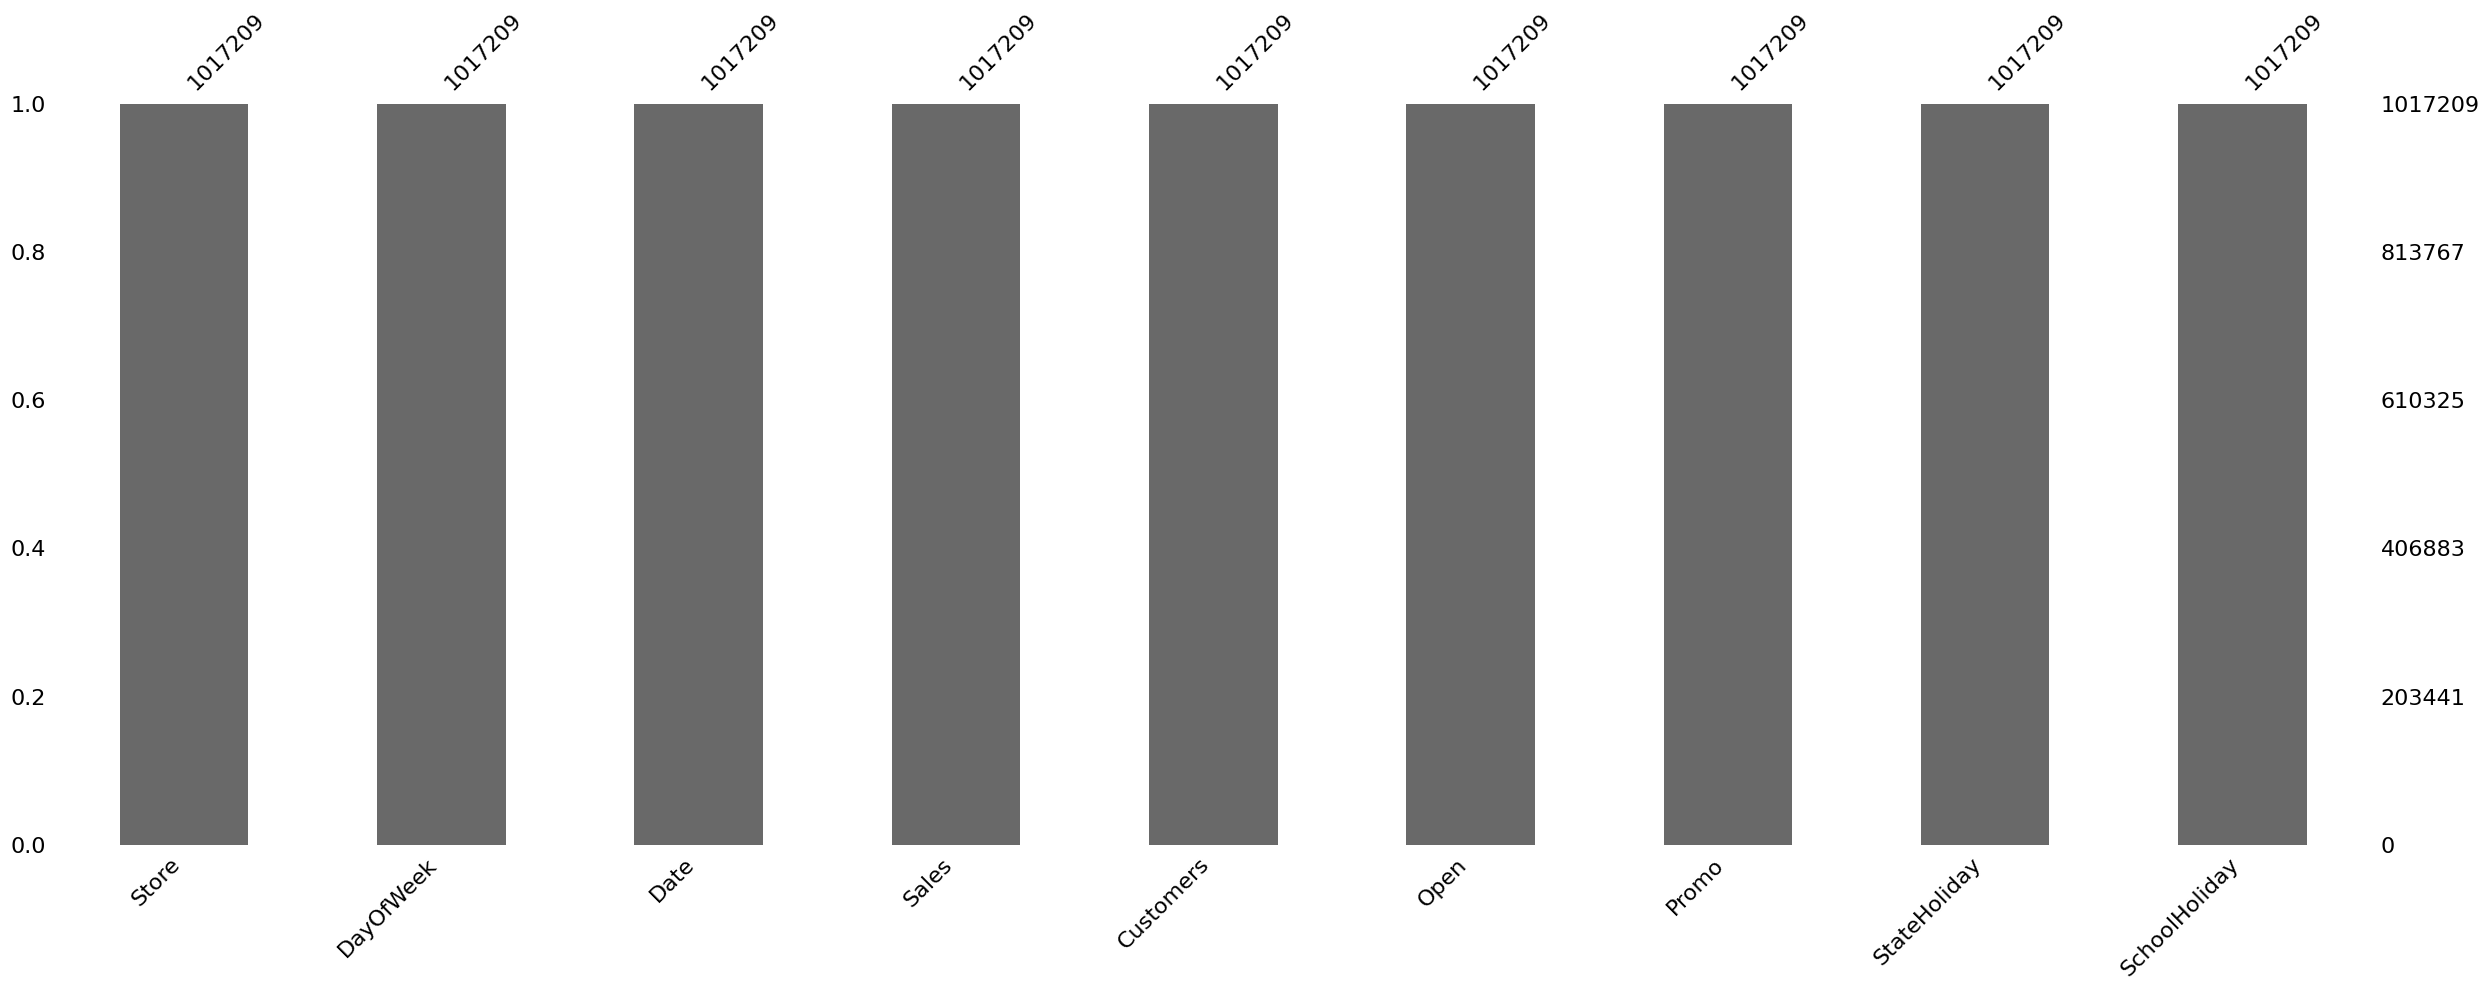

In [11]:
# Visualization bar chart for check null values in rossmann_df
import missingno as msno
plt.figure(figsize=(4, 5))
msno.bar(rossmann_df)
plt.tight_layout()
plt.show()

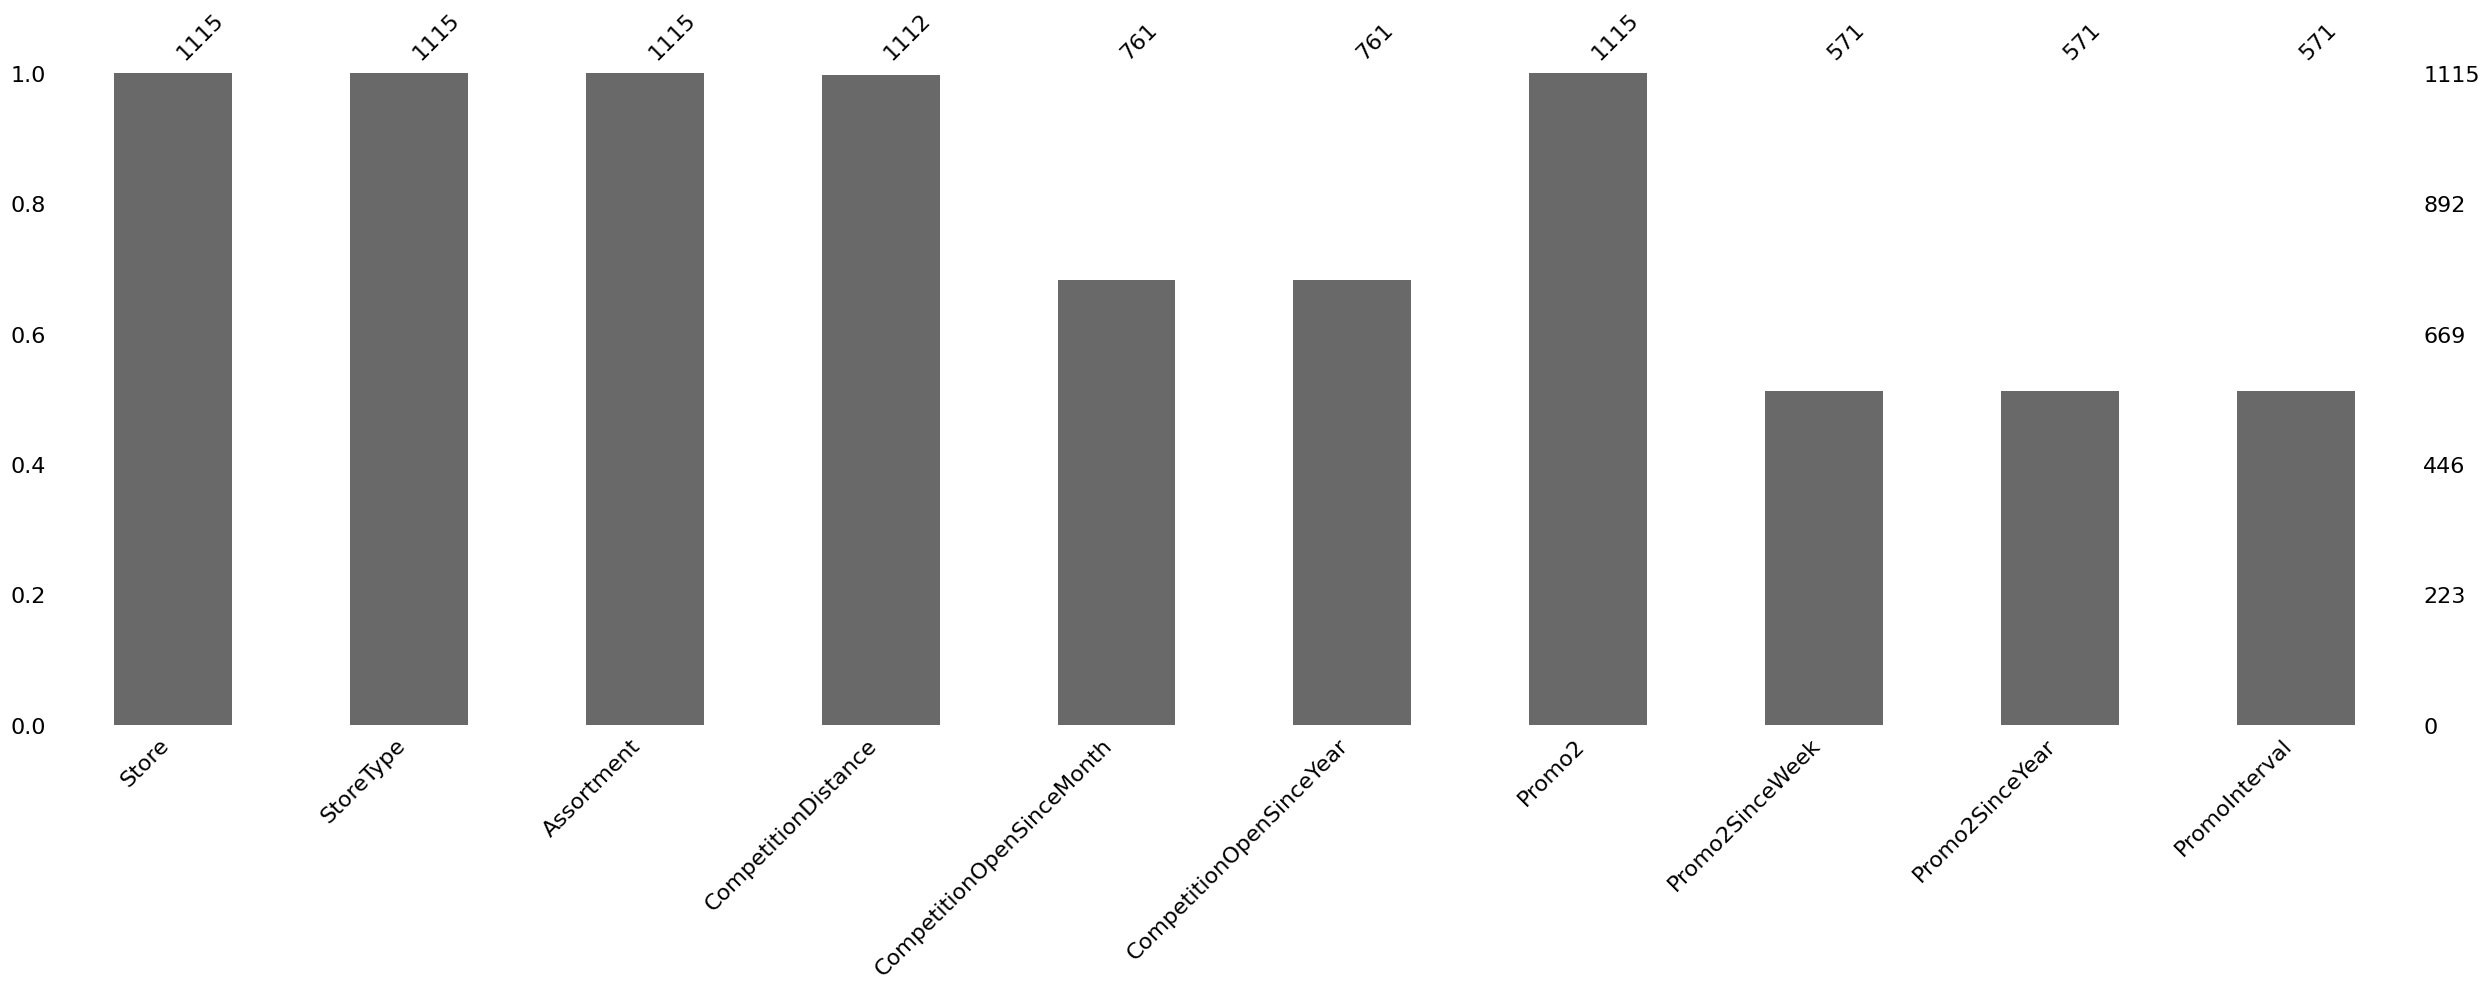

In [12]:
# Visualization bar chart for check null values in store_df
import missingno as msno
plt.figure(figsize=(4, 5))
msno.bar(store_df)
plt.tight_layout()
plt.show()

###What did you know about your dataset?

**Answer :-**The dataset given is a dataset from Retail store and we have to analysis the daily sales up to six weeks.

I have two dataset.
1. Sales Data
2. Store Data


The above dataset rossmann_df(Sales Data) has 1017209 rows and 9 columns. There are no mising values and duplicate values in the dataset

And in Store_df has 1115 rows and 10 columns. There Are no missing values in this dataset. but null values are there in half of the columns:
1. CompetitionDistance :-3
2. CompetitionOpenSinceMonth :- 354
3. CompetitionOpenSinceYear  :-   354
4. Promo2SinceWeek        :-    544
5. Promo2SinceYear       :-     544
6. PromoInterval         :-    544

## ***2. Understanding Your Variables***

In [13]:
# Rossmann_df Dataset Columns
Columns_rossmann = rossmann_df.columns

# Print the column names
print("Column Names:")
for column in Columns_rossmann:
    print(column)

Column Names:
Store
DayOfWeek
Date
Sales
Customers
Open
Promo
StateHoliday
SchoolHoliday


In [14]:
# Store_df Dataset Columns
Columns_store = store_df.columns

# Print the column names
print("Column Names:")
for column in Columns_store:
    print(column)

Column Names:
Store
StoreType
Assortment
CompetitionDistance
CompetitionOpenSinceMonth
CompetitionOpenSinceYear
Promo2
Promo2SinceWeek
Promo2SinceYear
PromoInterval


In [15]:
# Generate a description of the rossmann_df
data_description = rossmann_df.describe()

# Print the data description
data_description

Store     DayOfWeek         Sales     Customers          Open  \
count  1.017209e+06  1.017209e+06  1.017209e+06  1.017209e+06  1.017209e+06   
mean   5.584297e+02  3.998341e+00  5.773819e+03  6.331459e+02  8.301067e-01   
std    3.219087e+02  1.997391e+00  3.849926e+03  4.644117e+02  3.755392e-01   
min    1.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    2.800000e+02  2.000000e+00  3.727000e+03  4.050000e+02  1.000000e+00   
50%    5.580000e+02  4.000000e+00  5.744000e+03  6.090000e+02  1.000000e+00   
75%    8.380000e+02  6.000000e+00  7.856000e+03  8.370000e+02  1.000000e+00   
max    1.115000e+03  7.000000e+00  4.155100e+04  7.388000e+03  1.000000e+00   

              Promo  SchoolHoliday  
count  1.017209e+06   1.017209e+06  
mean   3.815145e-01   1.786467e-01  
std    4.857586e-01   3.830564e-01  
min    0.000000e+00   0.000000e+00  
25%    0.000000e+00   0.000000e+00  
50%    0.000000e+00   0.000000e+00  
75%    1.000000e+00   0.000000e+00  
max    1.000000e+00   1.000000e+00

In [16]:
# description of the store_df

store_df.describe()

Store  CompetitionDistance  CompetitionOpenSinceMonth  \
count  1115.00000          1112.000000                 761.000000   
mean    558.00000          5404.901079                   7.224704   
std     322.01708          7663.174720                   3.212348   
min       1.00000            20.000000                   1.000000   
25%     279.50000           717.500000                   4.000000   
50%     558.00000          2325.000000                   8.000000   
75%     836.50000          6882.500000                  10.000000   
max    1115.00000         75860.000000                  12.000000   

       CompetitionOpenSinceYear       Promo2  Promo2SinceWeek  Promo2SinceYear  
count                761.000000  1115.000000       571.000000       571.000000  
mean                2008.668857     0.512108        23.595447      2011.763573  
std                    6.195983     0.500078        14.141984         1.674935  
min                 1900.000000     0.000000         1.000000      2009.000000  
25%                 2006.000000     0.000000        13.000000      2011.000000  
50%                 2010.000000     1.000000        22.000000      2012.000000  
75%                 2013.000000     1.000000        37.000000      2013.000000  
max                 2015.000000     1.000000        50.000000      2015.000000

### Variables Description

Variables Description:-


*   store - a unique Id for each store

---



*   Sales - the turnover for any given day (this is what you are predicting)

---



*  Customers - the number of customers on a given day

---



*   Open - an indicator for whether the store was open: 0 = closed, 1 = open

---



*   StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None

---



*  SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools

---



*  StoreType - differentiates between 4 different store models: a, b, c, d

---



* Assortment - describes an assortment level: a = basic, b = extra, c = extended

---



* CompetitionDistance - distance in meters to the nearest competitor store
CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened

---



* Promo - indicates whether a store is running a promo on that day

---



* Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating

---



* Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2

---



* PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

---



###Check Unique Values for each variable.


In [17]:
# Check Unique Values for each variable.
# Get the number of unique values for each column
rossman_df_unique_counts = rossmann_df.nunique()

# Print the unique value counts
print("Unique Value Counts for Each Variable:")
print(rossman_df_unique_counts)

Unique Value Counts for Each Variable:
Store             1115
DayOfWeek            7
Date               942
Sales            21734
Customers         4086
Open                 2
Promo                2
StateHoliday         5
SchoolHoliday        2
dtype: int64


In [18]:
# Check Unique Values for each variable.
# Get the number of unique values for each column
store_df_unique_counts = store_df.nunique()

# Print the unique value counts
print("Unique Value Counts for Each Variable:")
print(store_df_unique_counts)

Unique Value Counts for Each Variable:
Store                        1115
StoreType                       4
Assortment                      3
CompetitionDistance           654
CompetitionOpenSinceMonth      12
CompetitionOpenSinceYear       23
Promo2                          2
Promo2SinceWeek                24
Promo2SinceYear                 7
PromoInterval                   3
dtype: int64


## 3. ***Data Wrangling***

### Data Wrangling Code

In [19]:
# Write your code to make your dataset analysis ready.
# Null values in store_df
store_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

There are many Nan values in columns :-

**1. CompetitionDistance**

**2. CompetitionOpenSinceMonth**

**3. CompetitionOpenSinceYear**

**4. Promo2sinceWeek**

**5. Promo2sinceYear**

**6. PromoInterval**

CompetitionDistance has only 3 null values. we have to clean those data.

###1. CompetitionDistance

In [20]:
# Filling null values
store_df[pd.isnull(store_df.CompetitionDistance)]

Store StoreType Assortment  CompetitionDistance  \
290    291         d          a                  NaN   
621    622         a          c                  NaN   
878    879         d          a                  NaN   

     CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
290                        NaN                       NaN       0   
621                        NaN                       NaN       0   
878                        NaN                       NaN       1   

     Promo2SinceWeek  Promo2SinceYear    PromoInterval  
290              NaN              NaN              NaN  
621              NaN              NaN              NaN  
878              5.0           2013.0  Feb,May,Aug,Nov

In [21]:
# Replacing Nan values in CompetitionDistance with mode.
# I am filling null values with medium because it is Robust to Outliers.
store_df['CompetitionDistance'].fillna(store_df['CompetitionDistance'].median(), inplace = True)

2. CompetitionOpenSinceMonth

3. CompetitionOpenSinceYear

4. Promo2sinceWeek

5. Promo2sinceYear

6. PromoInterval

In these columns, I am filling all null values with zeros(0). because most of the rows of these columns are null and I also observe where **promo2** column values are zero(0) there **Promo2sinceWeek,** **Promo2sinceYear,** and **PromoInterval** have null values. because the Promo2 column tells us is a store-run Promotion or not. that's why where promotion values are zero(0) that mean store not run promotion and similer columns relates to promotion null.

In [22]:
# Replacing Nan values with 0.

store = store_df.copy()

# Replacing Nan values with 0 in CompetitionOpenSinceMonth
store['CompetitionOpenSinceMonth'] = store['CompetitionOpenSinceMonth'].fillna(0)

# Replacing Nan values with 0 in CompetitionOpenSinceYear
store['CompetitionOpenSinceYear'] = store['CompetitionOpenSinceYear'].fillna(0)

# Replacing Nan values with 0 in Promo2SinceWeek
store['Promo2SinceWeek'] = store['Promo2SinceWeek'].fillna(0)

# Replacing Nan values with 0 in Promo2SinceYear
store['Promo2SinceYear'] = store['Promo2SinceYear'].fillna(0)

# Replacing Nan values with 0 in PromoInterval
store['PromoInterval'] = store['PromoInterval'].fillna(0)

# Now checking Nan values
store.isna().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

###Merging both datasets the Rossmann_df and Store_df csv by column 'Store' as in both csv Store column is common.

In [23]:
# Merging dataset on store column
df = rossmann_df.merge(right=store, on="Store", how="left")
df.head()

Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5  2015-07-31   5263        555     1      1            0   
1      2          5  2015-07-31   6064        625     1      1            0   
2      3          5  2015-07-31   8314        821     1      1            0   
3      4          5  2015-07-31  13995       1498     1      1            0   
4      5          5  2015-07-31   4822        559     1      1            0   

   SchoolHoliday StoreType Assortment  CompetitionDistance  \
0              1         c          a               1270.0   
1              1         a          a                570.0   
2              1         a          a              14130.0   
3              1         c          c                620.0   
4              1         a          a              29910.0   

   CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                        9.0                    2008.0       0   
1                       11.0                    2007.0       1   
2                       12.0                    2006.0       1   
3                        9.0                    2009.0       0   
4                        4.0                    2015.0       0   

   Promo2SinceWeek  Promo2SinceYear    PromoInterval  
0              0.0              0.0                0  
1             13.0           2010.0  Jan,Apr,Jul,Oct  
2             14.0           2011.0  Jan,Apr,Jul,Oct  
3              0.0              0.0                0  
4              0.0              0.0                0

In [24]:
# Checking shape of the data
df.shape

(1017209, 18)

###Changing different dtypes to Numeric type.

In [25]:
# Checking data type of columns

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1017209 non-null  float64
 12  CompetitionOpenSinceMonth  1017209 non-null  float64
 13  CompetitionO

In [26]:
# Changing StateHoliday dtype from object to numeric.
df.loc[df['StateHoliday'] == '0', 'StateHoliday'] = 0
df.loc[df['StateHoliday'] == 'a', 'StateHoliday'] = 1
df.loc[df['StateHoliday'] == 'b', 'StateHoliday'] = 2
df.loc[df['StateHoliday'] == 'c', 'StateHoliday'] = 3
df['StateHoliday'] = df['StateHoliday'].astype(int, copy=False)

print('levels :', df['StateHoliday'].unique(), '; data type :', df['StateHoliday'].dtype)

levels : [0 1 2 3] ; data type : int64


In [27]:
# Changing Assortment dtype from object to numeric.
df.loc[df['Assortment'] == 'a', 'Assortment'] = 0
df.loc[df['Assortment'] == 'b', 'Assortment'] = 1
df.loc[df['Assortment'] == 'c', 'Assortment'] = 2
df['Assortment'] = df['Assortment'].astype(int, copy=False)

print('levels :', df['Assortment'].unique(), '; data type :', df['Assortment'].dtype)

levels : [0 2 1] ; data type : int64


In [28]:
# Changing StoreType dtype from object to numeric.
df.loc[df['StoreType'] == 'a', 'StoreType'] = 0
df.loc[df['StoreType'] == 'b', 'StoreType'] = 1
df.loc[df['StoreType'] == 'c', 'StoreType'] = 2
df.loc[df['StoreType'] == 'd', 'StoreType'] = 3
df['StoreType'] = df['StoreType'].astype(int, copy=False)

print('levels :', df['StoreType'].unique(), '; data type :', df['StoreType'].dtype)

levels : [2 0 3 1] ; data type : int64


In [29]:
# Changing format of date from object to datetime
df['Date'] = pd.to_datetime(df['Date'], format= '%Y-%m-%d')

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  int64         
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  int64         
 10  Assortment                 1017209 non-null  int64         
 11  CompetitionDistance        1017209 no

###What all manipulations have you done and insights you found?

**Answer:-** First I fill null values with zero. and in CompetitionDistance column I fill null values with median. then I merge my both dataset and make it one dataset. then I checked the dataset info and I found in my dataset some columns are string type(object) So I changed string values to numeric values basicaly I did label encoding on my object variables. And In the last I did datetime column which is a object column I changed this column to datetime column.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

####Chart - 1. Checking frequency distribution of continuous features-Sales, CompetitionDistance, Customers:

Text(0.5, 1.0, 'Density distribution of Customers')

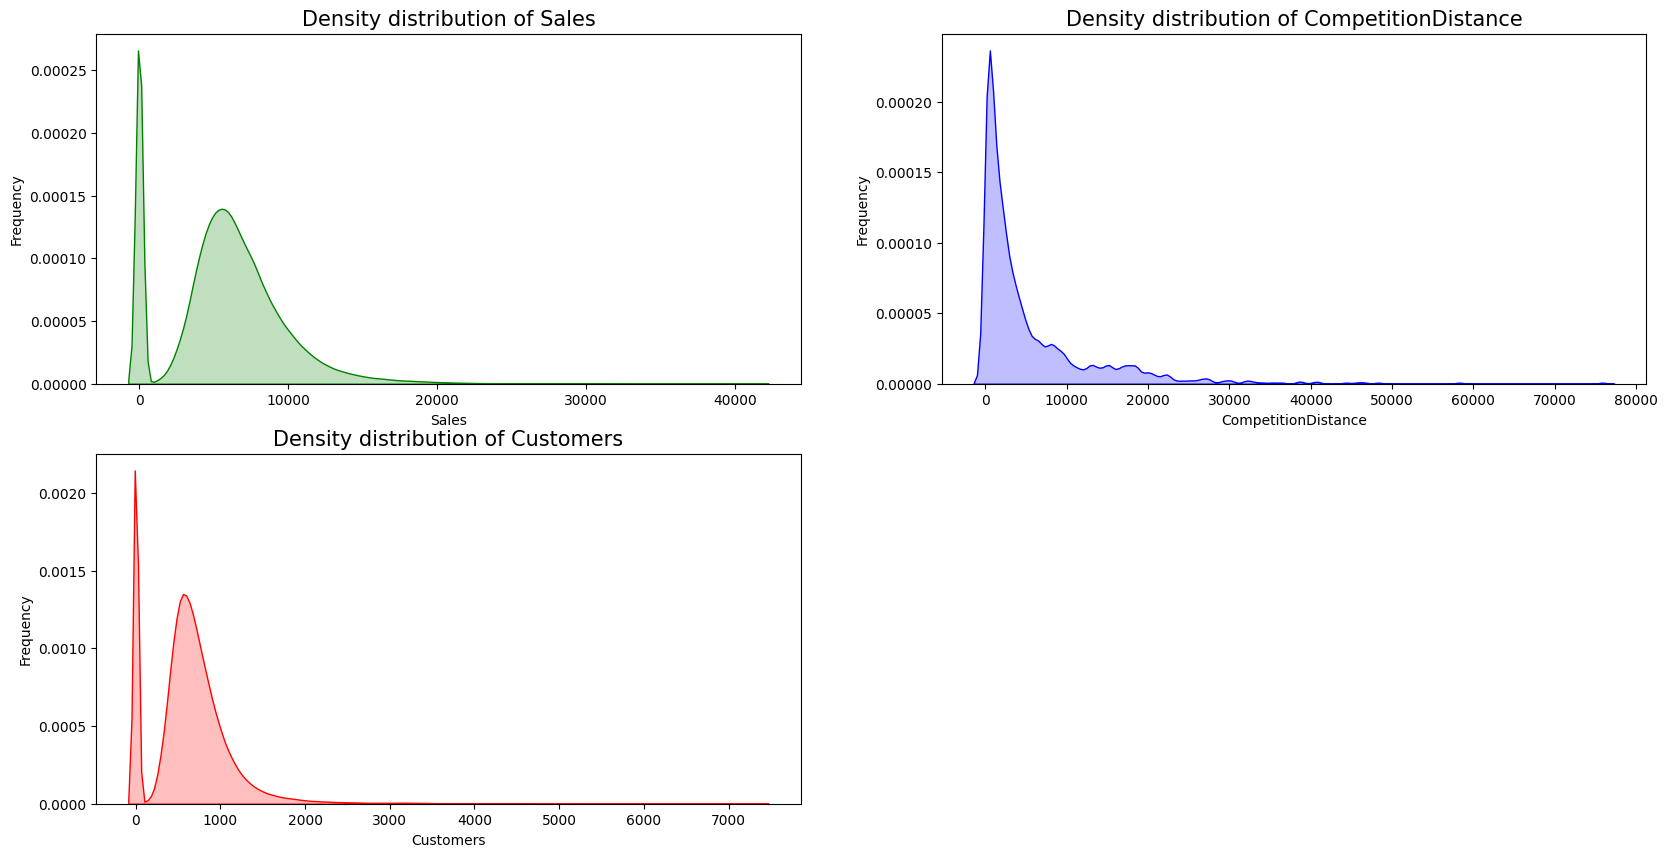

In [31]:
# Chart - 1 visualization code
#Checking Frequency distribution for continous features:
plt.figure(figsize=(20,10))

#First plot(Sales vs Frequency)
plt.subplot(2,2,1)
plt.xlabel("Sales")
plt.ylabel("Frequency")
sns.kdeplot(df["Sales"], color="Green", shade = True)
plt.title('Density distribution of Sales',size = 15)

#Second plot(CompetitionDistance vs Frequency)
plt.subplot(2,2,2)
plt.xlabel("CompetitionDistance")
plt.ylabel("Frequency")
sns.kdeplot(df["CompetitionDistance"], color="Blue", shade = True)
plt.title('Density distribution of CompetitionDistance',size = 15)

#Third plot(Customers vs Frequency)
plt.subplot(2,2,3)
plt.xlabel("Customers")
plt.ylabel("Frequency")
sns.kdeplot(df["Customers"], color="Red", shade = True)
plt.title('Density distribution of Customers',size = 15)


##### 1. Why did you pick the specific chart?

**Answer:-**
A distribution plot (distplot) is used to visualize the frequency distribution of a single variable, providing insights into its central tendency, spread, and shape, making it valuable for data exploration and outlier detection.

##### 2. What is/are the insight(s) found from the chart?

**Answer:-**The drop in sales indicates the 0 sales accounting to the stores temporarily closed due to refurbishment. and the data is positively skewed.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Answer:-**

#### Char - 2. Point Chart on Sales by CompititionOpenSinceYear

Text(0.5, 1.0, 'Plot between Sales and Competition Open Since year')

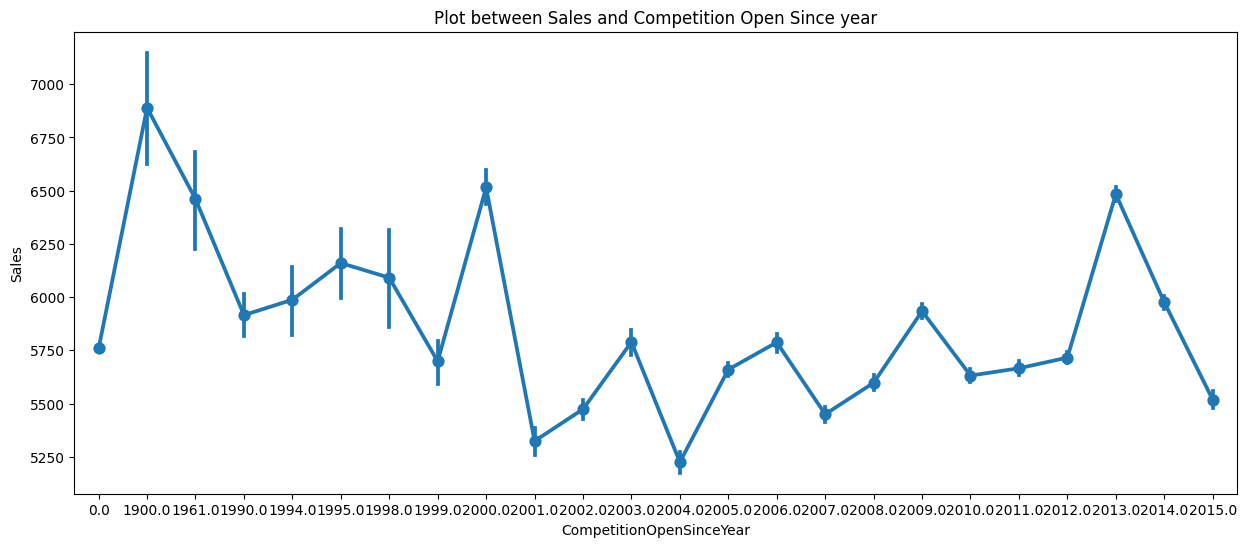

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.figure(figsize=(15, 6))


sns.pointplot(x= 'CompetitionOpenSinceYear', y= 'Sales', data=df)
plt.title('Plot between Sales and Competition Open Since year')

#### 1. Why did you pick the specific chart?

**Answer:-**A point plot is used to visualize the relationship between two variables, displaying data points with respect to their values on both axes, making it effective for comparing data trends or group differences.

####2. What is/are the insight(s) found from the chart?

**Answer:-**From the Plot we can tell that Sales are high during the year 1900, as there are very few store were operated of Rossmann so there is less competition and sales are high. But as year pass on number of stores increased that means competition also increased and this leads to decline in the sales.

####3. Will the gained insights help creating a positive business impact?
####Are there any insights that lead to negative growth? Justify with specific reason.

**Answer:-**As the number of stores increases sales also increase this is a good thing for a business but when the distance between stores is less. then sales of the store go down. because in the less distance, one more store is operating. this will impact negatively on the store. therefore store should be open in a good distance.

####Char - 3. Barplot for Sales vs StoreType with Assortment

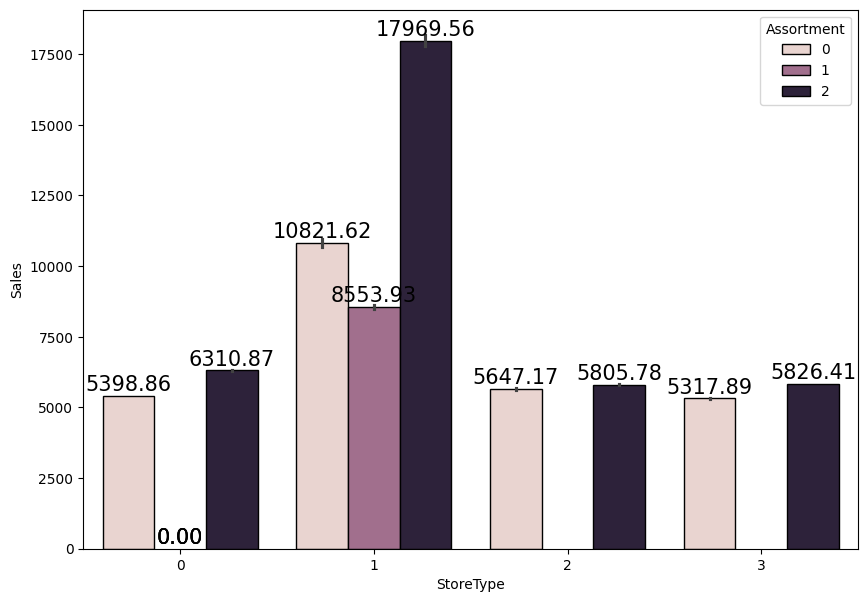

In [33]:
# Sales vs StoreType with Assortment
plt.figure(figsize=(10, 7))
plots = sns.barplot(x='StoreType', y='Sales', hue='Assortment', data=df, edgecolor='black')

for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')

plt.show()

#### 1. Why did you pick the specific chart?

**Answer:-**
A bar chart is used to visually compare and display categorical data by representing each category with a bar. It helps illustrate the distribution, frequency, or relationships between categories in a straightforward and easily interpretable manner.

#### 2. What is/are the insight(s) found from the chart?

**Answer:-**The above bar plot shows that the store types 0, 2 and 3 have only assortment levels 0 and 2. On the other hand store type 1 has all three kinds of assortment strategies, a reason why average sales were high for store type 1 stores.

####3. Will the gained insights help creating a positive business impact?
####Are there any insights that lead to negative growth? Justify with specific reason.

**Answer:-** In this bar chart we can see those stores that have all the assortment. those have more sales compared to others. and customers only go to those stores where all the products he/she can get. and store those only some categories they cap, after a time may be customer will decrease in their store.

#### Char - 4. Pie Chart on StoreType

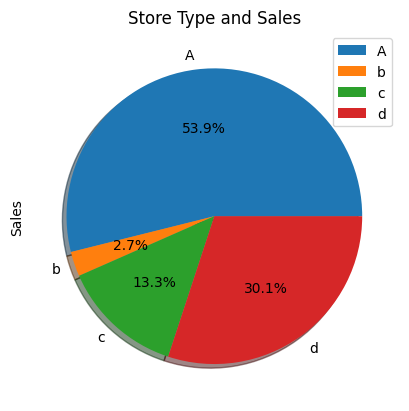

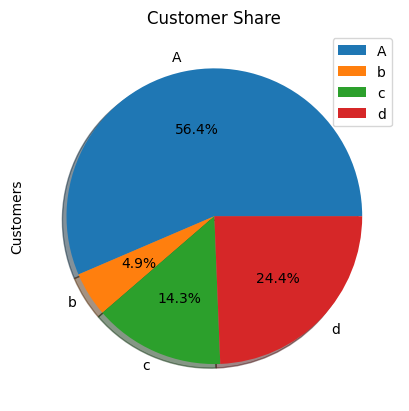

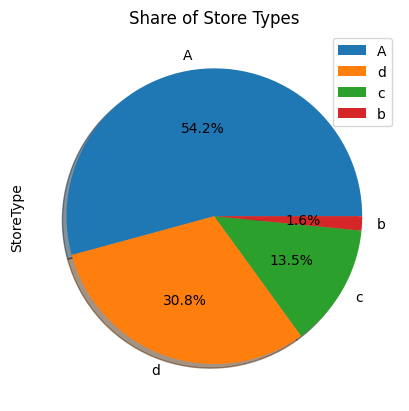

In [34]:
new_df = df.copy()
# Changing StoreType dtype from numeric to object.
new_df.loc[new_df['StoreType'] == 0, 'StoreType'] = 'A'
new_df.loc[new_df['StoreType'] == 1, 'StoreType'] = 'b'
new_df.loc[new_df['StoreType'] == 2, 'StoreType'] = 'c'
new_df.loc[new_df['StoreType'] == 3, 'StoreType'] = 'd'
new_df['StoreType'] = new_df['StoreType'].astype(object, copy=False)



#let's explore store type a bit and it's influence on sales
new_df.groupby("StoreType")["Sales"].sum().plot.pie(title='Store Type and Sales', legend=True, autopct='%1.1f%%', shadow=True)
plt.show()
#customers and store type
new_df.groupby("StoreType")["Customers"].sum().plot.pie(title='Customer Share', legend=True, autopct='%1.1f%%', shadow=True)
plt.show()
#store types in all of the dataset
new_df["StoreType"].value_counts().plot.pie(title='Share of Store Types', legend=True, autopct='%1.1f%%', shadow=True)
plt.show()

#### 1. Why did you pick the specific chart?

**Answer:-**
A pie chart is used to represent data as a circle, divided into segments (slices) that visually convey the proportion or distribution of different categories within a whole. It's suitable for displaying categorical data, highlighting individual components' relative sizes, and providing a quick overview of the composition of a dataset. that's why I use pie chart.


#### 2. What is/are the insight(s) found from the chart?

**Answer:-**
The highest sales belonged to store type A(0) due to the high number of type A(0) stores in our dataset. Store type A(0) and D(3) had a similar kind of sales and customer share.

Interesting insight to note is that store type B(1) with highest average sales and per store revenue generation looks healthy and a reason for that would be all three kinds of assortment strategies involved which was seen earlier.

#### 3. Will the gained insights help creating a positive business impact?
#### Are there any insights that lead to negative growth? Justify with specific reason.

**Answer:-** We need to fucus on A(0) type of store, becuase most of the sales they have and B(1),C(2) type of store less in amount and also they have fewer sales and market cap. if we increase the number of store B(1),C(2) it will impact business alot. and sales would increase.

#### Chart 5. Sales on Store open or closed

<Axes: xlabel='Open', ylabel='Sales'>

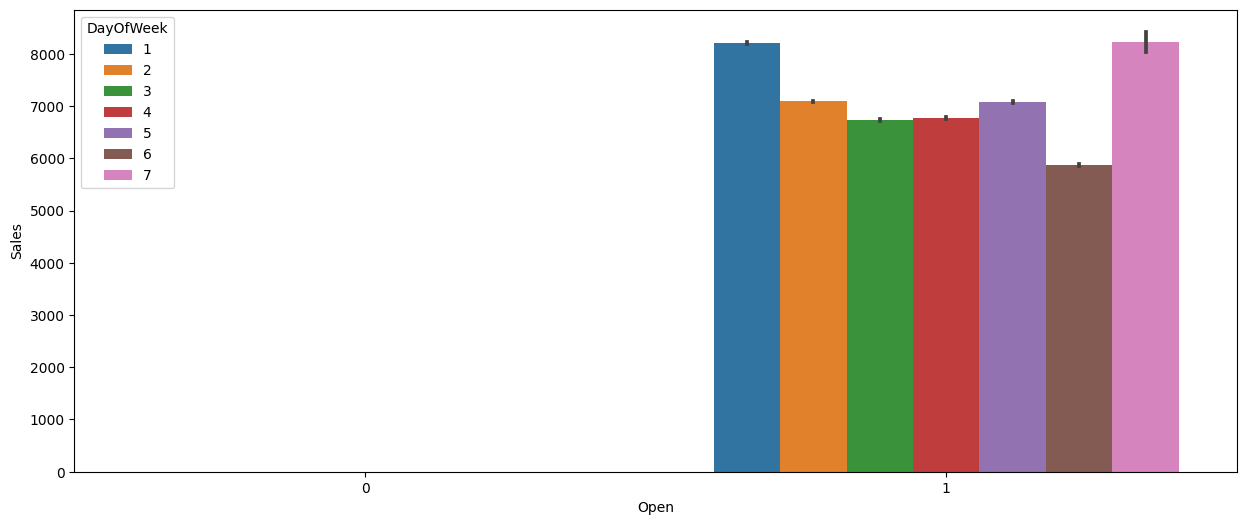

In [20]:
# Set the figure size
plt.figure(figsize=(15, 6))

# open and storetype relationship
#this indicates - Open suggests that whether the store was open or closed for refurbishment and weekends or holidays
sns.barplot(x=df["Open"],y=df['Sales'],hue=df["DayOfWeek"])

####1. Why did you pick the specific chart?

**Answer-**
A bar plot is used to visualize and compare categorical data by representing each category with a bar, making it effective for displaying the distribution and relationships between different categories within a dataset. It provides a clear and concise way to convey information about categorical variables.

####2. What is/are the insight(s) found from the chart?

**Answer-** When stores are open sales always come every day and every week. I think the sales column highly correlates with the open variable. because it depends directly on sales when stores are open when sales happen.

####3. Will the gained insights help creating a positive business impact?
####Are there any insights that lead to negative growth? Justify with specific reason.

**Answer-** We can see on the chart everyday sales are done therefore we need to open all stores every day on weekends, and holidays also, it will increase our sales, and if we close our store it will end are sales on that day and week.

#### Chart 6. Plot between Sales and Promo2 Since year

Text(0.5, 1.0, 'Plot between Sales and Promo2 Since year')

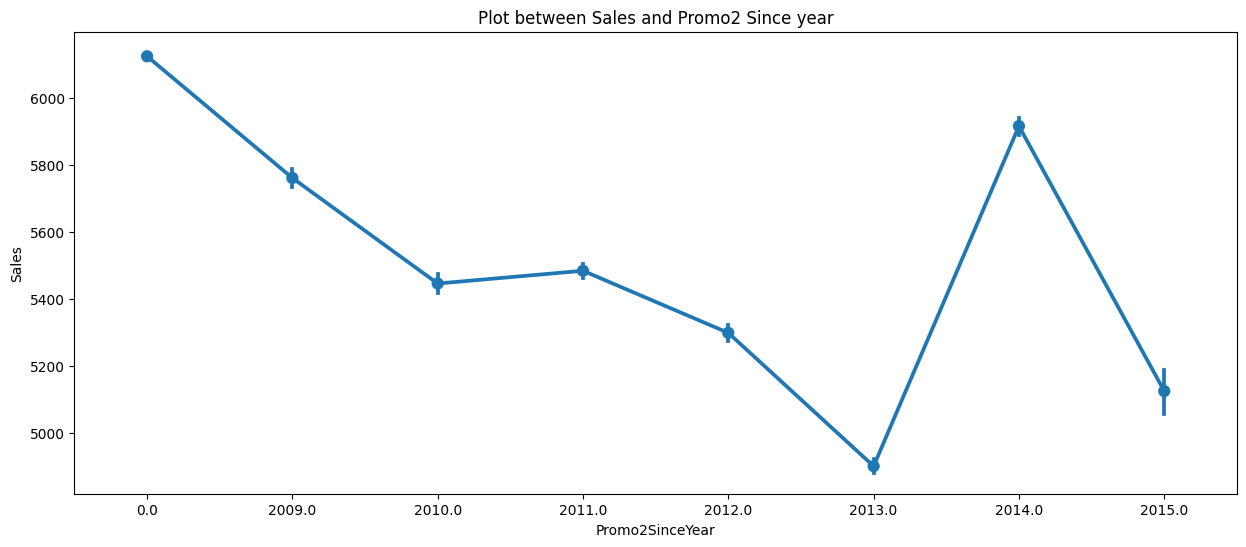

In [21]:
plt.figure(figsize=(15,6))
sns.pointplot(x= 'Promo2SinceYear', y= 'Sales', data=df)
plt.title('Plot between Sales and Promo2 Since year')

####1. Why did you pick the specific chart?

**Answer-**A point plot is used to display and compare the relationships between two variables, making it useful for showing trends, patterns, or group differences in data. It emphasizes individual data points, highlighting variations and trends effectively.


####2. What is/are the insight(s) found from the chart?

**Answer-**Plot between Sales and promo2sinceyear shows that effect of sales of stores which continue their promotion. this data is available from year 2009 to 2015. Promo2SinceYear has very good effect on sales but in year 2013 sales be minimum and also in year 2012 and 2015 sales are very low.

####3. Will the gained insights help creating a positive business impact?
####Are there any insights that lead to negative growth? Justify with specific reason.

**Answer-** Always we need to do promotion it will grow our sales and increase profit. sometimes promotion doesn't do much. but it impacts a lot to increase the business

####Chart 7. Plot between Store and Promo2


Text(0.5, 1.0, 'Plot between Store and Promo2 ')

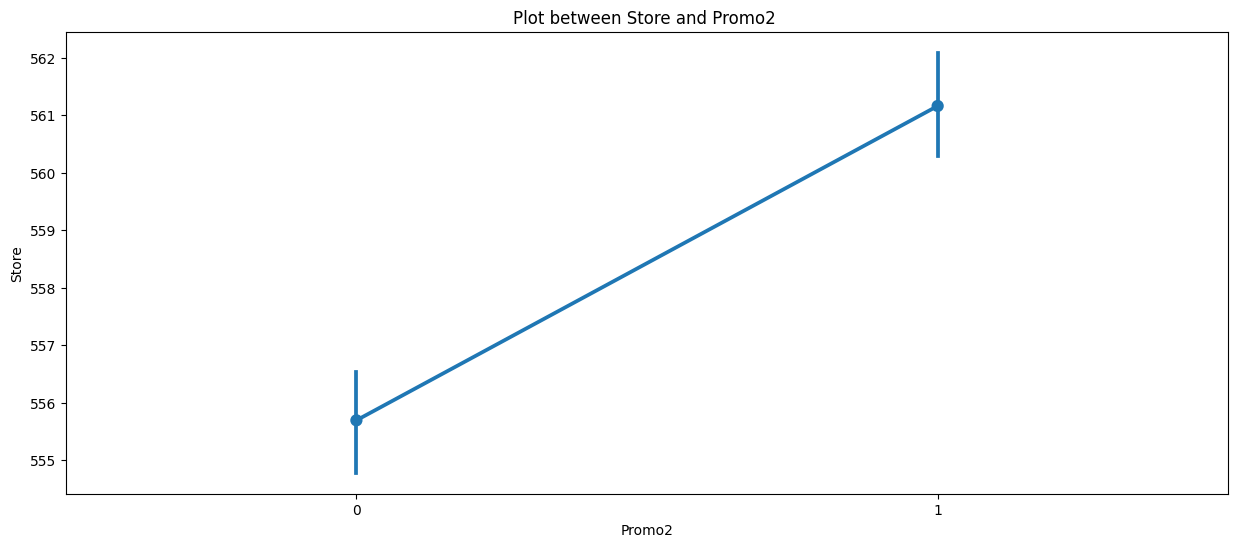

In [22]:
plt.figure(figsize=(15,6))
sns.pointplot(x= 'Promo2', y= 'Store', data=df)
plt.title('Plot between Store and Promo2 ')

####1. Why did you pick the specific chart?

**Answer-**A point plot is employed to visualize how two variables relate to each other, enabling the identification of trends, patterns, or differences between data groups. It emphasizes specific data points, facilitating the analysis of individual observations and their interactions.



####2. What is/are the insight(s) found from the chart?

**Answer-** We have 1115 stores and from that store, half the doing promotion and half are not. so we need to make them understand for promotion if they do promotion their sales will increase and their profit also.

####3. Will the gained insights help creating a positive business impact?
####Are there any insights that lead to negative growth? Justify with specific reason.

**Answer-** We can reach their store and convince them to do a promotion if they do a promotion their sales will increase.

####Chart 8. Plot between Sales and Day of Week


Text(0.5, 1.0, 'Plot between Sales and Day of Week')

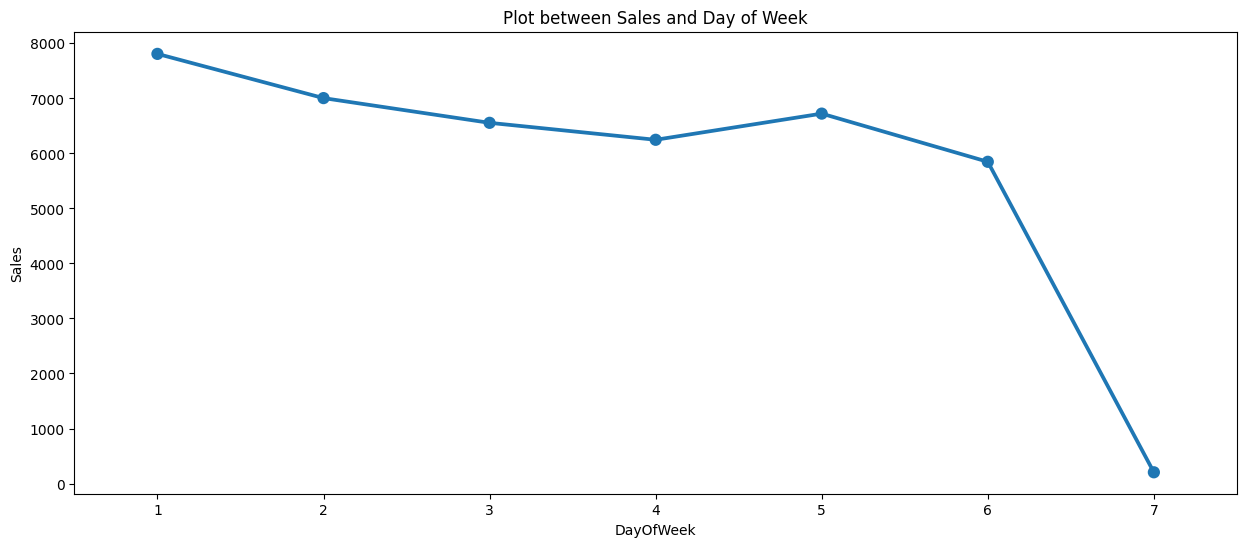

In [23]:
plt.figure(figsize=(15,6))
sns.pointplot(x= 'DayOfWeek', y= 'Sales', data=df)
plt.title('Plot between Sales and Day of Week')

####1. Why did you pick the specific chart?

**Answer-**A point plot is employed to visualize how two variables relate to each other, enabling the identification of trends, patterns, or differences between data groups. It emphasizes specific data points, facilitating the analysis of individual observations and their interactions.

####2. What is/are the insight(s) found from the chart?

**Answer-**Plot between Sales and Days of the week shows that maximum sales are on Monday and sales gradually decrease to the 6th day of the week i.e. on Saturday. It also shows that sales on Sunday are almost near to zero as on Sunday maximum stores are closed.

####3. Will the gained insights help creating a positive business impact?
####Are there any insights that lead to negative growth? Justify with specific reason.

**Answer-** To increase the sales we need to open a store on Sunday also it will increase are sales a lot because most people are free on the weekend and if we open are store on the weekend it will impact good for sales.

####Chart 9. Plot Customer and Sales


<Axes: xlabel='Customers', ylabel='Sales'>

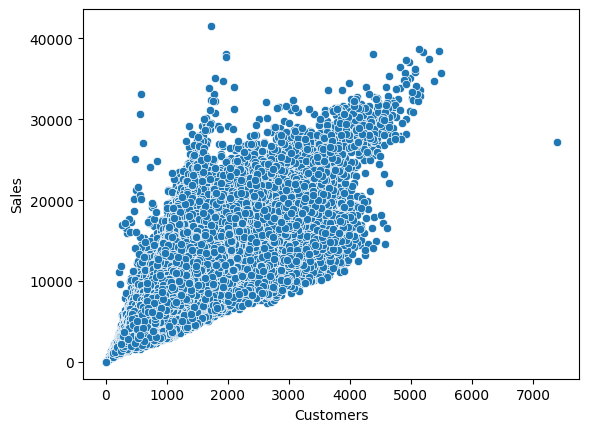

In [24]:
# Scatterplot of Customers and Sales
sns.scatterplot(x=df['Customers'], y=df['Sales'])

####1. Why did you pick the specific chart?

**Answer-**
A scatter plot is used to visualize the relationship between two continuous variables, allowing us to observe patterns, trends, and potential correlations in the data. It provides a visual representation of how one variable changes concerning another, aiding in data exploration and analysis.

####2. What is/are the insight(s) found from the chart?

**Answer-**We Can see as Customer increase sales also increase positively, Sales and Customer scatter plot shows a direct positive relation between them with a few outliers.

####3. Will the gained insights help creating a positive business impact?
####Are there any insights that lead to negative growth? Justify with specific reason.

**Answer-** It will impact positively the increase in sales because the above trend is as the customer increases sales also increase.

####Chart 10. Plot Between CompetitionDistance and Sales

<Axes: xlabel='CompetitionDistance', ylabel='Sales'>

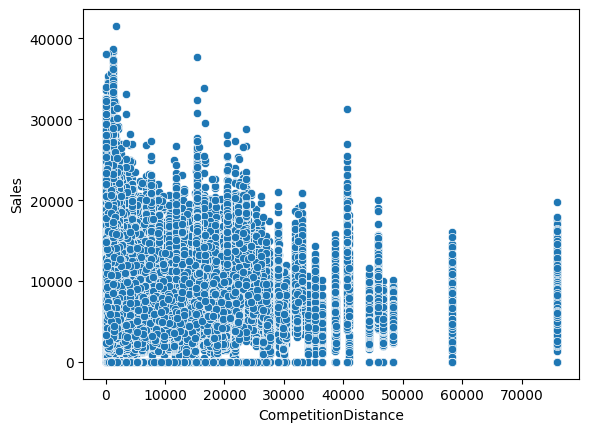

In [ ]:
#scatterplot of Competition Distance and Sales
sns.scatterplot(x=df['CompetitionDistance'], y=df['Sales'])

####1. Why did you pick the specific chart?

**Answer-**Scatter plots are used to visualize and analyze the relationship between two continuous variables. They help in identifying patterns, trends within the data, making them a valuable tool in data exploration.

####2. What is/are the insight(s) found from the chart?

**Answer-**From the above scatter plot it can be observed that mostly the competitor stores weren't that far from each other and the stores densely located near each other saw more sales.

####3. Will the gained insights help creating a positive business impact?
####Are there any insights that lead to negative growth? Justify with specific reason.

**Answer-** It will impact negatively on store that are in less distances.

####Chart 11. Sales v/s Month

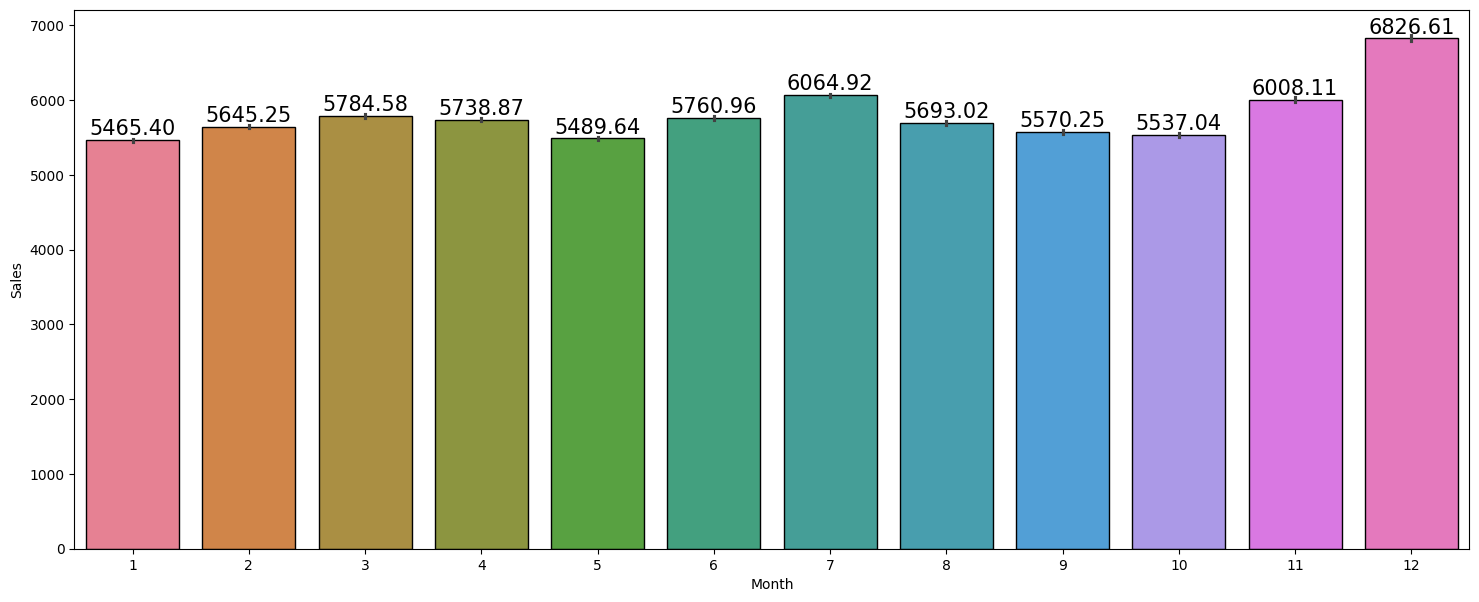

In [33]:
# Month v/s Sales
# Fixing the size
plt.figure(figsize=(18, 7))

# Define a color palette
colors = sns.color_palette("husl", df['Date'].dt.month.nunique())

# Plotting
plots = sns.barplot(x=df['Date'].dt.month, y=df['Sales'], edgecolor='black', palette=colors)

# Annotate each bar with its height
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                   ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')

plt.xlabel("Month")
plt.show()

#####1. Why did you pick the specific chart?

To know the patterns or trends in the data, such as a peak in activity or sales during a particular month of the year.

#####2. What is/are the insight(s) found from the chart?

The countplot highlights that December being a festive month attracts more sales than the rest of the months. Also, November has slightly more sales than other months. This could be due to the 'Black Friday' sale which is very popular across the globe. As Rossmann Stores deals in health and beauty products, it can be guessed that November and December sales are due to the celebratory nature of people who love to buy beauty/health products leading to the sudden increase in sales.

#####3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights create a positive business impact as business owners will try to keep more goods to cater for their business needs and also they can increase revenue by keeping stores open even on weekends or holidays as customers are aiming to buy more in this period of a month.

####Chart 12. Plot Store Daily Open Countplot

Text(0.5, 1.0, 'Store Daily Open Countplot')

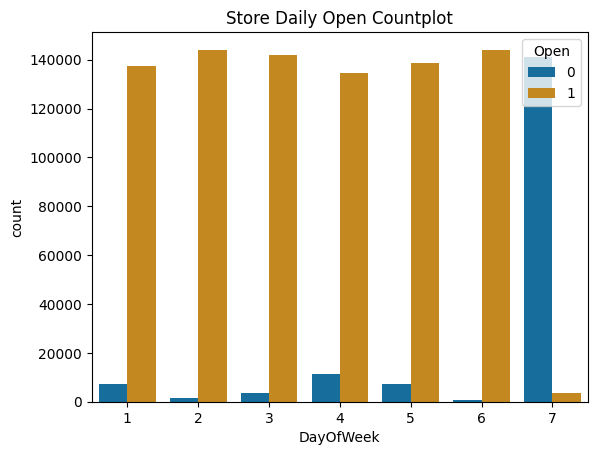

In [ ]:
# Countplot for how many stores open on daily basis
sns.countplot(x= 'DayOfWeek', hue='Open', data= df, palette="colorblind")
plt.title('Store Daily Open Countplot')

####1. Why did you pick the specific chart?

**Answer-**Count plots are used to visualize the frequency or count of categorical data within different categories or groups. They are helpful for understanding the distribution and prevalence of categories in a dataset, making them valuable for tasks like data exploration, identifying class imbalances, and assessing the distribution of categorical variables in statistical analysis and machine learning.

####2. What is/are the insight(s) found from the chart?

**Answer-** From the above chart we can see on 7 day of the week which is Sunday, on Sunday most of the store are closed and a few of them is open, and on weekdays all store are open but few of them is closed may be for the refurbishment.

####3. Will the gained insights help creating a positive business impact?
####Are there any insights that lead to negative growth? Justify with specific reason.

**Answer-** If we open the store on Sunday also then it will affect our sales in positive. because all the stores are closed on Sunday only a few stores are open, and if the store opens they will sell something and this will impact our sales a lot.

####Chart 13. Plot Store Daily Promo Countplot

Text(0.5, 1.0, 'Store Daily Promo Countplot')

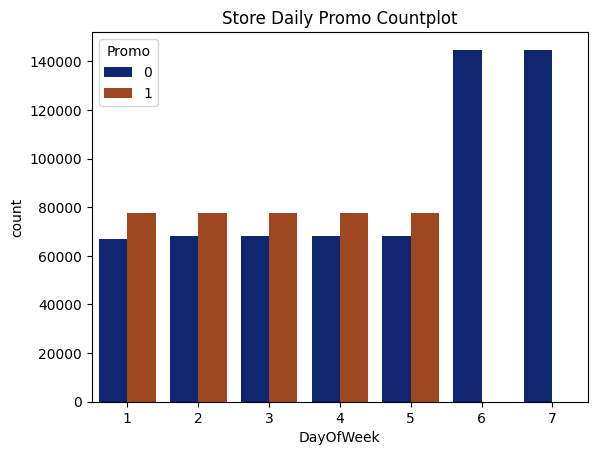

In [ ]:
sns.countplot(x= 'DayOfWeek', hue='Promo', data= df, palette='dark')
plt.title('Store Daily Promo Countplot')

####1. Why did you pick the specific chart?

**Answer-**Count plots are used to visualize the frequency or count of categorical data within different categories or groups.

####2. What is/are the insight(s) found from the chart?

**Answer-** Promotion is only done on weekdays and some stores not doing any promotion. on Saturdays and Sundays no promotion in any store.

####3. Will the gained insights help creating a positive business impact?
####Are there any insights that lead to negative growth? Justify with specific reason.

**Answer-** If we encourage those store persons who are not promoting to do promotion then it will impact the business positively

####Chart 14. Plot between Promo and Sales

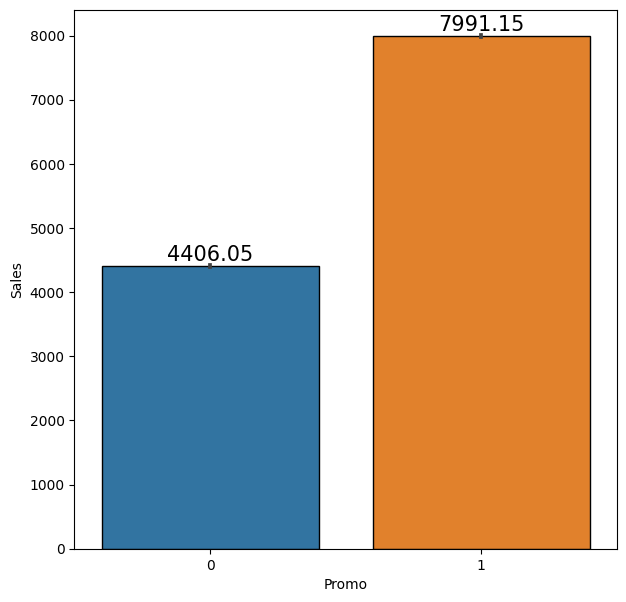

In [ ]:
# Creating a barplot for checking sales between who does promotion and not do promotion
# Sales vs Promo
plt.figure(figsize=(7,7))
plots=sns.barplot(x=df['Promo'],y=df['Sales'],edgecolor='black')
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.show()

####1. Why did you pick the specific chart?

**Answer-**A bar plot is used to visually compare and display categorical data by representing each category with a bar, helping to illustrate the distribution, frequency, or relationships between different categories in a dataset.

####2. What is/are the insight(s) found from the chart?

**Answer-**Barplot between promo and Sales shows the effect of promotion on Sales. Here 0 represents the store that didn't opt for promotion and 1 represents stores that for promotion. In the stores that took promotions, their sales are high as compared to stores that didn't take promotions.

####3. Will the gained insights help creating a positive business impact?
####Are there any insights that lead to negative growth? Justify with specific reason.

**Answer-** Here we can see that the stores does promotion their sales are also high, we can show this chart to those stores who are not participating in promotion and engage them and when they join our sales increase.

####Chart - 15 - Correlation Heatmap

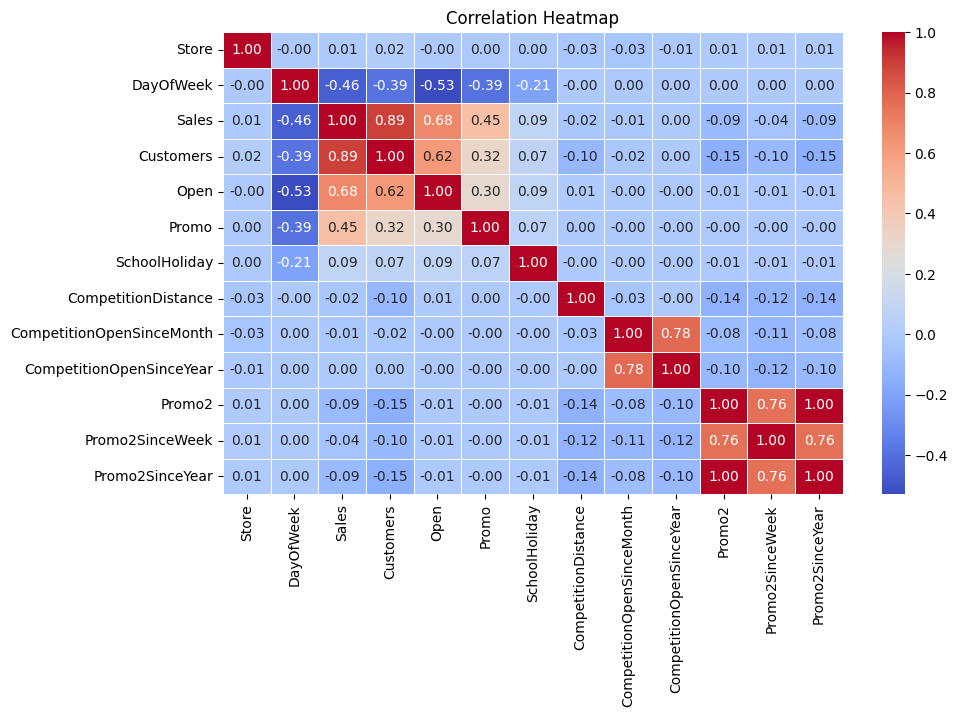

In [ ]:
# Correlation Heatmap visualization code

# the correlation matrix
corr_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Add a title
plt.title('Correlation Heatmap')

# Show the plot
plt.show()


####1. Why did you pick the specific chart?

**Answer-**A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. A correlation matrix is used to summarize data, as input into a more advanced analysis.

Thus to know the correlation between all the variables along with the correlation coefficients, I used a correlation heatmap.

####2. What is/are the insight(s) found from the chart?

**Answer-**From the above correlation heatmap, we can see **Promo2SinceYear & Promo2** is positiveliy highly correlated with a value of 1.

And **Customers & Sales, Open & Sales, Open & Customers, CompetitionOpenSinceYear & CompetitionOpenSinceMonth, Promo2SinceWeek & Promo2, Promo2SinceWeek & Promo2SinceYear** Are Positively correlated to each other.

**Promo & Sales** and **Promo & Customers** and **Promo & Open** are positively correlated only and all are negatively correlated with each other.

Rest all correlation can be depicted from the above chart.

####Chart - 16 - Pair Plot

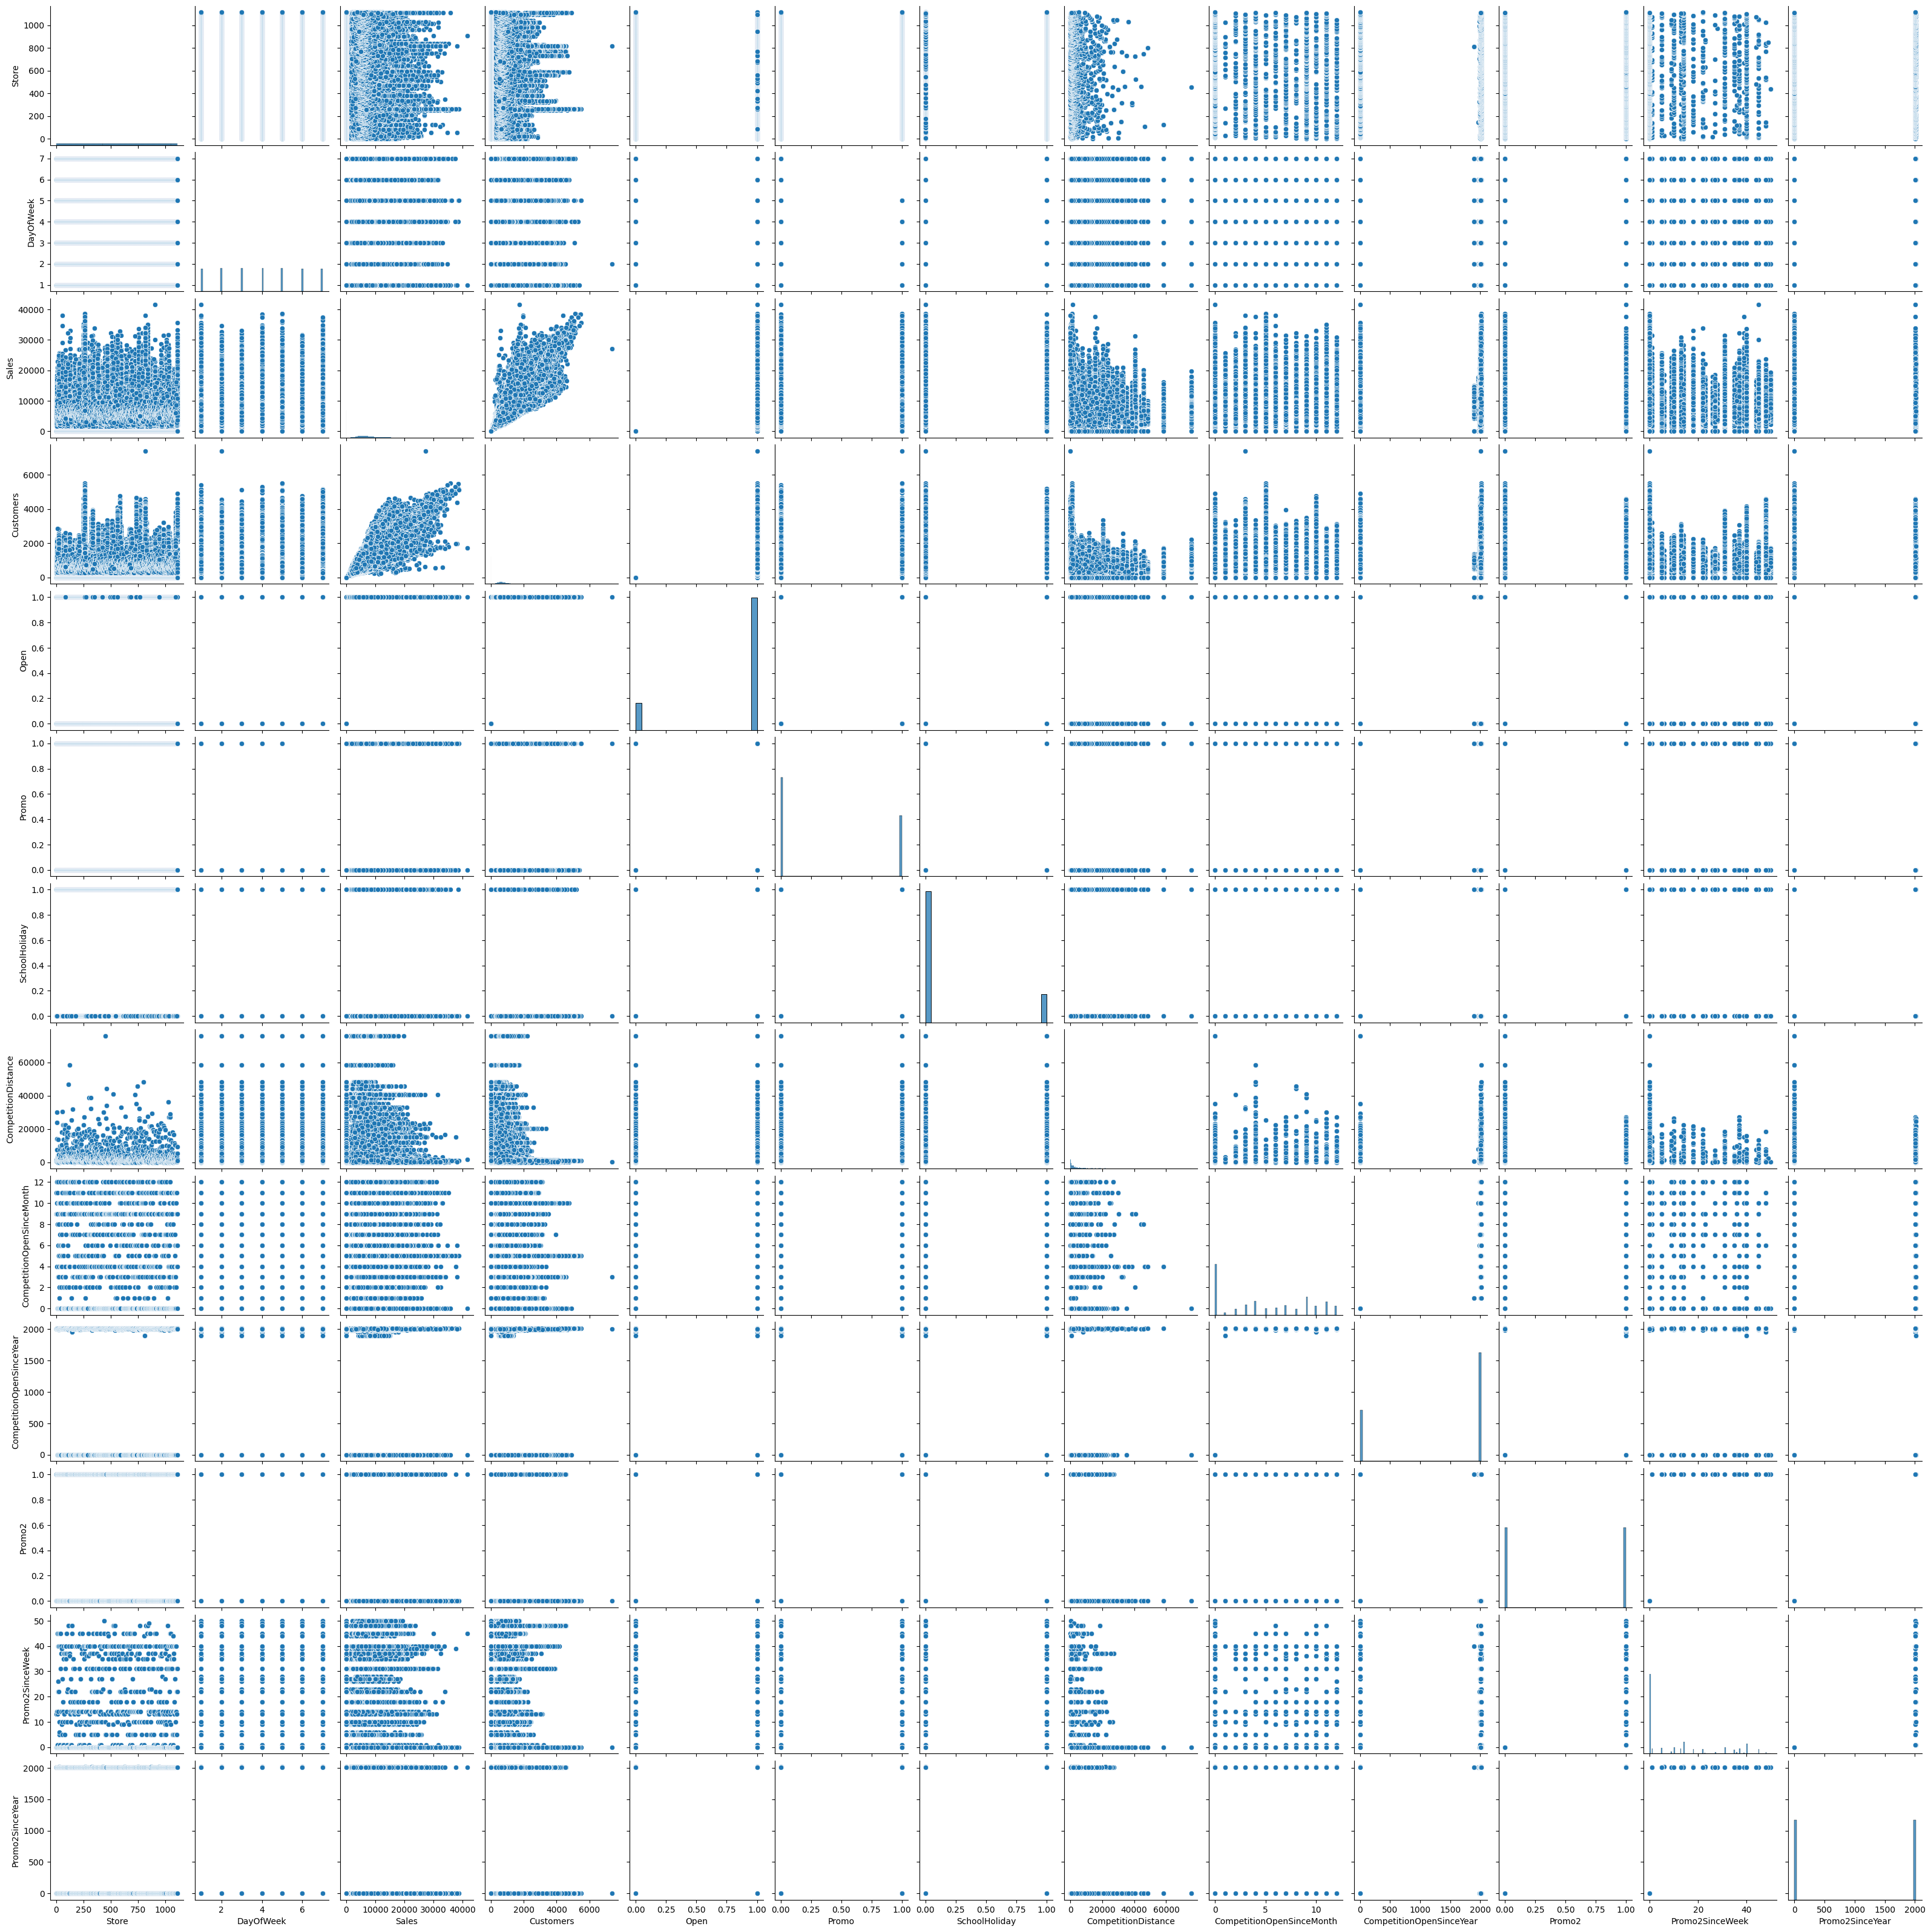

In [ ]:
# Pair Plot visualization code
# Creating a pair plot
sns.pairplot(df)

# Show the plot
plt.show()

####1. Why did you pick the specific chart?

**Answer-**
A pair plot, is used to visualize pairwise relationships between numerical variables in a dataset. It provides a grid of scatterplots, making it easy to assess correlations, identify patterns, and explore interactions among multiple variables simultaneously. Pair plots are valuable for data exploration and understanding complex relationships in multivariate data.

####2. What is/are the insight(s) found from the chart?

**Answer-**From the above chart I got to know, there are less linear relationship between variables and data point's aren't linearly separable.

Only Sales and Customers Column are linear.

I can see in this chart there is no normal distribution inseaded of normal distribution there is no distribution i can see all data point are scattered.

Store with Customers and Sales are tightly relate.


his whole pair plot, I can only see there are no linear relations and no pattern in data. Rest insights can be depicted from the above graph.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

**Answer:-**

**1- Null Hypothesis -** There is no relation between Customers and Sales.

**Alternate Hypothesis -** There is a relationship between Customers and sales.

**2- Null Hypothesis -** There is no relation between DayOfWeek and Sales.

**Alternate Hypothesis -** There is a relation between DayOfWeek and Sales.

**3- Null Hypothesis -** There is no relation between Open and Sales.

**Alternate Hypothesis -** There is a relationship between Open and Sales.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.


**Answer:-**

**1- Null Hypothesis -** There is no relation between Customers and Sales.

**Alternate Hypothesis -** There is a relationship between Customers and sales.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

from scipy.stats import pearsonr

# Define two sample datasets
sample1 = df["Customers"].head(60)
sample2 = df["Sales"].head(60)

# Performing a two-sample t-test
t_statistic, p_value = pearsonr(sample1, sample2)
print('t_statistic=%.3f, p_value = %.2f'%(t_statistic, p_value))

# Check if p-value is less than alpha (e.g., 0.05)
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between the samples.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the samples.")

t_statistic=0.840, p_value = 0.00
Reject the null hypothesis: There is a significant difference between the samples.


##### Which statistical test have you done to obtain P-Value?

**Answer:-** I have used the Pearson Correlation test to obtain the P-Value. It is a measure of linear correlation between two sets of data.

##### Why did you choose the specific statistical test?

**Answer:-**I want to check the relationship between two features if they are positively or negatively correlated. the P-value and Pearson Correlation coefficient will always have a value between -1 and 1. Here we can see that after applying the test on Customers and sales features we got a Correlation coefficient of 0.840 which implies that these two features have having strong positive correlation between them.

### Hypothetical Statement - 2

####1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Answer:-**

**2- Null Hypothesis -** There is no relation between DayOfWeek and Sales.

**Alternate Hypothesis -** There is a relation between DayOfWeek and Sales.

####2. Perform an appropriate statistical test.

In [ ]:
import pandas as pd
import random

# Number of total samples
total_samples = 60

# Randomly sample the data
sample_data = df.sample(n=total_samples, replace=True)

# Reset index if needed
sample_data.reset_index(drop=True, inplace=True)

# Print the sample data
# print(sample_data)

In [ ]:
# Perform Statistical Test to obtain P-Value

from scipy.stats import pearsonr
first_sample = sample_data["DayOfWeek"].head(60)
second_sample = sample_data["Sales"].head(60)

stat, p = pearsonr(first_sample, second_sample)
print('stat=%.3f, p = %.2f'%(stat, p))
if p> 0.05:
  print('Accept Null Hypothesis')
else:
  print('Rejected Null Hypothesis')


stat=-0.490, p = 0.00
Rejected Null Hypothesis


#####Which statistical test have you done to obtain P-Value?

**Answer:-** I have used the Pearson Correlation test to obtain the P-Value. It is a measure of linear correlation between two sets of data.

Why did you choose the specific statistical test?

**Answer:-**I want to check the relationship between two features if they are positively or negatively correlated. the P-value and Pearson Correlation coefficient will always have a value between -1 and 1. Here we can see that after applying the test on Customers and sales features we got a Correlation coefficient of -0.457 which implies that these two features have having strong negative correlation between them.

### Hypothetical Statement - 3

####1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Answer:-**'

**3- Null Hypothesis -** There is no relation between Open and Sales.

**Alternate Hypothesis -** There is a relationship between Open and Sales.

####2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

from scipy.stats import pearsonr
first_sample = sample_data["Open"].head(60)
second_sample = sample_data["Sales"].head(60)

stat, p = pearsonr(first_sample, second_sample)
print('stat=%.3f, p = %.2f'%(stat, p))
if p> 0.05:
  print('Accept Null Hypothesis')
else:
  print('Rejected Null Hypothesis')


stat=0.579, p = 0.00
Rejected Null Hypothesis


Which statistical test have you done to obtain P-Value?

**Answer:-** I have used the Pearson Correlation test to obtain the P-Value. It is a measure of linear correlation between two sets of data.

Why did you choose the specific statistical test?

**Answer:-** I want to check the relationship between two features if they are positively or negatively correlated. the P-value and Pearson Correlation coefficient will always have a value between -1 and 1. Here we can see that after applying the test on Customers and sales features we got a Correlation coefficient of 0.579 which implies that these two features have having strong positive correlation between them.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

df.isna().sum()

Store                        0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

###What all missing value imputation techniques have you used and why did you use those techniques?

**Answer:-** I have already treated null values so we do not have any more missing/null/duplicate values in our dataset and our dataset is good to go.

I have checked the null values by plotting the heatmap and bar chart and then replaced the null values of various variables with mean, median,mode and 0 accordingly.

### 2. Handling Outliers

In [ ]:
# checking info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  int64         
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  int64         
 10  Assortment                 1017209 non-null  int64         
 11  CompetitionDistance        1017209 no

In [ ]:
# Creating continuous features list
Continuous_features = ['DayOfWeek','Sales','Customers',
                    'CompetitionDistance','CompetitionOpenSinceMonth',
                    'CompetitionOpenSinceYear','Promo2SinceWeek',
                    'Promo2SinceYear',]

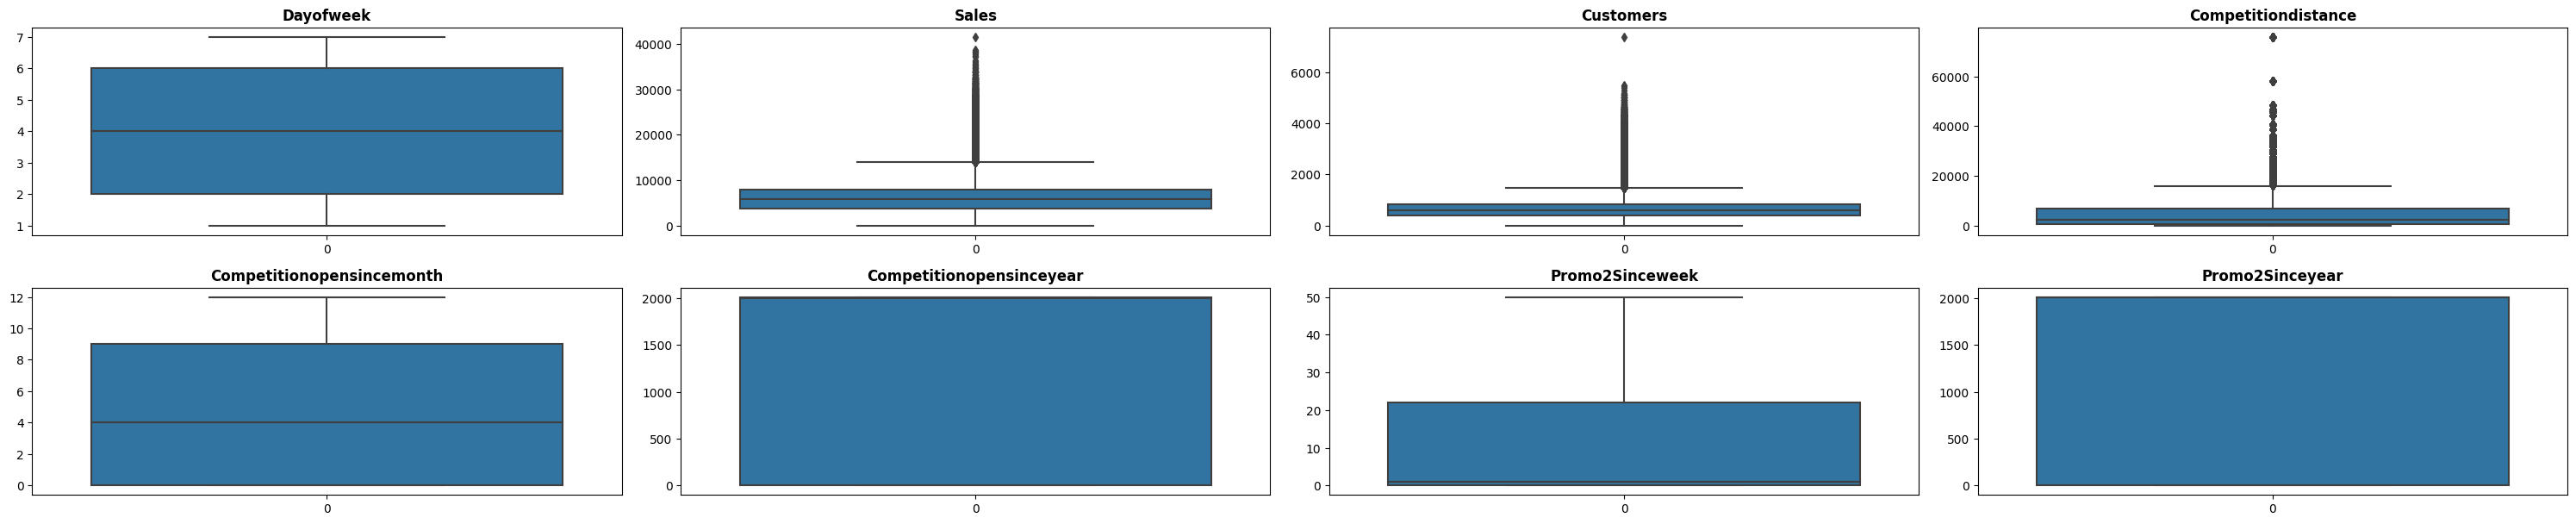

In [ ]:
# checking outliers with the help of box plot for continous features
plt.figure(figsize=(30,15))
for n,column in enumerate(Continuous_features):
  plt.subplot(5, 4, n+1)
  sns.boxplot(df[column])
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()

From the above box plots we can see clearly the features "Sales", "Customers", "CompetitionDistance", "CompetitionOpenSinceMonth" and "CompetitionOpenSinceYear" contains several outliers and rest of the features are fine as they are categorical in nature.

Let's define a code to detect the number of outliers and percentage of outliers present in each of the feature in order to handle them accordingly.

In [ ]:
# defining the code for outlier detection and percentage using IQR.
def detect_outliers(data):
    outliers = []
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q2 = np.percentile(data, 50)
    q3 = np.percentile(data, 75)
    print(f"q1:{q1}, q2:{q2}, q3:{q3}")

    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    print(f"Lower bound: {lwr_bound}, Upper bound: {upr_bound}, IQR: {IQR}")

    for i in data:
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    len_outliers= len(outliers)
    print(f"Total number of outliers are: {len_outliers}")

    print(f"Total percentage of outlier is: {round(len_outliers*100/len(data),2)} %")

In [ ]:
# Determining IQR, Lower and Upper bound and number out outliers present in each of the continous numerical feature
for feature in Continuous_features:
  print(feature,":")
  detect_outliers(df[feature])
  print("\n")

DayOfWeek :
q1:2.0, q2:4.0, q3:6.0
Lower bound: -4.0, Upper bound: 12.0, IQR: 4.0
Total number of outliers are: 0
Total percentage of outlier is: 0.0 %


Sales :
q1:3727.0, q2:5744.0, q3:7856.0
Lower bound: -2466.5, Upper bound: 14049.5, IQR: 4129.0
Total number of outliers are: 26694
Total percentage of outlier is: 2.62 %


Customers :
q1:405.0, q2:609.0, q3:837.0
Lower bound: -243.0, Upper bound: 1485.0, IQR: 432.0
Total number of outliers are: 38095
Total percentage of outlier is: 3.75 %


CompetitionDistance :
q1:710.0, q2:2325.0, q3:6880.0
Lower bound: -8545.0, Upper bound: 16135.0, IQR: 6170.0
Total number of outliers are: 99160
Total percentage of outlier is: 9.75 %


CompetitionOpenSinceMonth :
q1:0.0, q2:4.0, q3:9.0
Lower bound: -13.5, Upper bound: 22.5, IQR: 9.0
Total number of outliers are: 0
Total percentage of outlier is: 0.0 %


CompetitionOpenSinceYear :
q1:0.0, q2:2006.0, q3:2011.0
Lower bound: -3016.5, Upper bound: 5027.5, IQR: 2011.0
Total number of outliers are: 0
To

Below mentioned continous features with the percentage of outliers:

"Sales" - 2.62%
"Customers" - 3.75%
"CompetitionDistance" - 9.75%

In [ ]:
# Handling Outliers & Outlier treatments
# Defining the function that treats outliers with the IQR technique

def treat_outliers_custom(data):
    # Calculate the 5th and 95th percentiles
    percentile_5, percentile_95 = np.percentile(data, [5, 90])

    # Identify the outliers
    lower_bound = percentile_5
    upper_bound = percentile_95
    outliers = [x for x in data if x < lower_bound or x > upper_bound]

    # Treat the outliers (e.g., replace with the nearest percentile value)
    treated_data = [percentile_5 if x < lower_bound else percentile_95 if x > upper_bound else x for x in data]
    treated_data_int = [int(absolute) for absolute in treated_data]

    return treated_data_int

In [ ]:
# passing all continuous variable in our above defined function for outlier treatment
for feature in Continuous_features:
  df[feature]= treat_outliers_custom(df[feature])

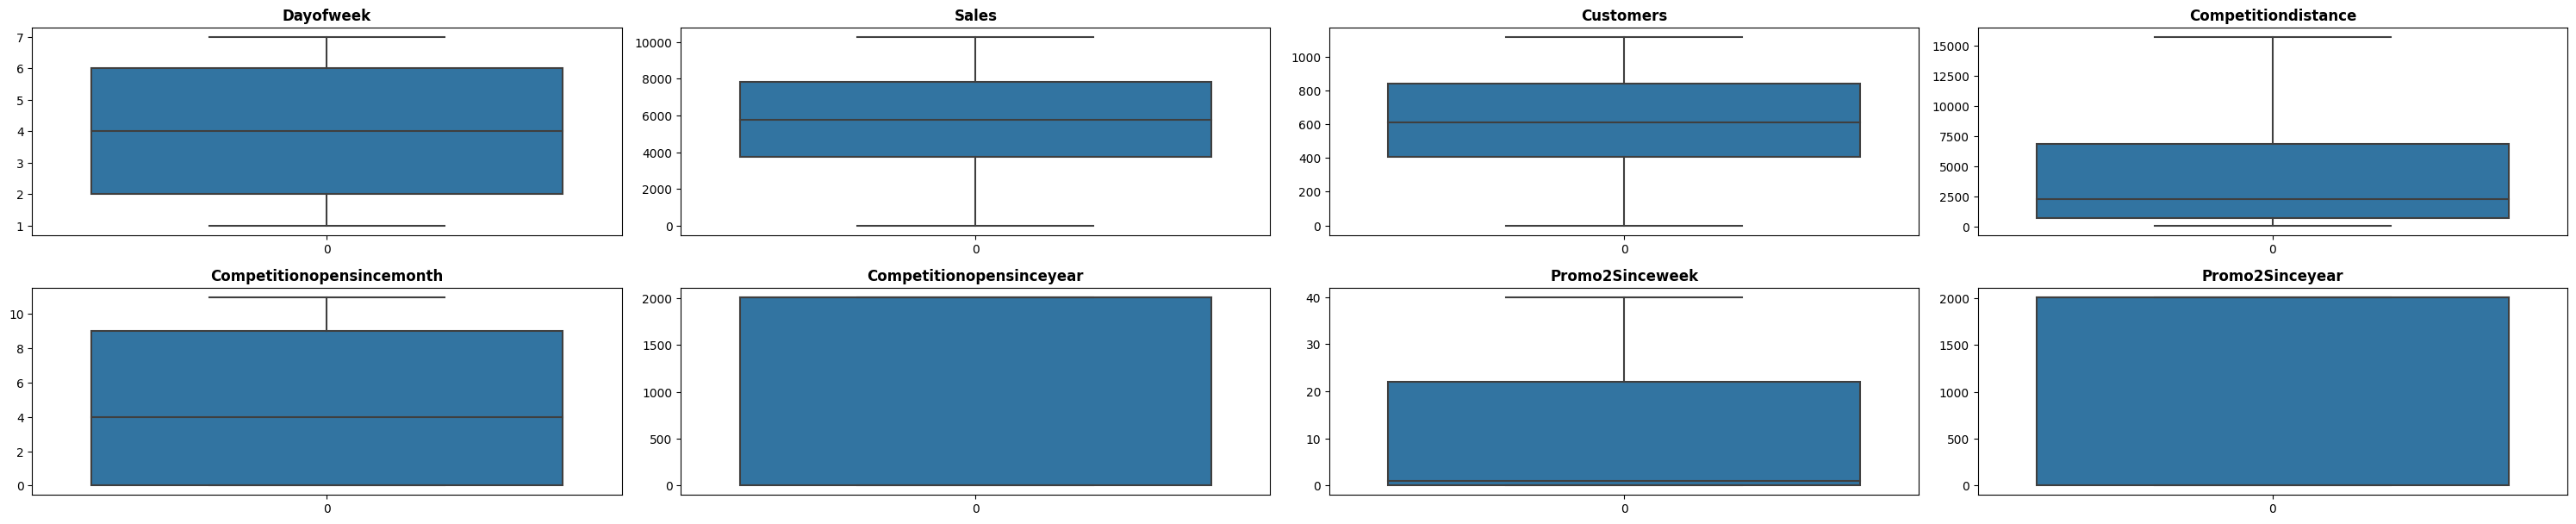

In [ ]:
#Replotting the box plots and rechecking the percentage of outliers still available(if any) in the list of continous_value_feature.
plt.figure(figsize=(30,15))
for n,column in enumerate(Continuous_features):
  plt.subplot(5, 4, n+1)
  sns.boxplot(df[column])
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()


In [ ]:
# Rechecking the total number of outliers and its percentage present in our dataset.
for feature in Continuous_features:
  print(feature,":")
  detect_outliers(df[feature])
  print("\n")

DayOfWeek :
q1:2.0, q2:4.0, q3:6.0
Lower bound: -4.0, Upper bound: 12.0, IQR: 4.0
Total number of outliers are: 0
Total percentage of outlier is: 0.0 %


Sales :
q1:3727.0, q2:5744.0, q3:7856.0
Lower bound: -2466.5, Upper bound: 14049.5, IQR: 4129.0
Total number of outliers are: 0
Total percentage of outlier is: 0.0 %


Customers :
q1:405.0, q2:609.0, q3:837.0
Lower bound: -243.0, Upper bound: 1485.0, IQR: 432.0
Total number of outliers are: 0
Total percentage of outlier is: 0.0 %


CompetitionDistance :
q1:710.0, q2:2325.0, q3:6880.0
Lower bound: -8545.0, Upper bound: 16135.0, IQR: 6170.0
Total number of outliers are: 0
Total percentage of outlier is: 0.0 %


CompetitionOpenSinceMonth :
q1:0.0, q2:4.0, q3:9.0
Lower bound: -13.5, Upper bound: 22.5, IQR: 9.0
Total number of outliers are: 0
Total percentage of outlier is: 0.0 %


CompetitionOpenSinceYear :
q1:0.0, q2:2006.0, q3:2011.0
Lower bound: -3016.5, Upper bound: 5027.5, IQR: 2011.0
Total number of outliers are: 0
Total percentage 

####What all outlier treatment techniques have you used and why did you use those techniques?

**Answer:-** In starting I create a list of continuous variables then I check the outlier in this variable with the help of boxplot. Then I found Sales, Customers and CompetitionDistance have outliers. Then decided to change these outliers to 5% and 95%. therefore I create a function that replaces the values lower than 5% with 5% and above 95% with 95%. then I apply this function to my dataframe and that's how I treat the outliers in my dataset.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns
df = pd.get_dummies(df, columns=['PromoInterval'])

In [ ]:
# checking head of the data

df.head()

Store  DayOfWeek       Date  Sales  Customers  Open  Promo  StateHoliday  \
0      1          5 2015-07-31   5263        555     1      1             0   
1      2          5 2015-07-31   6064        625     1      1             0   
2      3          5 2015-07-31   8314        821     1      1             0   
3      4          5 2015-07-31  10288       1116     1      1             0   
4      5          5 2015-07-31   4822        559     1      1             0   

   SchoolHoliday  StoreType  ...  CompetitionDistance  \
0              1          2  ...                 1270   
1              1          0  ...                  570   
2              1          0  ...                14130   
3              1          2  ...                  620   
4              1          0  ...                15710   

   CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                          9                      2008       0   
1                         11                      2007       1   
2                         11                      2006       1   
3                          9                      2009       0   
4                          4                      2013       0   

   Promo2SinceWeek  Promo2SinceYear  PromoInterval_0  \
0                0                0                1   
1               13             2010                0   
2               14             2011                0   
3                0                0                1   
4                0                0                1   

   PromoInterval_Feb,May,Aug,Nov  PromoInterval_Jan,Apr,Jul,Oct  \
0                              0                              0   
1                              0                              1   
2                              0                              1   
3                              0                              0   
4                              0                              0   

   PromoInterval_Mar,Jun,Sept,Dec  
0                               0  
1                               0  
2                               0  
3                               0  
4                               0  

[5 rows x 21 columns]

#### What all categorical encoding techniques have you used & why did you use those techniques?

**Answer:-**

a. I have used a one-hot encoding technique to change our categorical feature of object type into int type by creating their dummies so that it becomes compatible with feeding it into various ML algorithms in future.

b. I already did In Data Wrangling part label encoding in this features StateHoliday, Assortment, StoreType.

C. I also Changed the date column object to datetime in data wrangling.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

In [ ]:
# We don't have textual data in any of the features so it is not needed for this project

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Extracting date, month and year from Date feature
df["Day"]= df["Date"].dt.day
df["Month"]= df["Date"].dt.month
df["Year"]= df["Date"].dt.year
df["Week"]= df["Date"].dt.week

<ipython-input-49-089bac365cf7>:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df["Week"]= df["Date"].dt.week


In [ ]:
# Manipulate Features to minimize feature correlation and create new features
#combining competition open since month and year into total months
df['Competition_Month'] = (df['Year'] - df['CompetitionOpenSinceYear'])*12 + (df['Month'] - df['CompetitionOpenSinceMonth'])
#correcting the neg values
df['Competition_Month'] = df['Competition_Month'].apply(lambda x:0 if x < 0 else x)
#dropping both the columns
df.drop(['CompetitionOpenSinceMonth','CompetitionOpenSinceYear'], axis=1,inplace=True)


# Creating Promotion_months feature
df["Promotion_Month"]= (df["Year"]-df["Promo2SinceYear"])*12 + (df["Week"]-df["Promo2SinceWeek"])*7/30.5
df["Promotion_Month"] = df["Promotion_Month"].map(lambda x: int(0) if x < 0 else int(x)).fillna(0) * df["Promo2"]

df.drop(['Promo2SinceYear','Promo2SinceWeek'], axis=1,inplace=True)

In [ ]:
# checking head of the data
pd.set_option('display.max_columns', None)
df.head()

Store  DayOfWeek       Date  Sales  Customers  Open  Promo  StateHoliday  \
0      1          5 2015-07-31   5263        555     1      1             0   
1      2          5 2015-07-31   6064        625     1      1             0   
2      3          5 2015-07-31   8314        821     1      1             0   
3      4          5 2015-07-31  10288       1116     1      1             0   
4      5          5 2015-07-31   4822        559     1      1             0   

   SchoolHoliday  StoreType  Assortment  CompetitionDistance  Promo2  \
0              1          2           0                 1270       0   
1              1          0           0                  570       1   
2              1          0           0                14130       1   
3              1          2           2                  620       0   
4              1          0           0                15710       0   

   PromoInterval_0  PromoInterval_Feb,May,Aug,Nov  \
0                1                              0   
1                0                              0   
2                0                              0   
3                1                              0   
4                1                              0   

   PromoInterval_Jan,Apr,Jul,Oct  PromoInterval_Mar,Jun,Sept,Dec  Day  Month  \
0                              0                               0   31      7   
1                              1                               0   31      7   
2                              1                               0   31      7   
3                              0                               0   31      7   
4                              0                               0   31      7   

   Year  Week  Competition_Month  Promotion_Month  
0  2015    31                 82                0  
1  2015    31                 92               64  
2  2015    31                104               51  
3  2015    31                 70                0  
4  2015    31                 27                0

In [ ]:
# Checking Count of store which are closed
df[(df.Open == 0) & (df.Sales == 0)].count()[0]

172817

Here We see that 172817 times stores were temporarily closed for refurbishment. The best solution here is to get rid of closed stores and prevent the models to train on them and get false guidance

In [ ]:
# Removing those rows which have (Open = 0), WHich store are closed for some reason
df = df.drop(df[(df.Open == 0) & (df.Sales == 0)].index)
# Drop Open column by specifying its name
df.drop('Open', axis=1, inplace=True)

In [ ]:
# Checking head of the data
df.head()

Store  DayOfWeek       Date  Sales  Customers  Promo  StateHoliday  \
0      1          5 2015-07-31   5263        555      1             0   
1      2          5 2015-07-31   6064        625      1             0   
2      3          5 2015-07-31   8314        821      1             0   
3      4          5 2015-07-31  10288       1116      1             0   
4      5          5 2015-07-31   4822        559      1             0   

   SchoolHoliday  StoreType  Assortment  CompetitionDistance  Promo2  \
0              1          2           0                 1270       0   
1              1          0           0                  570       1   
2              1          0           0                14130       1   
3              1          2           2                  620       0   
4              1          0           0                15710       0   

   PromoInterval_0  PromoInterval_Feb,May,Aug,Nov  \
0                1                              0   
1                0                              0   
2                0                              0   
3                1                              0   
4                1                              0   

   PromoInterval_Jan,Apr,Jul,Oct  PromoInterval_Mar,Jun,Sept,Dec  Day  Month  \
0                              0                               0   31      7   
1                              1                               0   31      7   
2                              1                               0   31      7   
3                              0                               0   31      7   
4                              0                               0   31      7   

   Year  Week  Competition_Month  Promotion_Month  
0  2015    31                 82                0  
1  2015    31                 92               64  
2  2015    31                104               51  
3  2015    31                 70                0  
4  2015    31                 27                0

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting
# Creating function for Calculating variance_inflation_factor
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

Calculating VIF(Variance Inflation Factor) by excluding:

"Sales" -> As it is target variable

We have extracted new features "Competition_Month" and "Promotion_Month" from features "Promo2SinceWeek", "Promo2SinceYear", "CompetitionOpenSinceMonth", "CompetitionOpenSinceYear", "Month", "Year", "Week". So we can exclude them while calculating VIF.

<ipython-input-56-eeac058e3d73>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(abs(round(df.corr(),3)), annot=True, cmap=plt.cm.CMRmap)


<Axes: >

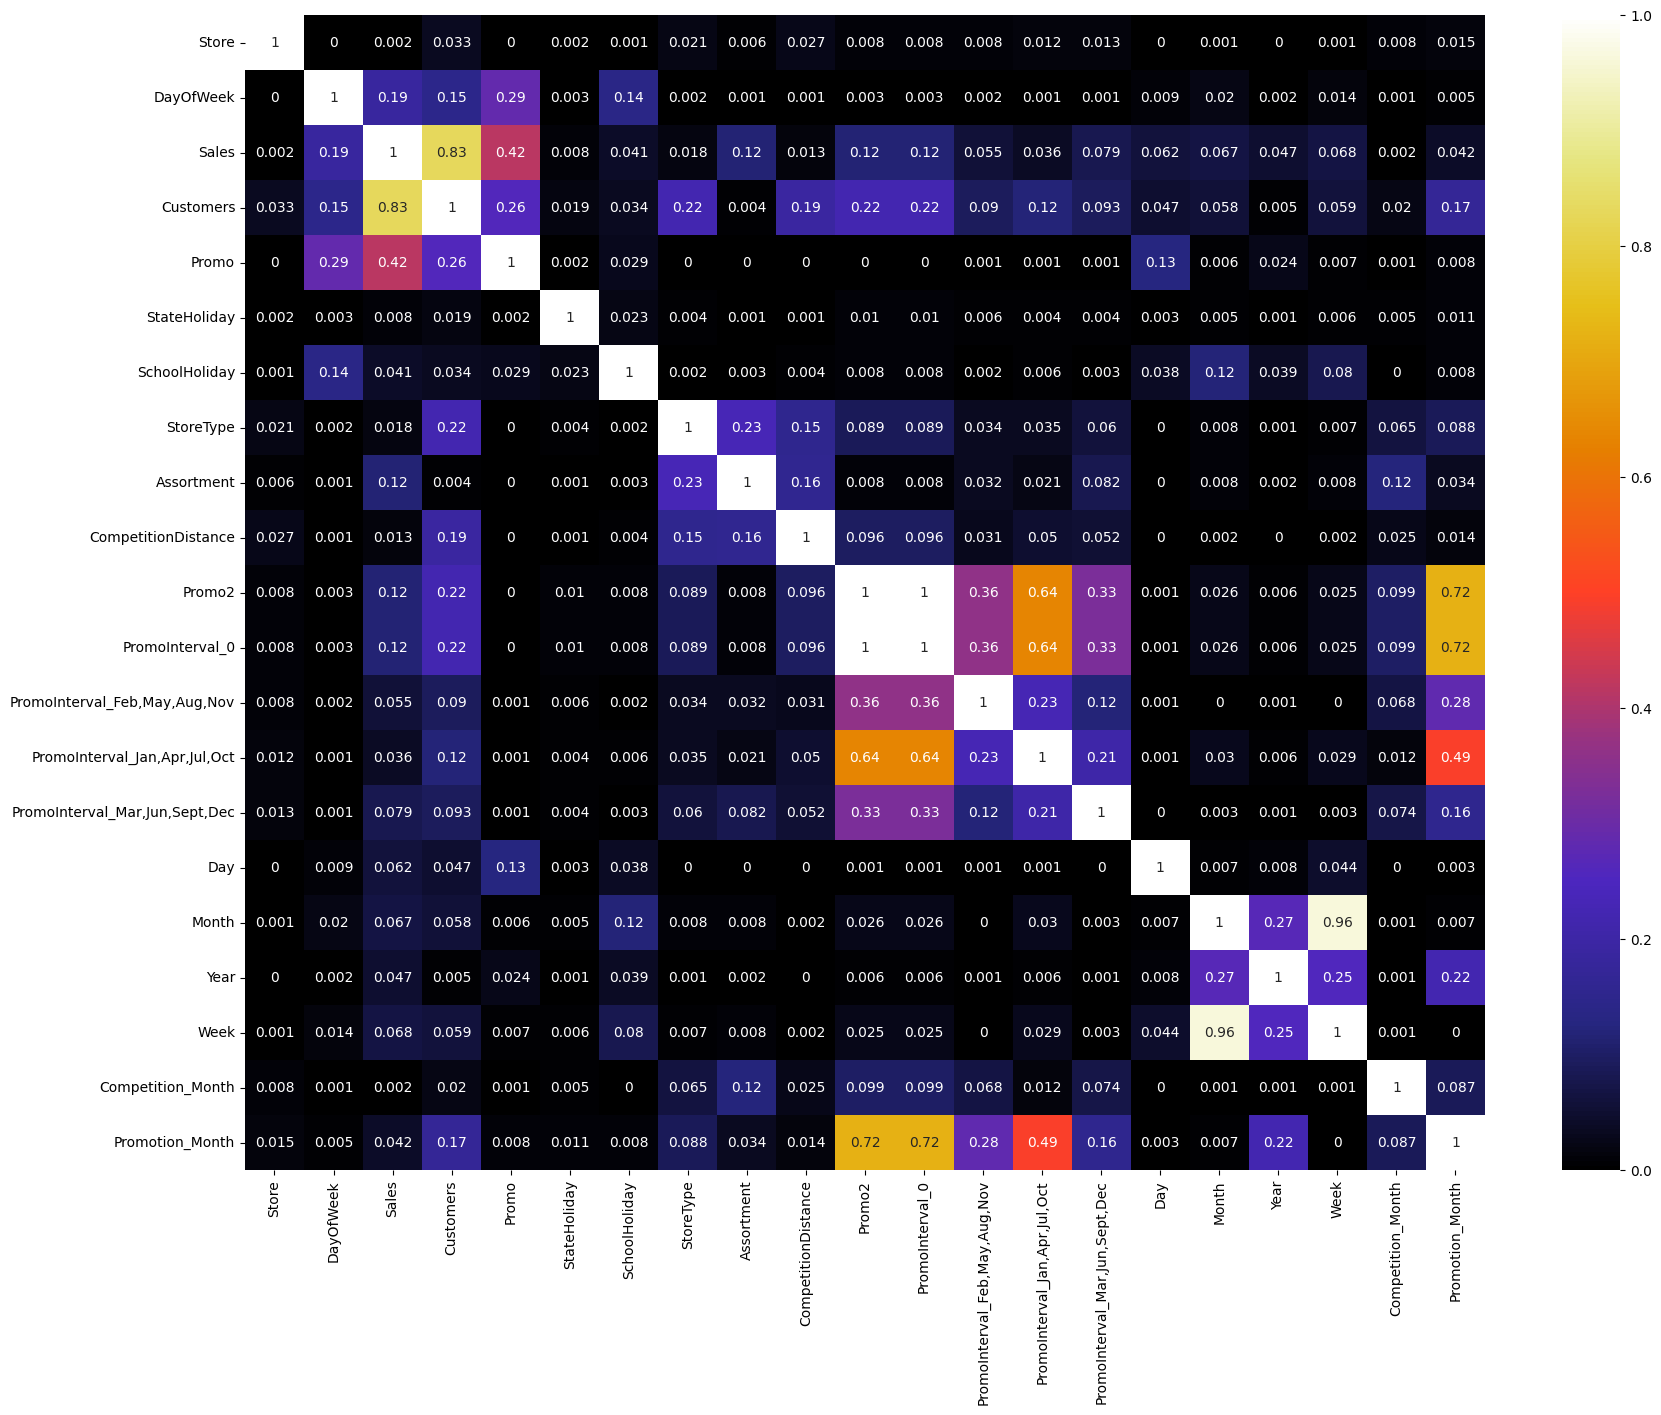

In [ ]:
# Select your features wisely to avoid overfitting
plt.figure(figsize=(20,15))
sns.heatmap(abs(round(df.corr(),3)), annot=True, cmap=plt.cm.CMRmap)

In [ ]:
# Calculating VIF for Dataframe
calc_vif(df[[i for i in df.describe().columns if i not in ['Sales','Month','Year','Week']]])

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


variables        VIF
0                            Store   1.003259
1                        DayOfWeek   1.120701
2                        Customers   1.253922
3                            Promo   1.177870
4                     StateHoliday   1.001065
5                    SchoolHoliday   1.022319
6                        StoreType   1.130974
7                       Assortment   1.108926
8              CompetitionDistance   1.110972
9                           Promo2        inf
10                 PromoInterval_0  16.127958
11   PromoInterval_Feb,May,Aug,Nov        inf
12   PromoInterval_Jan,Apr,Jul,Oct        inf
13  PromoInterval_Mar,Jun,Sept,Dec        inf
14                             Day   1.019041
15               Competition_Month   1.031424
16                 Promotion_Month   2.142424

Since, "Promo2", "PromoInterval_Jan, Apr, Jul, Oct", "PromoInterval_Feb, May, Aug, Nov", "PromoInterval_Mar, Jun, Sept, Dec" have high VIF values and "PromoInterval_Jan, Apr, Jul, Oct" is having least correlation with "Sales". So, let's exclude "PromoInterval_Jan, Apr, Jul, Oct"

In [ ]:
# Calculating VIF for Dataframe
calc_vif(df[[i for i in df.describe().columns if i not in ['Sales','Month','Year','Week','PromoInterval_Jan,Apr,Jul,Oct']]])

variables        VIF
0                            Store   1.003259
1                        DayOfWeek   1.120701
2                        Customers   1.253922
3                            Promo   1.177870
4                     StateHoliday   1.001065
5                    SchoolHoliday   1.022319
6                        StoreType   1.130974
7                       Assortment   1.108926
8              CompetitionDistance   1.110972
9                           Promo2  17.473234
10                 PromoInterval_0  16.127958
11   PromoInterval_Feb,May,Aug,Nov   1.245463
12  PromoInterval_Mar,Jun,Sept,Dec   1.234800
13                             Day   1.019041
14               Competition_Month   1.031424
15                 Promotion_Month   2.142424

The Multicolinearity of columns like 'Promo2''PromoInterval_Jan,Apr,Jul,Oct' is pretty high so I decided to drop it



In [ ]:
# Excluding Promo2 And PromoInterval_0
calc_vif(df[[i for i in df.describe().columns if i not in ['Sales','Month','Year','Week','PromoInterval_Jan,Apr,Jul,Oct','Promo2']]])

variables       VIF
0                            Store  3.675746
1                        DayOfWeek  4.500872
2                        Customers  8.294476
3                            Promo  2.071952
4                     StateHoliday  1.001937
5                    SchoolHoliday  1.251124
6                        StoreType  1.927146
7                       Assortment  2.084936
8              CompetitionDistance  1.945040
9                  PromoInterval_0  4.674908
10   PromoInterval_Feb,May,Aug,Nov  1.366305
11  PromoInterval_Mar,Jun,Sept,Dec  1.307890
12                             Day  3.881570
13               Competition_Month  1.511736
14                 Promotion_Month  2.823987

I am getting very good VIF's (Less then 10). Now let's move forward and store the selected features in a new dataframe.



In [ ]:
# New Dataframe which will be our final dataframe
data = df[["Store", "DayOfWeek","Customers",'Promo',
           "StateHoliday","SchoolHoliday",'StoreType',
           'Assortment',"CompetitionDistance","PromoInterval_0",
           "PromoInterval_Feb,May,Aug,Nov","PromoInterval_Mar,Jun,Sept,Dec",
           "Day","Competition_Month","Promotion_Month","Sales"]]

In [ ]:
# Checking the head of the data
data.head()

Store  DayOfWeek  Customers  Promo  StateHoliday  SchoolHoliday  StoreType  \
0      1          5        555      1             0              1          2   
1      2          5        625      1             0              1          0   
2      3          5        821      1             0              1          0   
3      4          5       1116      1             0              1          2   
4      5          5        559      1             0              1          0   

   Assortment  CompetitionDistance  PromoInterval_0  \
0           0                 1270                1   
1           0                  570                0   
2           0                14130                0   
3           2                  620                1   
4           0                15710                1   

   PromoInterval_Feb,May,Aug,Nov  PromoInterval_Mar,Jun,Sept,Dec  Day  \
0                              0                               0   31   
1                              0                               0   31   
2                              0                               0   31   
3                              0                               0   31   
4                              0                               0   31   

   Competition_Month  Promotion_Month  Sales  
0                 82                0   5263  
1                 92               64   6064  
2                104               51   8314  
3                 70                0  10288  
4                 27                0   4822

In [ ]:
# info of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844392 entries, 0 to 1017190
Data columns (total 16 columns):
 #   Column                          Non-Null Count   Dtype
---  ------                          --------------   -----
 0   Store                           844392 non-null  int64
 1   DayOfWeek                       844392 non-null  int64
 2   Customers                       844392 non-null  int64
 3   Promo                           844392 non-null  int64
 4   StateHoliday                    844392 non-null  int64
 5   SchoolHoliday                   844392 non-null  int64
 6   StoreType                       844392 non-null  int64
 7   Assortment                      844392 non-null  int64
 8   CompetitionDistance             844392 non-null  int64
 9   PromoInterval_0                 844392 non-null  uint8
 10  PromoInterval_Feb,May,Aug,Nov   844392 non-null  uint8
 11  PromoInterval_Mar,Jun,Sept,Dec  844392 non-null  uint8
 12  Day                             844392 non-

##### What all feature selection methods have you used  and why?

**Answer:-**

I have used correlation heatmap and VIF(various inflation factors) and excluded some of the features that were creating noise In model implementation. Also, I have removed multicollinearity and selected features that are highly dependent on our target variable.

##### Which all features you found important and why?

**Answer:-**

I have selected "Store", "DayOfWeek", "Customers", 'Promo',            
           "StateHoliday", "SchoolHoliday", 'StoreType',
           'Assortment', "CompetitionDistance", "PromoInterval_0",
           "PromoInterval_Feb,May,Aug,Nov", "PromoInterval_Mar,Jun,Sept,Dec",
           "Day", "Competition_Month", and "Promotion_Month" as our final features as they are highly correlated with the target variable (Sales) and no two features provide the same information.

In all features, I find the VIF value is <10 that's why I select these features.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# checking which of the variables are continous in nature
for i in data.columns:
  print(f"The number of unique counts in feature {i} is: {data[i].nunique()}")

The number of unique counts in feature Store is: 1115
The number of unique counts in feature DayOfWeek is: 7
The number of unique counts in feature Customers is: 1055
The number of unique counts in feature Promo is: 2
The number of unique counts in feature StateHoliday is: 4
The number of unique counts in feature SchoolHoliday is: 2
The number of unique counts in feature StoreType is: 4
The number of unique counts in feature Assortment is: 3
The number of unique counts in feature CompetitionDistance is: 542
The number of unique counts in feature PromoInterval_0 is: 2
The number of unique counts in feature PromoInterval_Feb,May,Aug,Nov is: 2
The number of unique counts in feature PromoInterval_Mar,Jun,Sept,Dec is: 2
The number of unique counts in feature Day is: 31
The number of unique counts in feature Competition_Month is: 367
The number of unique counts in feature Promotion_Month is: 73
The number of unique counts in feature Sales is: 9433


In [ ]:
# Storing the continous variables(number of unique counts >40) in a separate list and treating them in order to make gaussian distribution
cont_variables= [ "Customers", "CompetitionDistance", "Competition_Month","Promotion_Month", "Sales"]

Before Applying Transformation


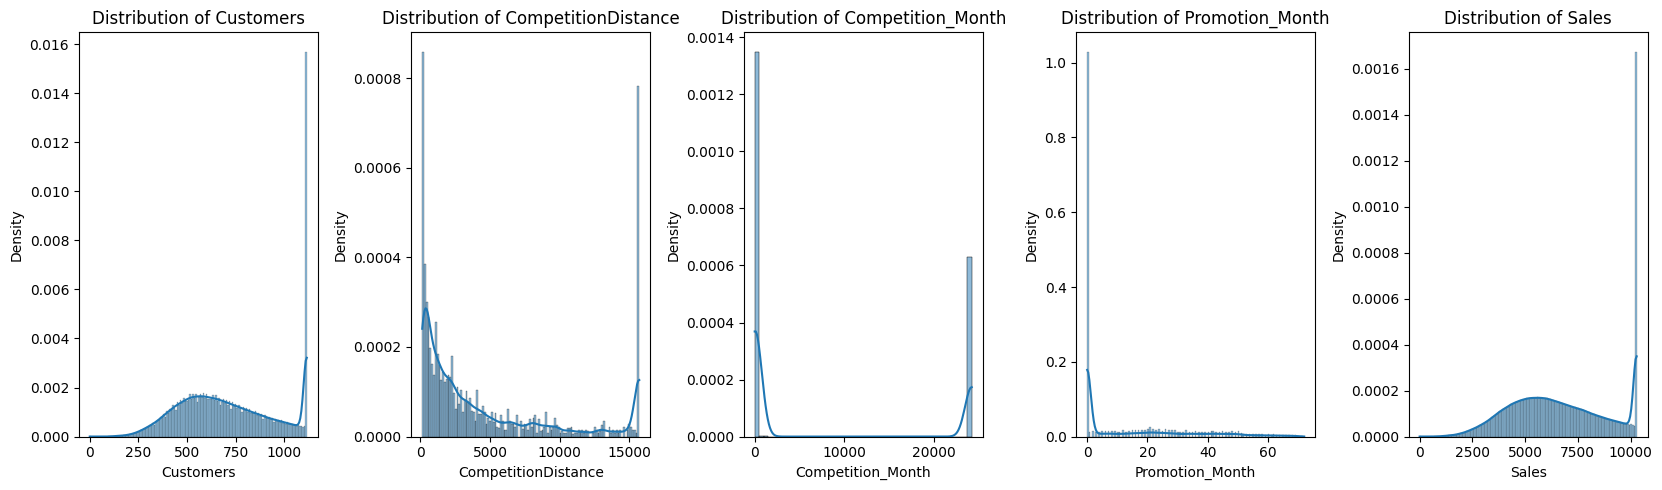

In [ ]:
# Checking the distribution of each continous variable from our final dataframe
plt.figure(figsize=(20,5))
print("Before Applying Transformation")
for n,col in enumerate(cont_variables):
  plt.subplot(1,6,n+1)
  sns.histplot(data[col], kde=True, stat="density")
  # sns.distplot(data[col])
  plt.title(f'Distribution of {col}')
  plt.tight_layout()

In [ ]:
import matplotlib.pyplot as plt
import scipy.stats as stat
import pylab
#### If you want to check whether feature is guassian or normal distributed
#### Q-Q plot
def plot_data(df,feature):
    stat.probplot(df[feature],dist='norm',plot=pylab)

Q-Q Plot for variable: Customers
Q-Q Plot for variable: CompetitionDistance
Q-Q Plot for variable: Competition_Month
Q-Q Plot for variable: Promotion_Month
Q-Q Plot for variable: Sales


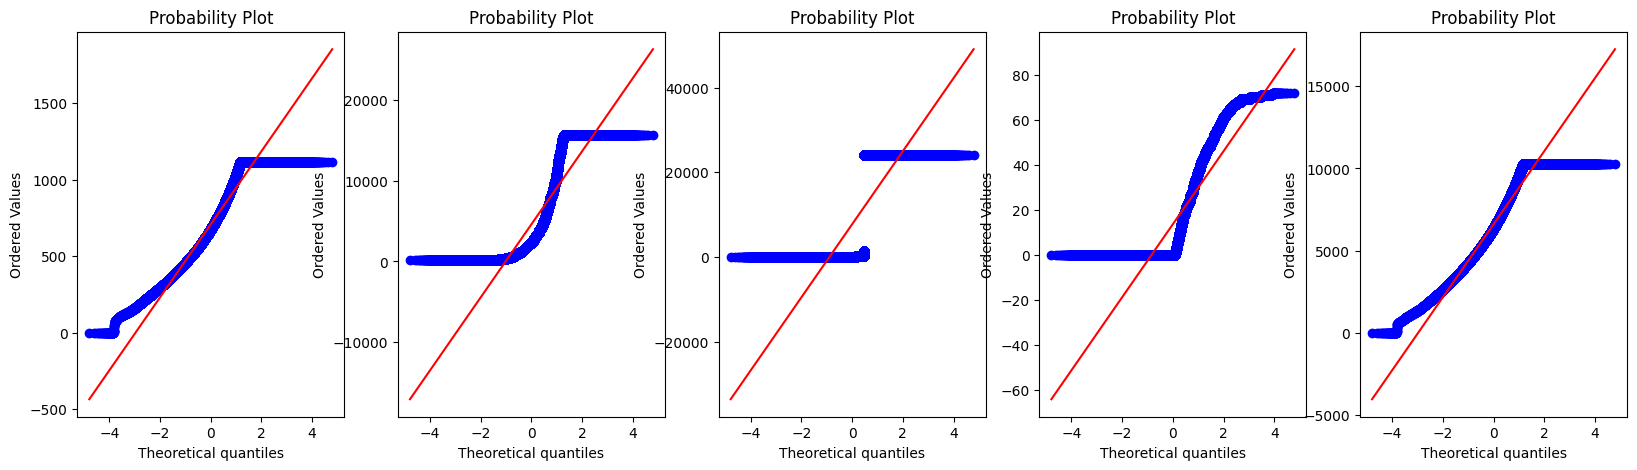

In [ ]:
plt.figure(figsize=(20,5))
for num,column in enumerate(cont_variables):
  plt.subplot(1,5,num+1)
  print(f"Q-Q Plot for variable: {column}")
  plot_data(data,column)
plt.show()

It is clear from the above plots that our continuous numeric features are not following a perfectly normal distribution trend. So, now we will try various transformation techniques to get the Gaussian distributed curve.

Let's create different copies and check which transformation is best for each feature.

In [ ]:
# Creating 5 different copies to check the distribution of each of the variable
test_df1= data.copy()
test_df2= data.copy()
test_df3= data.copy()
test_df4= data.copy()
test_df5= data.copy()

###Logarithmic Transformation

After Applying Transformation


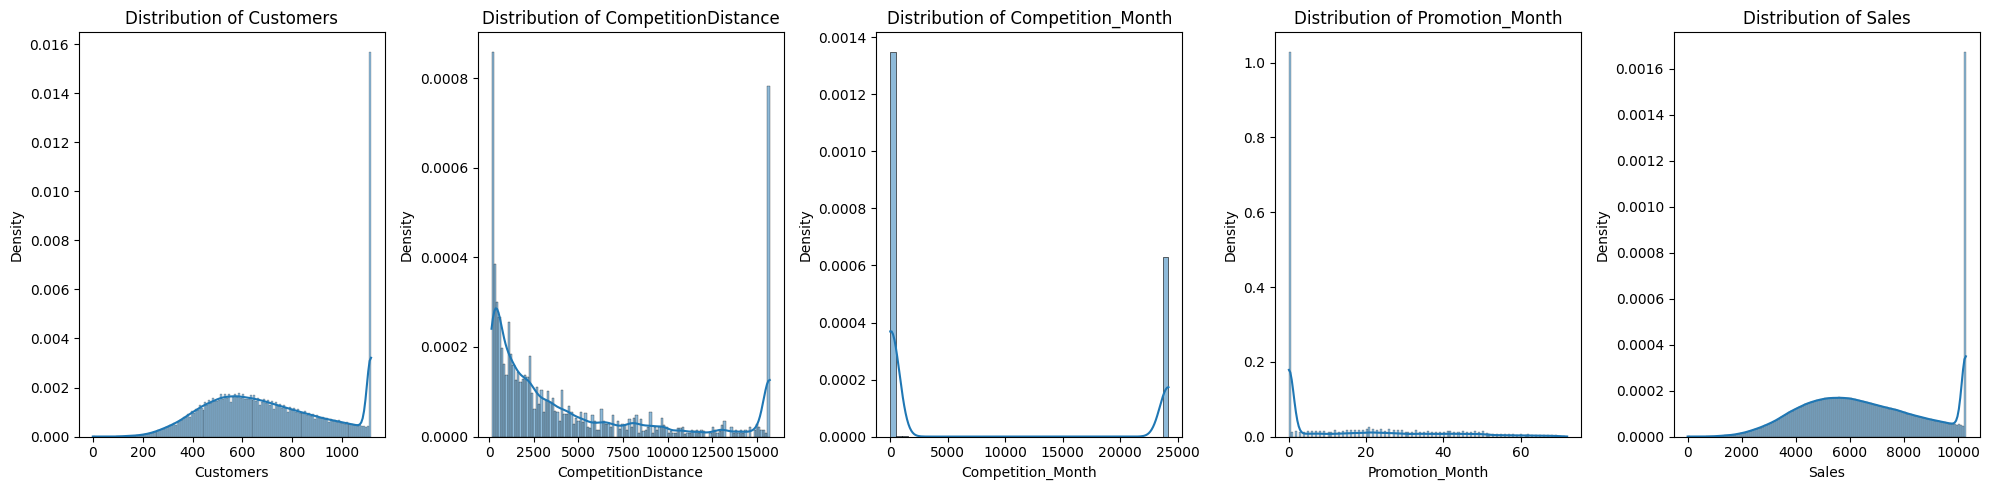

In [ ]:
# Applying transformation on the above considered columns
test_df1['Sales']=np.log(test_df1['Sales']+1)
test_df1['Customers']=np.log(test_df1['Customers']+1)
test_df1['CompetitionDistance']=np.log(test_df1['CompetitionDistance']+1)
test_df1['Competition_Month']=np.log(test_df1['Competition_Month']+1)
test_df1['Promotion_Month']=np.log(test_df1['Promotion_Month']+1)

# Checking the distribution of each continous variable by excluding 0 from our final dataframe
plt.figure(figsize=(20,5))
print("After Applying Transformation")
for n,col in enumerate(cont_variables):
  plt.subplot(1,5,n+1)
  sns.histplot(data[col], kde=True, stat="density")
  plt.title(f'Distribution of {col}')
  plt.tight_layout()

Q-Q Plot for variable: Customers
Q-Q Plot for variable: CompetitionDistance
Q-Q Plot for variable: Competition_Month
Q-Q Plot for variable: Promotion_Month
Q-Q Plot for variable: Sales


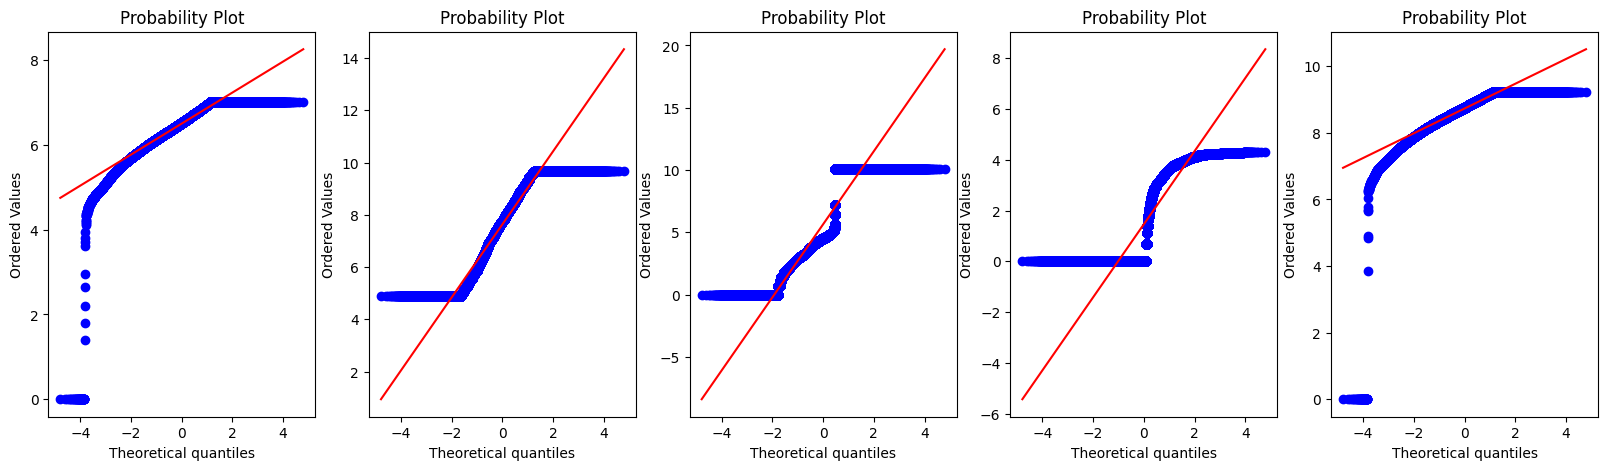

In [ ]:
plt.figure(figsize=(20,5))
for num,column in enumerate(cont_variables):
  plt.subplot(1,5,num+1)
  print(f"Q-Q Plot for variable: {column}")
  plot_data(test_df1,column)
plt.show()

### Reciprocal Transformation

After Applying Transformation


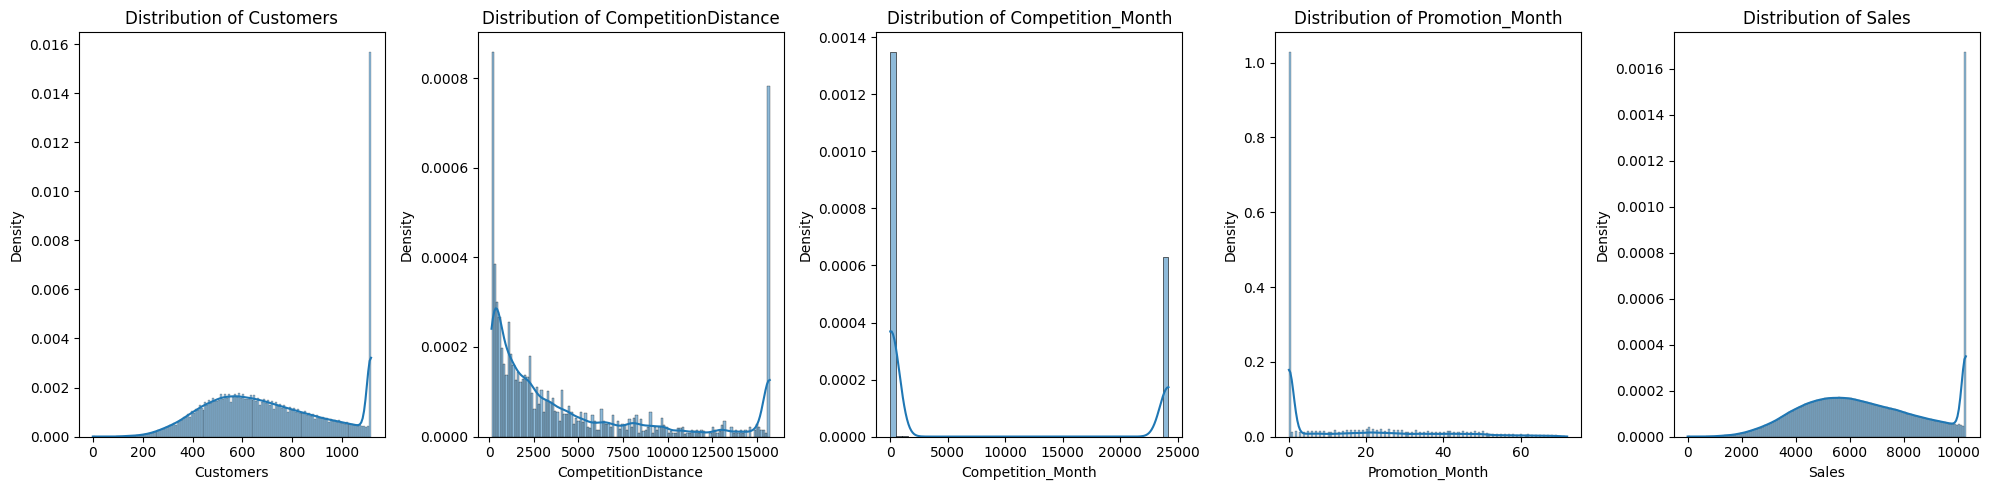

In [ ]:
# Applying transformation on the above considered columns
test_df2['Sales']=1/(test_df2['Sales']+1)
test_df2['Customers']=1/(test_df2['Customers']+1)
test_df2['CompetitionDistance']=1/(test_df2['CompetitionDistance']+1)
test_df2['Competition_Month']=1/(test_df2['Competition_Month']+1)
test_df2['Promotion_Month']=1/(test_df2['Promotion_Month']+1)


# Checking the distribution of each continous variable by excluding 0 from our final dataframe
plt.figure(figsize=(20,5))
print("After Applying Transformation")
for n,col in enumerate(cont_variables):
  plt.subplot(1,5,n+1)
  sns.histplot(data[col], kde=True, stat="density")
  plt.title(f'Distribution of {col}')
  plt.tight_layout()

Q-Q Plot for variable: Customers
Q-Q Plot for variable: CompetitionDistance
Q-Q Plot for variable: Competition_Month
Q-Q Plot for variable: Promotion_Month
Q-Q Plot for variable: Sales


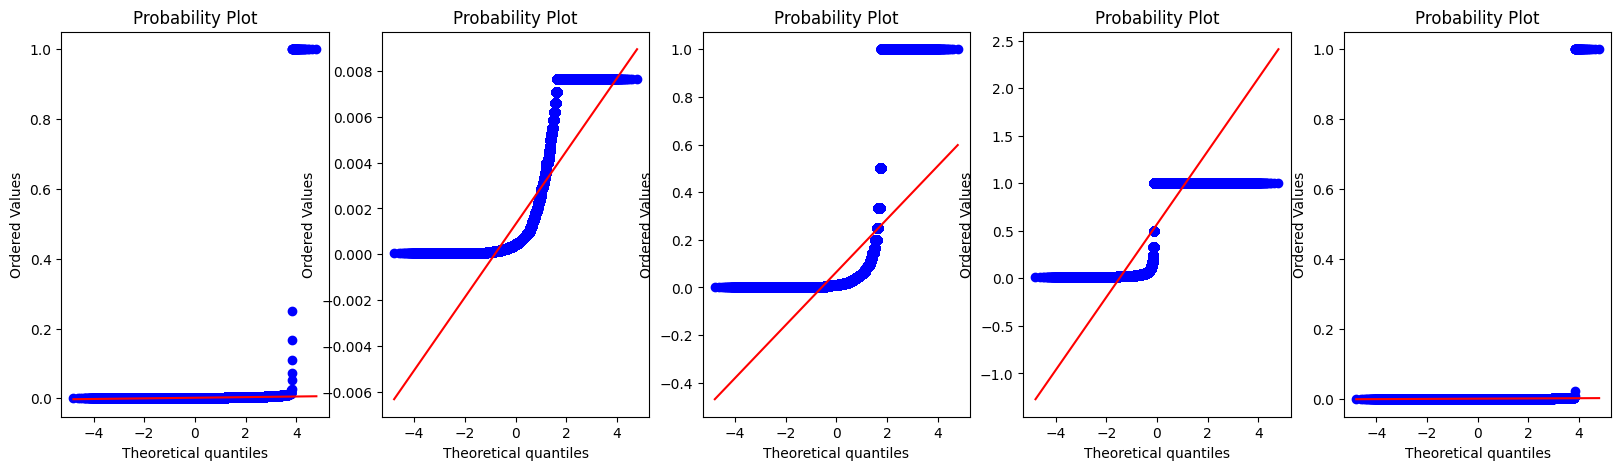

In [ ]:
plt.figure(figsize=(20,5))
for num,column in enumerate(cont_variables):
  plt.subplot(1,5,num+1)
  print(f"Q-Q Plot for variable: {column}")
  plot_data(test_df2,column)
plt.show()

###Square Root Transformation

After Applying Transformation


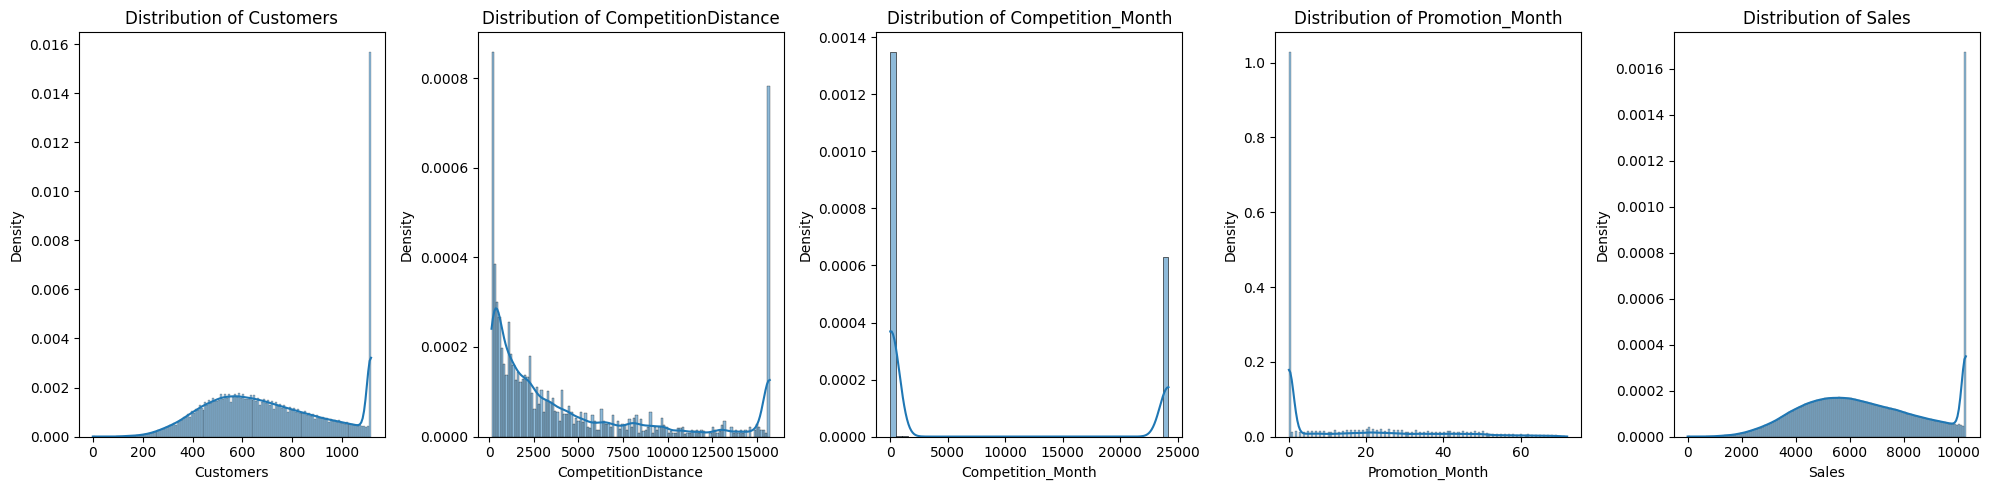

In [ ]:
# Applying transformation on the above considered columns
test_df3['Sales']=(test_df3['Sales'])**(1/2)
test_df3['Customers']=(test_df3['Customers'])**(1/2)
test_df3['CompetitionDistance']=(test_df3['CompetitionDistance'])**(1/2)
test_df3['Competition_Month']=(test_df3['Competition_Month'])**(1/2)
test_df3['Promotion_Month']=(test_df3['Promotion_Month'])**(1/2)

# Checking the distribution of each continous variable by excluding 0 from our final dataframe
plt.figure(figsize=(20,5))
print("After Applying Transformation")
for n,col in enumerate(cont_variables):
  plt.subplot(1,5,n+1)
  sns.histplot(data[col], kde=True, stat="density")
  plt.title(f'Distribution of {col}')
  plt.tight_layout()

Q-Q Plot for variable: Customers
Q-Q Plot for variable: CompetitionDistance
Q-Q Plot for variable: Competition_Month
Q-Q Plot for variable: Promotion_Month
Q-Q Plot for variable: Sales


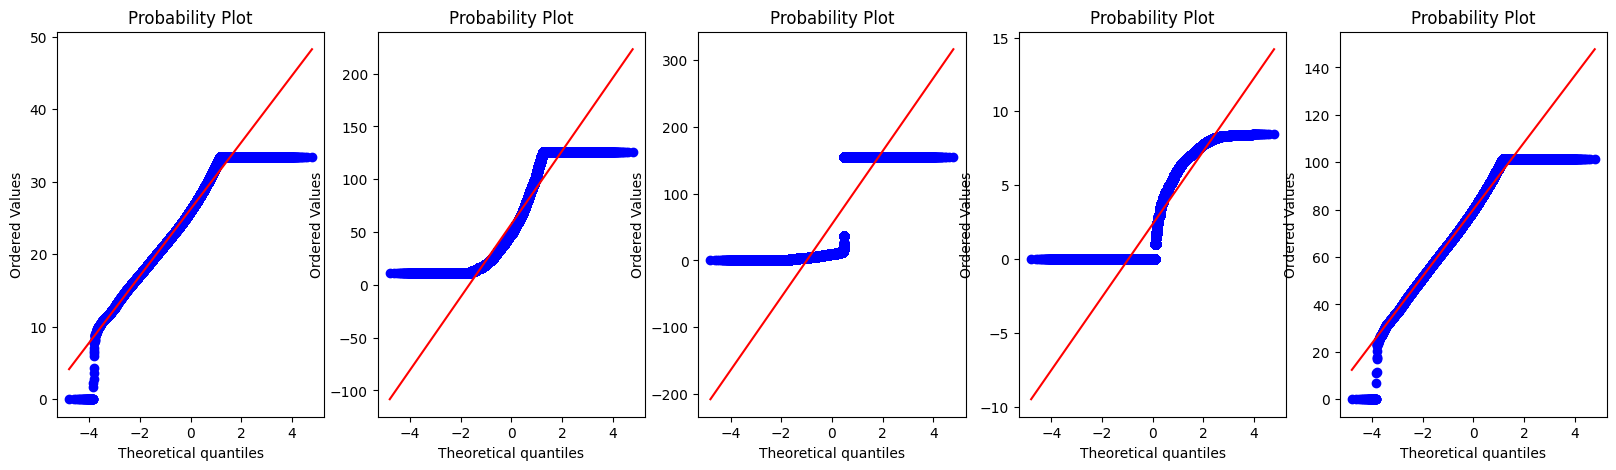

In [ ]:
plt.figure(figsize=(20,5))
for num,column in enumerate(cont_variables):
  plt.subplot(1,5,num+1)
  print(f"Q-Q Plot for variable: {column}")
  plot_data(test_df3,column)
plt.show()

###Exponential Transformation

After Applying Transformation


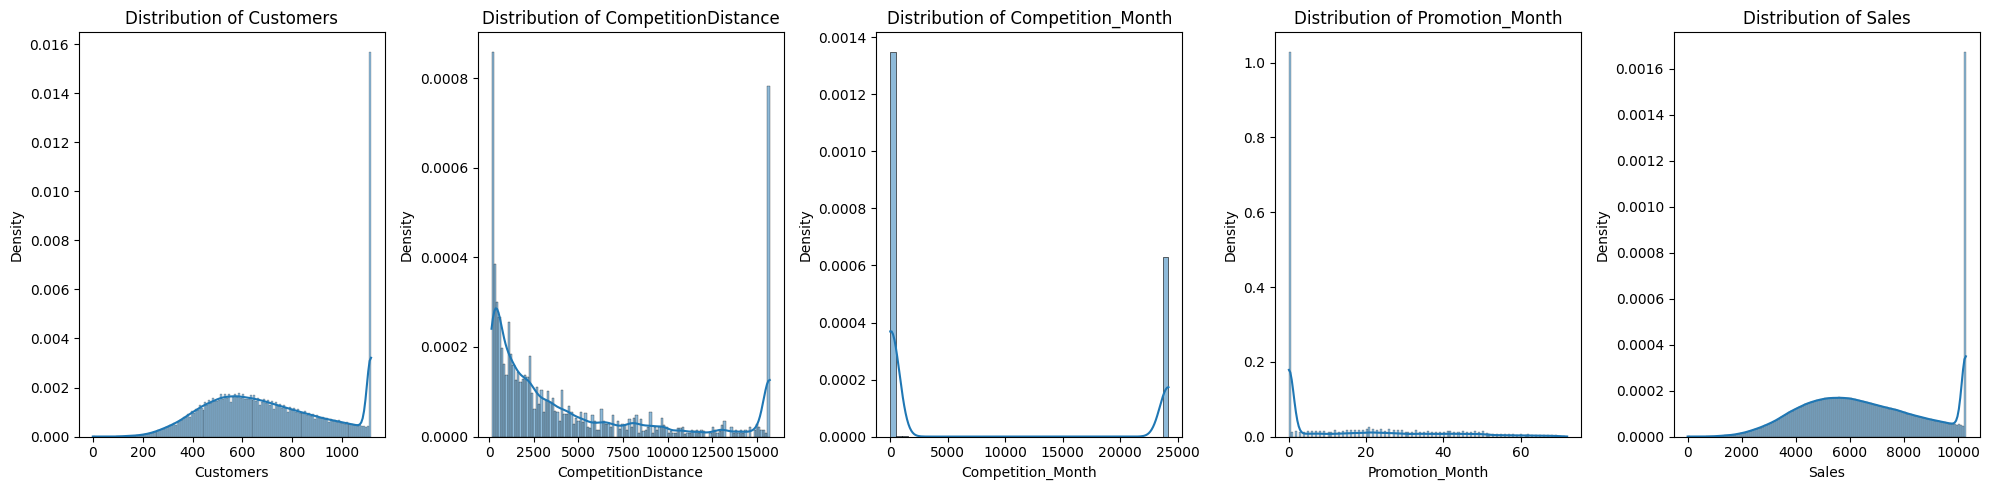

In [ ]:
# Applying transformation on the above considered columns
test_df4['Sales']=(test_df4['Sales'])**(1/1.2)
test_df4['Customers']=(test_df4['Customers'])**(1/1.2)
test_df4['CompetitionDistance']=(test_df4['CompetitionDistance'])**(1/1.2)
test_df4['Competition_Month']=(test_df4['Competition_Month'])**(1/1.2)
test_df4['Promotion_Month']=(test_df4['Promotion_Month'])**(1/1.2)

# Checking the distribution of each continous variable by excluding 0 from our final dataframe
plt.figure(figsize=(20,5))
print("After Applying Transformation")
for n,col in enumerate(cont_variables):
  plt.subplot(1,5,n+1)
  sns.histplot(data[col], kde=True, stat="density")
  plt.title(f'Distribution of {col}')
  plt.tight_layout()

Q-Q Plot for variable: Customers
Q-Q Plot for variable: CompetitionDistance
Q-Q Plot for variable: Competition_Month
Q-Q Plot for variable: Promotion_Month
Q-Q Plot for variable: Sales


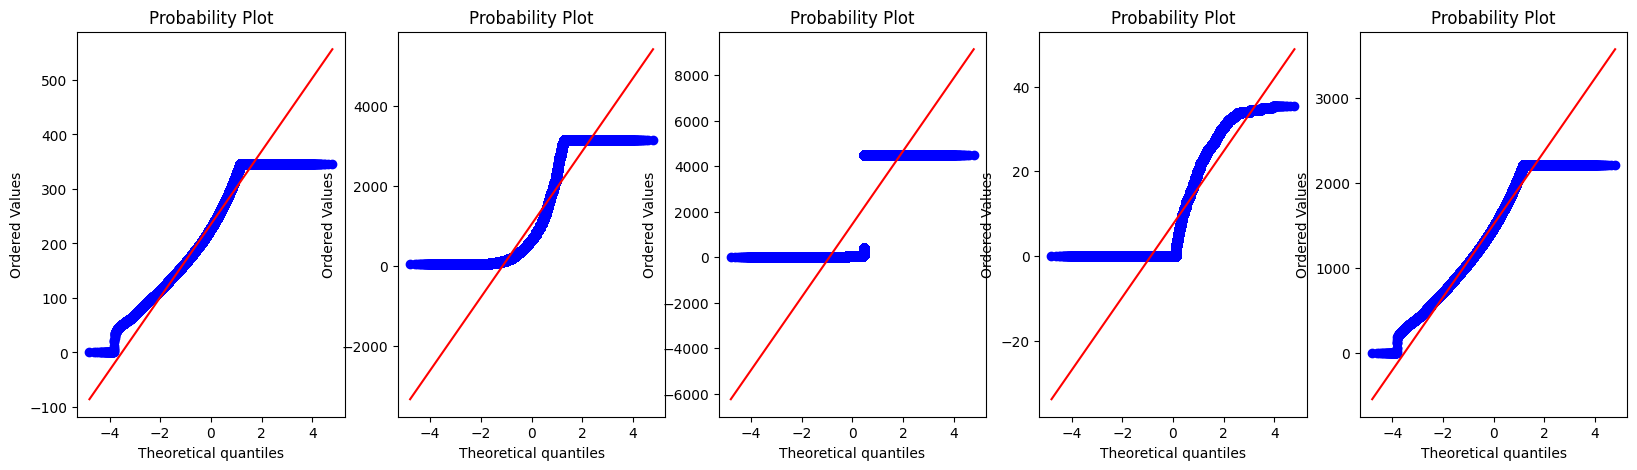

In [ ]:
plt.figure(figsize=(20,5))
for num,column in enumerate(cont_variables):
  plt.subplot(1,5,num+1)
  print(f"Q-Q Plot for variable: {column}")
  plot_data(test_df4,column)
plt.show()

From the above plots, it is clear that:

Square Root Transformation

1. Feature "Customers" best Transformation is  Square Root Transformation

2. Feature "CompetitionDistance" best Transformation is  Square Root Transformation

3. Feature "Competition_Month" In this variable any of the transformations not work but I am still using Square Root Transformation

4. Feature "Promotion_Month" In this variable any of the transformations not work but I am still using Square Root Transformation

5. Feature "Sales" best Transformation is Square Root Transformation

In [ ]:
# Applying transformation on the above considered columns
## Square Root Transformation
data_new = data.copy()
data_new['Sales'] = (data_new['Sales'])**(1/2)
data_new['Customers'] = (data_new['Customers'])**(1/2)
data_new['CompetitionDistance'] = (data_new['CompetitionDistance'])**(1/2)
data_new['Competition_Month'] = (data_new['Competition_Month'])**(1/2)
data_new['Promotion_Month'] = (data_new['Promotion_Month'])**(1/2)

I have normally distributed data for all of the continous variables.

In [ ]:
# checking head of the data

data_new.head()

Store  DayOfWeek  Customers  Promo  StateHoliday  SchoolHoliday  StoreType  \
0      1          5  23.558438      1             0              1          2   
1      2          5  25.000000      1             0              1          0   
2      3          5  28.653098      1             0              1          0   
3      4          5  33.406586      1             0              1          2   
4      5          5  23.643181      1             0              1          0   

   Assortment  CompetitionDistance  PromoInterval_0  \
0           0            35.637059                1   
1           0            23.874673                0   
2           0           118.869677                0   
3           2            24.899799                1   
4           0           125.339539                1   

   PromoInterval_Feb,May,Aug,Nov  PromoInterval_Mar,Jun,Sept,Dec  Day  \
0                              0                               0   31   
1                              0                               0   31   
2                              0                               0   31   
3                              0                               0   31   
4                              0                               0   31   

   Competition_Month  Promotion_Month       Sales  
0           9.055385         0.000000   72.546537  
1           9.591663         8.000000   77.871689  
2          10.198039         7.141428   91.181138  
3           8.366600         0.000000  101.429779  
4           5.196152         0.000000   69.440622

### 6. Data Scaling

Before scaling our data let's just separate our "x" and "y" variables as we do not have to scale our y variable (Target variable).


In [ ]:
# Creating our X and Y Variable because we are not scaling are Dependent variable(Y).
# Separating "x" and "y" variables
x= data_new[["Store","DayOfWeek", "Customers","Promo","StateHoliday","SchoolHoliday","StoreType","Assortment","CompetitionDistance","PromoInterval_0","PromoInterval_Feb,May,Aug,Nov","PromoInterval_Mar,Jun,Sept,Dec","Day","Competition_Month","Promotion_Month"]]
y= data_new[['Sales']]
print(x.shape)
print(y.shape)

(844392, 15)
(844392, 1)


In [ ]:
# Importing StandardScaler library
from sklearn.preprocessing import StandardScaler

In [ ]:
# Creating object
std = StandardScaler()

In [ ]:
# Fit and Transform
x= std.fit_transform(x)

###Which method have you used to scale you data and why?

I have used StandardScaler from the sklearn library to scale data. This is important for us, as features on different scales can lead to poor performance or slow convergence. Standardizing the features also makes it easier to compare different features or observe the effect of a feature on the target variable("Sales") by comparing the magnitude of its coefficient. Additionally, we are going to apply a linear regression model for which having normally distributed data is the statistical assumption of the model, which standardization can help enforce.

### 7. Dimensionality Reduction

Dimensionality Reduction is not required for our dataset because of feature selection and Multicolinerity I already deal with.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
# Importing train_test_split from sklearn
from sklearn.model_selection import train_test_split

In [ ]:
# Spliting the dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

##### What data splitting ratio have you used and why?

**Answer:-** Since our dataset is huge and has nearly 10lakh observations. So, We have assigned 80% of data to the train set and 20% to the test set with random_state=0 so that we do not get different observations in every split.

### 9. Handling Imbalanced Dataset

 I have already excluded the closed stores for which the sales are 0. So, we do not have any imbalanced data with us.

## ***7. ML Model Implementation***

### ML Model - 1 - LINEAR REGRESSION

In [ ]:
# Importing LinearRegression from sklearn
from sklearn.linear_model import LinearRegression

In [ ]:
# ML Model - 1 Implementation
linear_regressor= LinearRegression()

# Fit the Algorithm
linear_regressor.fit(x_train,y_train)

# Predict the model
y_train_regression_pred= linear_regressor.predict(x_train)
y_test_regression_pred= linear_regressor.predict(x_test)

In [ ]:
# Checking the coefficients
linear_regressor.coef_

array([[-2.63830518e-01, -2.52308668e-03,  1.25189861e+01,
         2.67534970e+00, -9.17157337e-02,  1.06952810e-01,
         2.37324720e+00,  7.72906824e-01,  1.91082264e+00,
        -3.93158769e-01, -2.14345542e-01, -4.75072751e-01,
         1.65956437e-02, -1.54642440e-01,  1.19097314e+00]])

In [ ]:
# Checking the intercept
linear_regressor.intercept_

array([80.03891396])

In [ ]:
# Evaluating MSE and RMSE
from sklearn.metrics import mean_squared_error

MSE  = mean_squared_error(y_test, y_test_regression_pred)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 37.90359292523964
RMSE : 6.156589390664253


In [ ]:
# Checking R2
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_test_regression_pred)
print("R2 :" ,r2)

R2 : 0.8155629135942306


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


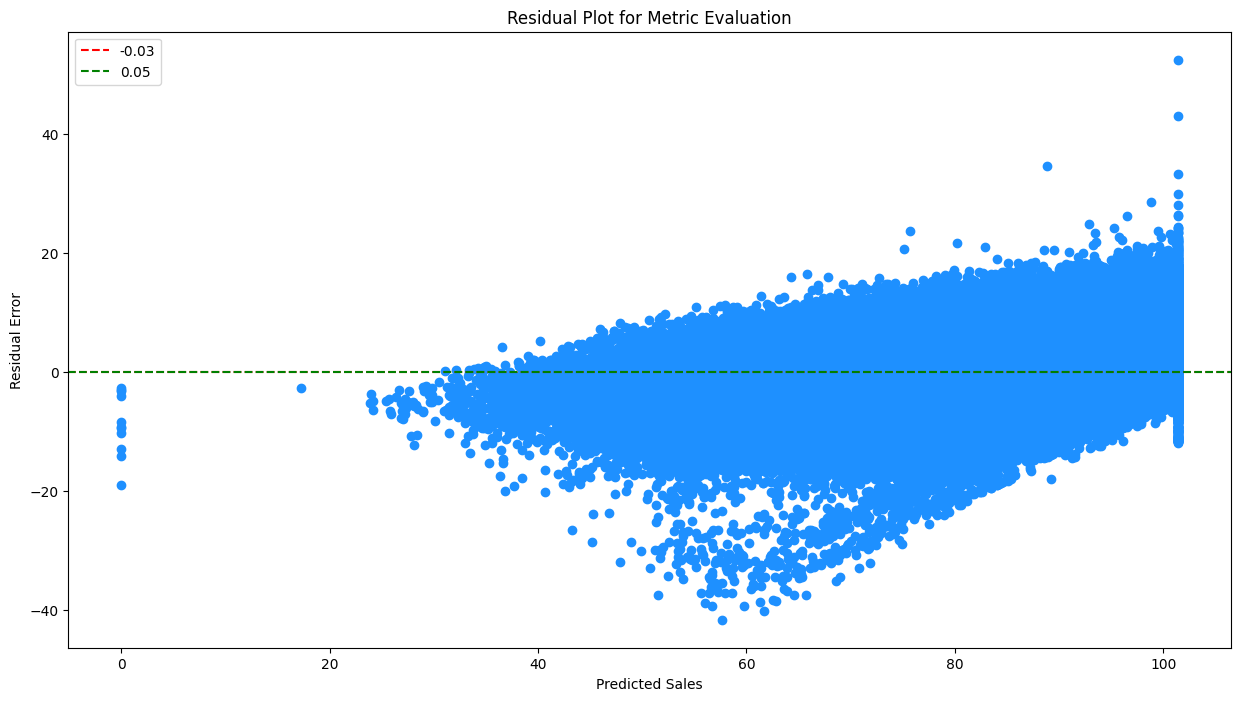

In [ ]:
# Visualizing evaluation Metric Score chart
# Calculating residuals
residuals = y_test - y_test_regression_pred
Mean= round(np.mean(residuals),2)
Median= round(np.median(residuals),2)

# Plot residuals
plt.figure(figsize=(15,8))
plt.scatter(y_test, residuals, c="dodgerblue")
plt.title("Residual Plot for Metric Evaluation")
plt.xlabel('Predicted Sales')
plt.ylabel('Residual Error')

# Add horizontal line at mean value of y
plt.axhline(y=np.nanmean(residuals), color='red', linestyle='--', label=Mean[0])
plt.axhline(y=np.nanmedian(residuals), color='green', linestyle='--', label=Median)
plt.legend()

plt.show()

We have started with the most basic and simple ML model i.e Linear Regression. We have tried to evaluate the most important regression metics on both the train and test datesets so that we can conclude our ML model. Here for Linear Regression, we can observe that both the r2 scores are pretty close which explains that on test dataset and our model is following the correct way.

We can comprehend that 'dependent' and 'independent' variables are not much following direct linear relationship with each other thats why we got 0.81 maximum r2 score in LR model implementation.

In order to fetch good and more accurate results, we shall go for cross- Validation & Hyperparameter Tuning of 'Lasso', 'Ridge' and 'Elastic Net' models.

#### 2. Cross- Validation & Hyperparameter Tuning

Ridge Regression

In [ ]:
# import ridge regression from sklearn library
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Creating Ridge instance
ridge= Ridge()

# Defining parameters
parameters = {"alpha": [1e-1,1,5,7,10,11,14,15,16,17], "max_iter":[1,2,3]}

# Train the model
ridgeR = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridgeR.fit(x_train,y_train)

# Predict the output
y_train_ridge_pred = ridgeR.predict(x_train)
y_test_ridge_pred = ridgeR.predict(x_test)

# Printing the best parameters obtained by GridSearchCV
print(f"The best alpha value found out to be: {ridgeR.best_params_}")
print(f"Negative mean square error is: {ridgeR.best_score_}")

The best alpha value found out to be: {'alpha': 0.1, 'max_iter': 1}
Negative mean square error is: -38.17146103873836


In [ ]:
# Evaluating MSE and RMSE
from sklearn.metrics import mean_squared_error

MSE  = mean_squared_error(y_test, y_test_ridge_pred)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 37.903592885010816
RMSE : 6.156589387397117


In [ ]:
# Checking R2
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_test_ridge_pred)
print("R2 :" ,r2)

R2 : 0.8155629137899821


Lasso Regression

In [ ]:
# import lasso regression from sklearn library
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

# Creating Ridge instance
lasso= Lasso()

# Defining parameters
parameters_lasso = {"alpha": [1e-5,1e-4,1e-3,1e-2,1e-1,1,5], "max_iter":[100,200,300]}

# Train the model
lassoR = GridSearchCV(lasso, parameters_lasso, scoring='neg_mean_squared_error', cv=5)
lassoR.fit(x_train,y_train)

# Predict the output
y_train_lasso_pred = lassoR.predict(x_train)
y_test_lasso_pred = lassoR.predict(x_test)

# Printing the best parameters obtained by GridSearchCV
print(f"The best alpha value found out to be: {lassoR.best_params_}")
print(f"Negative mean square error is: {lassoR.best_score_}")

The best alpha value found out to be: {'alpha': 1e-05, 'max_iter': 100}
Negative mean square error is: -38.171603970467686


In [ ]:
# Evaluating MSC and RMSE
from sklearn.metrics import mean_squared_error

MSE  = mean_squared_error(y_test, y_test_lasso_pred)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 37.90359314161993
RMSE : 6.156589408237318


In [ ]:
# Checking R2
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_test_lasso_pred)
print("R2 :" ,r2)

R2 : 0.8155629125413344


Elastic Net Regression

In [ ]:
# import elastic net regression from sklearn library
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

# Creating e_net instance
e_net= ElasticNet()

# Defining hyperparameters
parameters_e_net = {"alpha": [1e-5,1e-4,1e-3,1e-2,1,5], "max_iter":[100,200,300]}

# Train the model
e_netR = GridSearchCV(e_net, parameters_e_net, scoring='neg_mean_squared_error', cv=5)
e_netR.fit(x_train,y_train)

# Predict the output
y_train_e_net_pred = e_netR.predict(x_train)
y_test_e_net_pred = e_netR.predict(x_test)

# Printing the best parameters obtained by GridSearchCV
print(f"The best alpha value found out to be: {e_netR.best_params_}")
print(f"Negative mean square error is: {e_netR.best_score_}")

The best alpha value found out to be: {'alpha': 1e-05, 'max_iter': 100}
Negative mean square error is: -38.17160394619147


In [ ]:
# Evaluating MSE and RMSE
from sklearn.metrics import mean_squared_error

MSE  = mean_squared_error(y_test, y_test_e_net_pred)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 37.90359394928581
RMSE : 6.15658947383093


In [ ]:
# Checking R2
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_test_e_net_pred)
print("R2 :" ,r2)

R2 : 0.8155629086112705


##### Which hyperparameter optimization technique have you used and why?"

**Answer:-** I have used GridSearchCV to get the best hyperparameter. I used GridSearchCV because it Automated Hyperparameter Tuning, Improved Model Performance, and Reduced Overfitting, Cross-Validation all we can do on GridSearchCV.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

**Answer:-** No, after Applying Ridge, Lasso, and Elastic Net there are no changes I can see all matrices are the same.

### ML Model - 2- DECISION TREE

In [ ]:
# import the regressor
from sklearn.tree import DecisionTreeRegressor

# create a regressor object
Tree = DecisionTreeRegressor(max_depth=16)

# fit the regressor with X and Y data
Tree.fit(x_train, y_train)

# predict the model
y_train_tree_pred= Tree.predict(x_train)
y_test_tree_pred= Tree.predict(x_test)

In [ ]:
# Evaluating MSE and RMSE
from sklearn.metrics import mean_squared_error

MSE  = mean_squared_error(y_test, y_test_tree_pred)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 11.860569458148722
RMSE : 3.4439177484586825


In [ ]:
# Checking R2
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_test_tree_pred)
print("R2 :" ,r2)

R2 : 0.9422870312508672


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


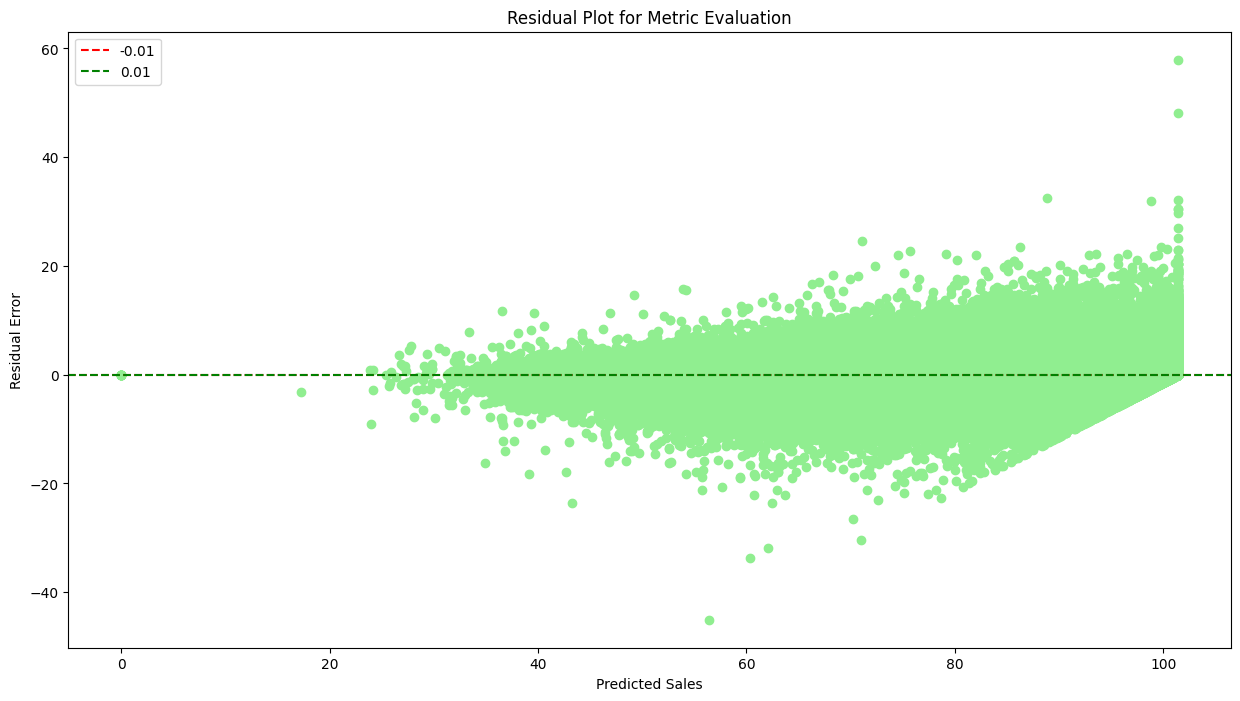

In [ ]:
# Visualizing evaluation Metric Score chart
# Calculating residuals
y_test_tree_pred= y_test_tree_pred.reshape(-1,1)
residuals_DT = y_test - y_test_tree_pred
Mean= round(np.mean(residuals_DT),2)
Median= round(np.median(residuals_DT),2)

# Plot residuals
plt.figure(figsize=(15,8))
plt.scatter(y_test, residuals_DT, c="lightgreen")
plt.title("Residual Plot for Metric Evaluation")
plt.xlabel('Predicted Sales')
plt.ylabel('Residual Error')

# Add horizontal line at mean value of y
plt.axhline(y=np.nanmean(residuals_DT), color='red', linestyle='--', label=Mean[0])
plt.axhline(y=np.nanmedian(residuals_DT), color='green', linestyle='--', label=Median)
plt.legend()

plt.show()

After simple LR models, I tried 'Decision Tree' and we saw a good increment in the r2 score from 0.81 to 0.94 which means "94% Variance of our test dataset is captured by our trained model" which is excellent. On the other side, our RMSE also decreased and shifted below 5(=3.44) which is very good. But, in the quest for more accurate and real predictions, I decided to further tune the hyperparameters and check the results.

#### 2. Cross- Validation & Hyperparameter Tuning#

In [ ]:
# importing warnigs
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# importing DecisionTree and GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

# Creating DecisionTree instance
decision_tree= DecisionTreeRegressor()

# Defining parameters
parameters= {'max_depth': [16,17,18], 'min_samples_leaf': [6,7,8], 'min_samples_split': [1,2,4]}

# Train the model
decision_trees = GridSearchCV(decision_tree, parameters, scoring='neg_mean_squared_error', cv=5)
decision_trees.fit(x_train,y_train)

# Predict the output
y_train_grid_Dtree_pred = decision_trees.predict(x_train)
y_test_grid_Dtree_pred = decision_trees.predict(x_test)

# Printing the best parameters obtained by GridSearchCV
print(f"The best alpha value found out to be: {decision_trees.best_params_}")
print(f"Negative mean square error is: {decision_trees.best_score_}")

The best alpha value found out to be: {'max_depth': 18, 'min_samples_leaf': 6, 'min_samples_split': 4}
Negative mean square error is: -10.434443807166982


In [ ]:
# Evaluating MSE and RMSE
from sklearn.metrics import mean_squared_error

MSE  = mean_squared_error(y_test, y_test_grid_Dtree_pred)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 9.72149517248516
RMSE : 3.1179312328024746


In [ ]:
# Checking R2
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_test_grid_Dtree_pred)
print("R2 :" ,r2)

R2 : 0.952695665324989


##### Which hyperparameter optimization technique have you used and why?

**Answer:-** I have used GridSearchCV as the hyperparameter optimization technique as it uses all possible combinations of hyperparameters and provides more accurate results. It then calculates the performance for each combination and selects the best value for the hyperparameters. This offers the most accurate tuning method.

#####Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

**Answer:-** I have used different combinations of parameters to get the best value of the r2 score. The best combination was found to be {'max_depth': 18, 'min_samples_leaf': 6, 'min_samples_split': 4} At this point of time we have achieved above 95% r2 Score by hyperparameter tuning of Decision trees.

#### 3. Explain each evaluation metric's indication towards business and the business impact of the ML model used.

**Answer:-**  

In regression analysis, there are several evaluation metrics that help assess the performance of a model in predicting continuous numeric values. Each metric provides insights into different aspects of model performance, and their interpretation can have implications for business decisions. Here are common regression evaluation metrics and their indications toward business impact:

1. **Mean Absolute Error (MAE):**

* Indication: MAE measures the average absolute difference between predicted and actual values. It quantifies the average magnitude of errors.
* Business Impact: A lower MAE suggests that the model makes smaller prediction errors. In business, this can translate to more accurate forecasts, helping with resource planning and cost management.

2. **Mean Squared Error (MSE):**

* Indication: MSE measures the average of the squared differences between predicted and actual values. It penalizes larger errors more heavily.
* Business Impact: MSE is valuable when larger errors have more significant consequences. For example, in finance, minimizing MSE can lead to better investment decisions.

3. **Root Mean Squared Error (RMSE):**

* Indication: RMSE is the square root of MSE. It provides an estimate of the standard deviation of prediction errors.
* Business Impact: RMSE is a more interpretable metric as it is in the same units as the target variable. It helps stakeholders understand the typical prediction error's scale.

4. **R-squared (R²):**

* Indication: R-squared measures the proportion of the variance in the dependent variable explained by the model. It ranges from 0 to 1.
* Business Impact: R-squared helps assess how well the model fits the data. A higher R-squared value indicates that the model explains more of the variability in the business outcome. This can be valuable for understanding business drivers and improving decision-making.

5. **Adjusted R-squared:**

* Indication: Adjusted R-squared accounts for the number of predictors in the model, penalizing the inclusion of irrelevant variables.
* Business Impact: Adjusted R-squared is important when choosing which variables to include in the model. It helps in building parsimonious models that focus on the most relevant predictors, saving resources and improving model interpretability.

6. **Percentage Error Metrics (e.g., MAPE, SMAPE):**

* Indication: Percentage error metrics measure the relative error as a percentage of the actual value. For example, MAPE (Mean Absolute Percentage Error) and SMAPE (Symmetric Mean Absolute Percentage Error).
* Business Impact: Percentage error metrics are commonly used in forecasting and supply chain management. They help quantify prediction accuracy in terms of percentage errors, which can be directly related to costs and service levels.

### ML Model - 3 - Random Forest Regression


In [ ]:
# importing the RandomForest
from sklearn.ensemble import RandomForestRegressor

# Storing RandomForest
RF = RandomForestRegressor(n_estimators=100, max_depth=18)

# fitting RandomForest
RF.fit(x_train, y_train)

# predict the model
y_train_RF_pred= RF.predict(x_train)
y_test_RF_pred= RF.predict(x_test)

In [ ]:
# Evaluating MSE and RMSE
from sklearn.metrics import mean_squared_error

MSE  = mean_squared_error(y_test, y_test_RF_pred)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)


# Checking R2
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_test_RF_pred)
print("R2 :" ,r2)

MSE : 6.537969371184558
RMSE : 2.5569453203352936
R2 : 0.9681865509633921


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

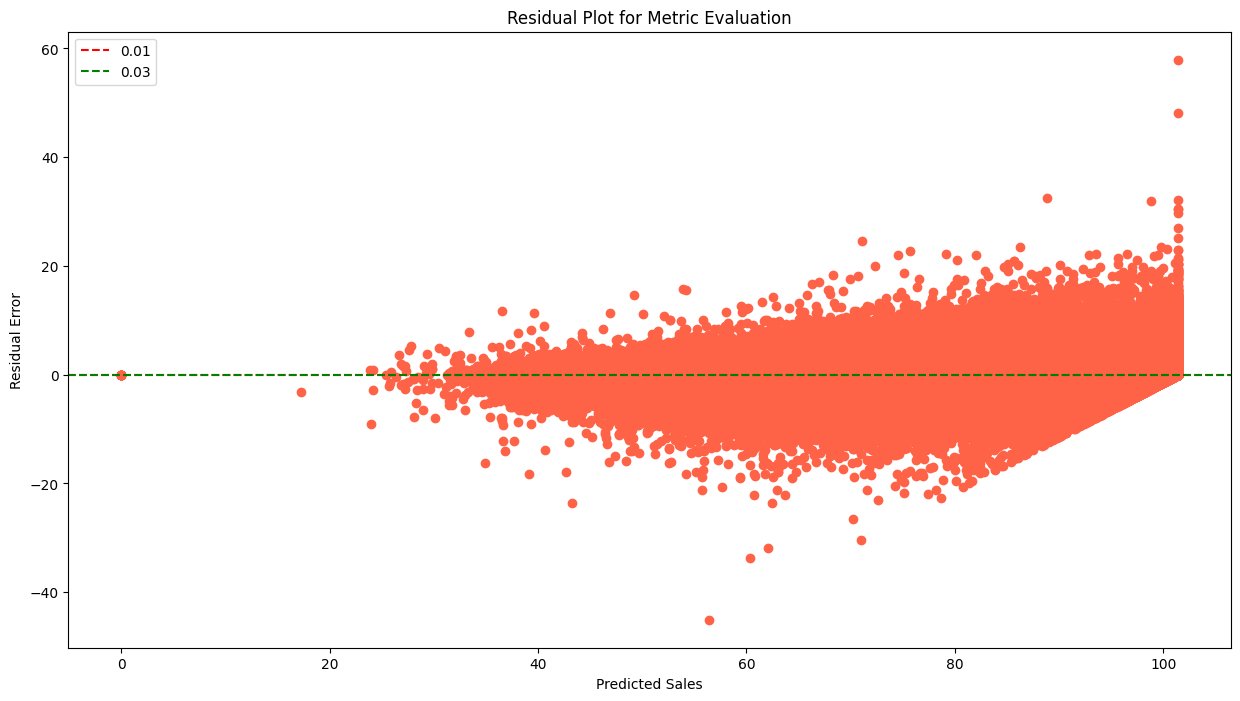

In [ ]:
# Visualizing evaluation Metric Score chart
# Calculating residuals
y_test_RFtree_pred= y_test_RF_pred.reshape(-1,1)
residuals_RF = y_test - y_test_RFtree_pred
Mean= round(np.mean(residuals_RF),2)
Median= round(np.median(residuals_RF),2)

# Plot residuals
plt.figure(figsize=(15,8))
plt.scatter(y_test, residuals_DT, c="tomato")
plt.title("Residual Plot for Metric Evaluation")
plt.xlabel('Predicted Sales')
plt.ylabel('Residual Error')

# Add horizontal line at mean value of y
plt.axhline(y=np.nanmean(residuals_RF), color='red', linestyle='--', label=Mean[0])
plt.axhline(y=np.nanmedian(residuals_RF), color='green', linestyle='--', label=Median)
plt.legend()

plt.show()

By implimenting using our third model i.e Random Forest I have achieved the r2 score of 0.97 on test dataset which's very good MSE also reduced from 9.72 to 6.53 and that means our model is moving towards optimal model.

We got the Mean=0.01 and Median=-0.03 this shows that as our accuracy increases, our mean and median are shifting towards 0 and the residual error is tending toward gaussian distribution.

In order to get the higher accuracy let's perform hyperparameter tuning for the same model and see if we are getting significant results.

#### 2. Cross- Validation & Hyperparameter Tuning

Random Forest with RandomizedSearchCV

In [ ]:
# Importing RandomSearchCv
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

# Creating RandomForest Instance
RF = RandomForestRegressor()

# Defining parameters
parameters= {'n_estimators':[100], 'max_depth': [19,20], 'min_samples_leaf': [1, 2]}

# Train the model
RF_tree = RandomizedSearchCV(RF, parameters, n_iter=3, n_jobs=-1, scoring='neg_mean_squared_error', cv=3,  verbose=3)
RF_tree.fit(x_train,y_train)

# Predict the output
y_train_grid_RFtree_pred = RF_tree.predict(x_train)
y_test_grid_RFtree_pred = RF_tree.predict(x_test)

# Printing the best parameters obtained by GridSearchCV
print(f"The best alpha value found out to be: {RF_tree.best_params_}")
print(f"Negative mean square error is: {RF_tree.best_score_}")

Fitting 3 folds for each of 3 candidates, totalling 9 fits
The best alpha value found out to be: {'n_estimators': 100, 'min_samples_leaf': 2, 'max_depth': 20}
Negative mean square error is: -6.534561124649776


In [ ]:
# Evaluating MSE and RMSE
from sklearn.metrics import mean_squared_error

MSE  = mean_squared_error(y_test, y_test_grid_RFtree_pred)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)


# Checking R2
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_test_grid_RFtree_pred)
print("R2 :" ,r2)

MSE : 5.919742609981198
RMSE : 2.4330521182213087
R2 : 0.9711948130772061


##### Which hyperparameter optimization technique have you used and why?

**Answer:-**

I have used RandomizedSearchCV in Random Forest since we have a huge dataset and it is good for huge and complex models where we just want to select random parameters from the bag of parameters. It reduces the processing and training time by taking the random subsets of the provided parameters without compromising the accuracy of the model.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

**Answer:-** After using RandomizedSearchCV with different hyperparameters we saw that their is not much significant improvement observed. Although MSE on test dataset has been reduced from 6.53 to 5.91.

### ML Model - 4 - XGBoost Regression

In [ ]:
# Importing XGboost Regression
from xgboost import XGBRegressor

# Storing into xgbr
xgbr = XGBRegressor(learning_rate=0.2, max_depth=10)

# fit the regressor with X and Y data
xgbr.fit(x_train, y_train)

# predict the model
y_train_xgbr_pred= xgbr.predict(x_train)
y_test_xgbr_pred= xgbr.predict(x_test)

In [ ]:
# Evaluating MSE and RMSE
from sklearn.metrics import mean_squared_error

MSE  = mean_squared_error(y_test,y_test_xgbr_pred)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)


# Checking R2
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_test_xgbr_pred)
print("R2 :" ,r2)

MSE : 5.396250362271117
RMSE : 2.3229830740388784
R2 : 0.9737421015391229


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


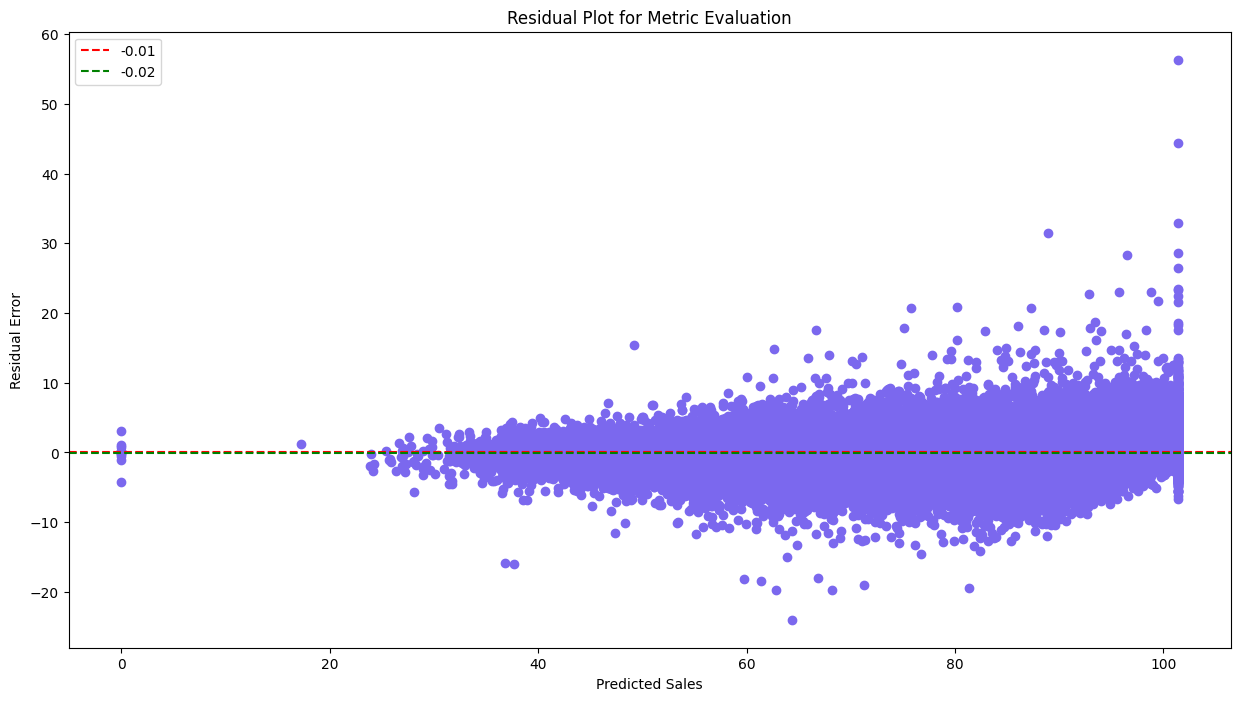

In [ ]:
# Visualizing evaluation Metric Score chart
# Calculating residuals
y_test_xgbr_pred= y_test_xgbr_pred.reshape(-1,1)
residuals_XG = y_test - y_test_xgbr_pred
Mean= round(np.mean(residuals_XG),2)
Median= round(np.median(residuals_XG),2)

# Plot residuals
plt.figure(figsize=(15,8))
plt.scatter(y_test, residuals_XG, c="mediumslateblue")
plt.title("Residual Plot for Metric Evaluation")
plt.xlabel('Predicted Sales')
plt.ylabel('Residual Error')

# Add horizontal line at mean value of y
plt.axhline(y=np.nanmean(residuals_XG), color='red', linestyle='--', label=Mean[0])
plt.axhline(y=np.nanmedian(residuals_XG), color='green', linestyle='--', label=Median)
plt.legend()

plt.show()


* XGBoost (Extreme Gradient Boosting) is a Gradient-boosting algorithm and is very popular for achieving good accuracies.

* I got the Mean= -0.01 and Median= -0.02 which is also super close to 0 which means our residuals are perfectly following normal distribution against Sales.

* I got an r2 score of 0.97 the for testing dataset which is excellent and Similar to Random Forest. I were very curious and excited at this point in time to further improve the efficiency of our model and for this I have again decided to tune the various hyperparameters of xgboost.

#### 2. Cross- Validation & Hyperparameter Tuning

XGBoost with GridSearchCV

In [ ]:
# XGBoost with RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

# Creating XGBoost instance
xgb = XGBRegressor()

# Defining parameters
parameters={"learning_rate":[0.01, 0.1],"max_depth":[12,13]}

# Train the model
xgb_Rand_R= GridSearchCV(xgb,parameters,scoring='neg_mean_squared_error',n_jobs=-1,cv=3,verbose=3)
xgb_Rand_R.fit(x_train,y_train)

# Predict the output
y_train_rand_xgbR_pred = xgb_Rand_R.predict(x_train)
y_test_rand_xgbR_pred = xgb_Rand_R.predict(x_test)

# Printing the best parameters obtained by GridSearchCV
print(f"The best alpha value found out to be: {xgb_Rand_R.best_params_}")
print(f"Negative mean square error is: {xgb_Rand_R.best_score_}")

Fitting 3 folds for each of 4 candidates, totalling 12 fits
The best alpha value found out to be: {'learning_rate': 0.1, 'max_depth': 13}
Negative mean square error is: -5.416800782003681


In [ ]:
# Evaluating MSE and RMSE
from sklearn.metrics import mean_squared_error

MSE  = mean_squared_error(y_test, y_test_rand_xgbR_pred)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)


# Checking R2
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_test_rand_xgbR_pred)
print("R2 :" ,r2)

MSE : 5.151379998814758
RMSE : 2.2696651732832223
R2 : 0.9749336291199538


##### Which hyperparameter optimization technique have you used and why?

**Answer:-**
XGboost is a heavy algorithm and takes much processing time with GridSearchCV. So, tuning of hyperparameter with GridSearchCV was a bit complicated task for me but I have used less parameters in GridSearchCV because we didn't want to miss the best parameter combination.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

**Answer:-**

Minor improvement in regresson metrics are also significant now as we are moving towards model perfection. With the help of GridSearchCV we got the r2 score of 0.97 (Now 97% of the variance of test set our model is capturing) for test dataset which is littel bit higher than without RandomizedSearchCV and the best parameters found out to be{'learning_rate': 0.1, 'max_depth': 13}. Also I have noticed MSE is also reduced to 5.15. I have also seen that on further increasing the max_depth of tree our model is overfitting so above values of parameters are the best combinations.


### 1. Which Evaluation metrics did you consider for a positive business impact and why?

**Answer:-**

In a regression problem, choosing the right evaluation metrics is crucial to ensure a positive business impact. The choice of metrics depends on the specific goals and requirements of the business problem. Here are some commonly used evaluation metrics for regression and their implications for business impact:

1. Mean Absolute Error (MAE):

* Business Impact: MAE represents the average magnitude of errors in prediction. Lower MAE means the model's predictions are closer to the actual values.
* Use Case: MAE is useful when the cost of errors is linear and consistent across all predictions. For example, in a sales forecasting model, MAE would help ensure that revenue predictions are accurate on average.

2. Mean Squared Error (MSE):

* Business Impact: MSE emphasizes larger errors, penalizing them more compared to MAE. It's sensitive to outliers.
* Use Case: MSE is appropriate when there are significant consequences for large errors. For example, in a healthcare model predicting patient recovery time, MSE would prioritize minimizing extremely long recovery time predictions.

3. Root Mean Squared Error (RMSE):

* Business Impact: RMSE is similar to MSE but provides results in the same units as the target variable. It's easier to interpret as it's on the same scale.
* Use Case: RMSE is useful when stakeholders need to easily understand the magnitude of prediction errors. For example, in a real estate price prediction model, RMSE would represent the average dollar amount by which predictions deviate from actual prices.

4. Coefficient of Determination (R-squared or R2):

* Business Impact: R-squared measures the proportion of the variance in the target variable explained by the model. A higher R-squared indicates a better fit.
* Use Case: R-squared is valuable when stakeholders need to understand how well the model captures the variance in the data. For example, in a marketing campaign ROI prediction model, a high R-squared suggests that the model accounts for most of the variation in ROI.

5. Mean Absolute Percentage Error (MAPE):

* Business Impact: MAPE measures the percentage difference between predicted and actual values. It's interpretable in terms of percentage error.
* Use Case: MAPE is helpful when stakeholders need to assess prediction accuracy in percentage terms. For instance, in a demand forecasting model for inventory management, MAPE would quantify the percentage deviation in demand predictions.

Ultimately, the choice of evaluation metrics should align with the business's goals and priorities. It's often a good practice to consider multiple metrics to gain a holistic view of the model's performance and its potential impact on the business.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

**Answer:-**

**1. Model:- Linear Regression**

* MSE : 37.90359292523964
* RMSE : 6.156589390664253
* R2  : 0.8155629086112705

**2. Model:- Decision Tree**

* MSE : 9.72149517248516
* RMSE : 3.1179312328024746
* R2 : 0.952695665324989

**3. Model:- RandomForest**

* MSE : 5.919742609981198
* RMSE : 2.4330521182213087
* R2 : 0.9711948130772061

**4. Model:- XGBoost Regression**

* MSE : 5.151379998814758
* RMSE : 2.2696651732832223
* R2 : 0.9749336291199538


I have chosen XGboost as our final prediction model with hyperparameters {'learning_rate': 0.1, 'max_depth': 13} as it is very clear from above dataframe that it has given the highest r2 score(0.97) least MSE (5.15%) and least RMSE (2.26%) on the testing dataset among all other models.

I can also choose RandomForest because XGBoost Regression and RandomForest have almost the same r2 scores MSE, and RMSE.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

**Answer:-**

XGBoost (Extreme Gradient Boosting) provides an efficient implementation of the gradient boosting framework. It is designed for both linear and tree-based models, and it is useful for large datasets. The basic idea behind XGBoost is to train a sequence of simple models, such as decision trees, and combine their predictions to create a more powerful model. Each tree is trained to correct the errors made by the previous trees in the sequence and this known as boosting.

XGBoost uses a technique called gradient boosting to optimize the parameters of the trees. It minimizes the loss function by adjusting the parameters of the trees in a way that reduces the error of the overall model. XGBoost also includes a number of other features, such as regularization, which helps to prevent overfitting, and parallel processing, which allows for faster training times.

Although tree based algorithm gives most accurate results but they have less explanability. With the help of some explanabilty tools like LIME and SHAP we can explain our model to the stakeholders

We can approach Model explainability by two methods

1. Globally - how features in the data collectively affect the result. eg. Linear regression.

2. Locally- It tells us how features individually affect results eg. Shap, LIME

###Global Explainability

Text(0.5, 0, 'Relative Importance')

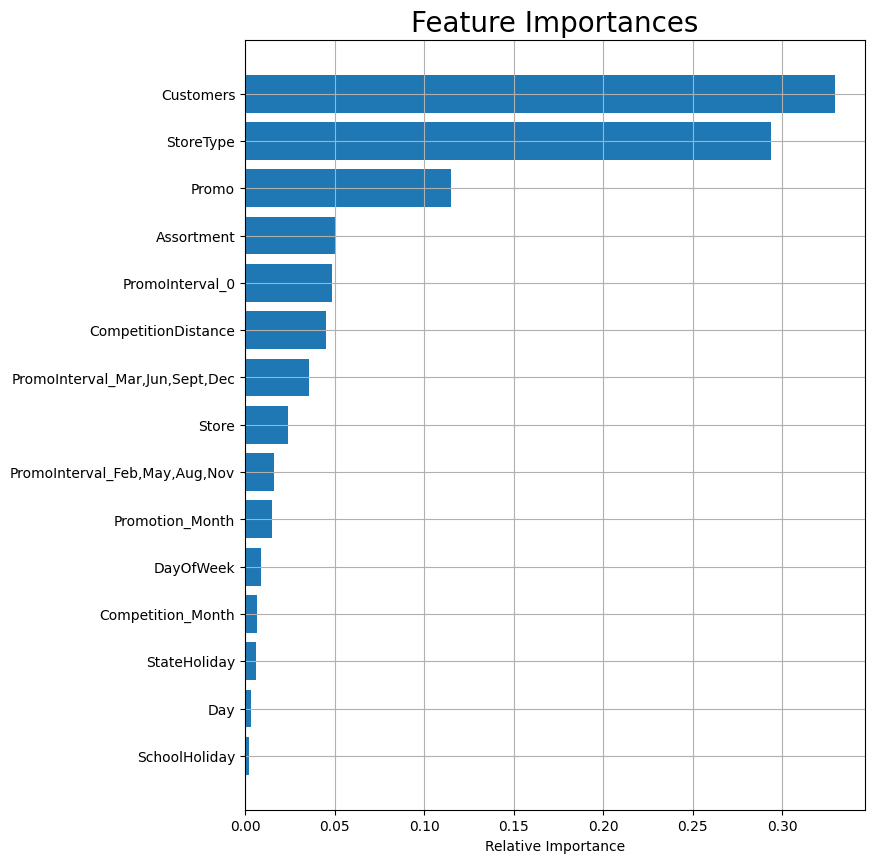

In [ ]:
# Plotting the barplot to determine which feature is contributing the most
features = data_new.columns
importances = xgbr.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(8,10))
plt.grid(zorder=0)
plt.title('Feature Importances', fontsize=20)
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

In [ ]:
# Checking the percentage of feature importance
feature_imp = pd.DataFrame(columns = ['Variable','Importance'])
feature_imp.Variable = features[:-1]
feature_imp.Importance = importances*100
feature_imp.sort_values(by="Importance",axis=0,ascending=False)

Variable  Importance
2                        Customers   32.974297
6                        StoreType   29.364618
3                            Promo   11.501778
7                       Assortment    5.030341
9                  PromoInterval_0    4.854129
8              CompetitionDistance    4.516783
11  PromoInterval_Mar,Jun,Sept,Dec    3.551548
0                            Store    2.398750
10   PromoInterval_Feb,May,Aug,Nov    1.606059
14                 Promotion_Month    1.484269
1                        DayOfWeek    0.876771
13               Competition_Month    0.696575
4                     StateHoliday    0.594993
12                             Day    0.331166
5                    SchoolHoliday    0.217922

As I have considered XGboost as our final optimal model with very good accuracies but still this model is considered as black box model since I don't know actually what is happening inside the algorithm. In order to gain the trust of stakeholders I have to explain the model and under which conditions the model is predicting that particular result with a valid and senseful reason. So, in order to increase the explainability I have plotted the bar plot for decresing sequence of feature importance.

From the above plot it is clear that for XGboost model "Customers" is contributing maximum i.e 33% in the final outcome, "StoreType" is contributing 29% and followed by "Promo", "Assortment" and "Promo_Interval_0".

I have achieved an r2 of 81% with the help of linear regression but to attain more r2 and eventually scale up your business I have done this with the help of random forest, Xgboost, and decision tree but they are black box models(can't explain) so we use MODEL EXPLAINABLITY tool SHAP.

Explanability using SHAP


SHAP (Shapley Additive Explanations) It is used to calculate the impact of each feature of the model on the final result.

Here I am using TreeExplainer (for the analysis of decision trees)

In [ ]:
# installing shap
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 5.3 MB/s eta 0:00:00


In [ ]:
# Storing our features into new variable
features = data_new.columns[:-1]

In [ ]:
#checking the values in the list
features

Index(['Store', 'DayOfWeek', 'Customers', 'Promo', 'StateHoliday',
       'SchoolHoliday', 'StoreType', 'Assortment', 'CompetitionDistance',
       'PromoInterval_0', 'PromoInterval_Feb,May,Aug,Nov',
       'PromoInterval_Mar,Jun,Sept,Dec', 'Day', 'Competition_Month',
       'Promotion_Month'],
      dtype='object')

In [ ]:
# Checking the first observation
x_test[0:1]

array([[-1.01768926,  1.43856563, -1.01728797, -0.89788727, -0.02979595,
        -0.48994681,  1.31629384,  1.07091631,  0.12631277, -1.00263495,
         2.75967486, -0.32500153, -0.55688493, -0.65565071,  1.77057648]])

In [ ]:
# importing warnings
import warnings
warnings.filterwarnings("ignore")

# Importing shap
import shap

#creating an explainer for a tree-based model.
explainer = shap.TreeExplainer(xgbr)
shap_values = explainer.shap_values(x_test[0:1])

In [ ]:
#initialize the JavaScript visualization in the notebook environment
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values=shap_values[0], features = features)

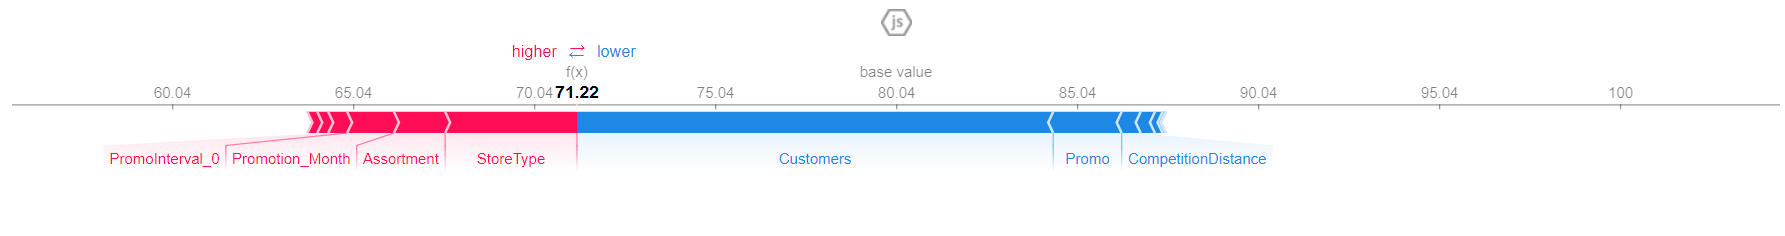

In [ ]:
# Printing predicted Y value for test
y_test_rand_xgbR_pred[0:1]

array([72.09249], dtype=float32)

In [ ]:
# Actual value of Y from test data
y_test[0:1]

Sales
123995  74.128267

In [ ]:
# printing all columns
x_test[0:1]

array([[-1.01768926,  1.43856563, -1.01728797, -0.89788727, -0.02979595,
        -0.48994681,  1.31629384,  1.07091631,  0.12631277, -1.00263495,
         2.75967486, -0.32500153, -0.55688493, -0.65565071,  1.77057648]])

Here we can see Customers Variable is very negative. That's why we are shifting towards the left side.

We can see that the baseline value is 80.04 and our function is predicting 71.22 which is Negatively far away.


In [ ]:
#passing the second test sample
shap_values = explainer.shap_values(x_test[1:2])

In [ ]:
#initialize the JavaScript visualization in the notebook environment
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values=shap_values[0], features = features)

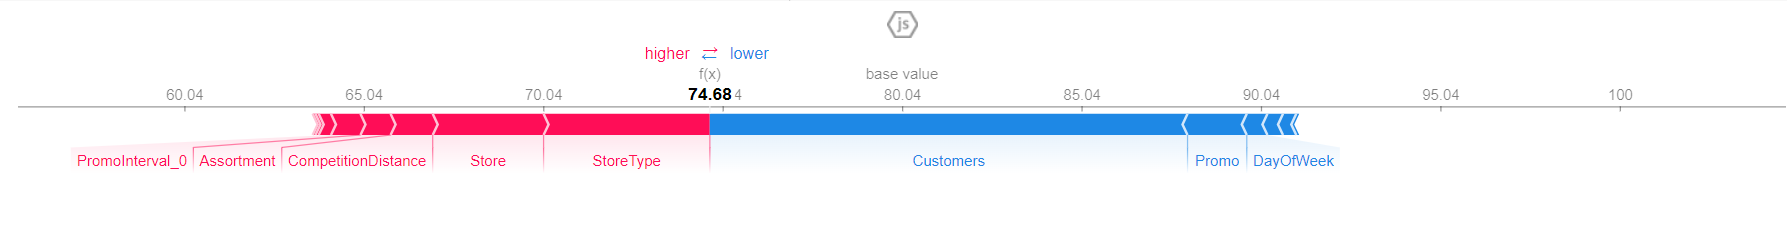

I can see that the baseline value is 80.04 and our function is predicting 74.68 which negatively far away. customers and storeType are mainly responsible for that Left shift And From the opposite direction Store and StoreType act on it to partially balance it out.

In [ ]:
#passing the third test sample
shap_values = explainer.shap_values(x_test[2:3])

In [ ]:
#initialize the JavaScript visualization in the notebook environment
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values=shap_values[0], features = features)

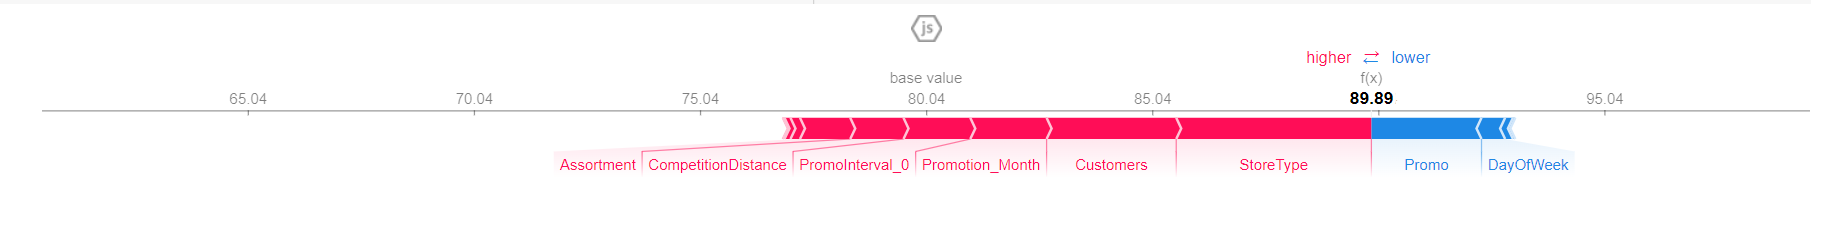

I can see that the baseline value is 85.04 and our function is predicting 89.89 which is quite good.
customers and storeType are mainly responsible for that Right shift And From the opposite direction Promo and DayOfWeek acts on it to partially balance it out.

# **Conclusion**

## **Conclusion From EDA**

Exploratory Data Analysis (EDA) is an important step because it allows for the initial investigation of a dataset. It helps to identify patterns, anomalies, and relationships in the data, as well as to detect any potential issues such as missing values or outliers. EDA also helps to generate hypothesis and inform the development of more advanced modeling techniques, such as machine learning. Additionally, it is a good way to understand the data, which is crucial for good decision making. EDA also helps to provide a deeper understanding of the data and helps to guide the direction of further analysis. After performing EDA we have drawn the following conclusions:

* The Sales vs. Customers graph shows a positive correlation between 'Sales' and
'Customers'. As the number of customers increases, the sales also tend to increase.

* From plot sales and competition Open Since Month shows sales are highest in Jan, May, June, and August compared to other months.

* From plot Sales and day of the week, Sales highest on Monday and start declining from Tuesday to Saturday and on Sunday Sales almost near to Zero.

* The Plot between Promotion and Sales shows that promotion helps in increasing Sales.

* Sales are highest for the assortment B . This assortment may have a good mix of products that are in high demand or that are unique to the store, which would result in more sales.

* We observed that mostly the competitor stores weren't that far from each other and the stores densely located near each other saw more sales.

* We can conclude that Sales are high during the year 1900, as there are very few store were operated of Rossmann so there is less competition and sales are high. But as year pass on number of stores increased that means competition also increased and this leads to decline in the sales.

* We can see when we do promotion we got more sale but in year 2013 we have least sales ever.

* We can observe in a week on sunday all store are closed only few are open.

* All Stores run promotion on monday to friday and saturday, sunday no promotion happen in any store.

* We can see only half of the stores run promotion activities.

* We can see the promo_interval Jan, Apr, Jul, Oct records the 2nd highest sales as it marks the festive season.


## **Conclusions drawn from ML Model Implementation**


Close predictions of any ML model highly impacts the business growth. Before going to further model deployment one should have to check how accurately the model is predicting and performing with the real life data.

* I have implemented various regression model started with Linear Regression and then I have tried other non linear models too. For each of the model I have tried to tune the hyperparameters as well in order to minimize the errors and drawn following conclusions

* In Linear Regression I got the r2_score of 81% and the model is capturing 81% of variance even after using regularization techniques that means our data is not perfectly linearly dependent with target variable(Sales).

* For Decsion Tree we have achieved 94% accuracy with a maximum depth of 18 and on increasing the depth over it we are falling towards overfitting and after the regularization I got 95% r2_score.

* Giving preference to each of the variable always results in better r2 score. Ensemble technique i.e Random Forest has given the r2 score of 96% with total trees of 100. after the hyperparameter tuning I got 97.11%.

* I have also tried gradiant boosting technique with XGBoost Regression although we got the similar results as Random Forest(97.49%) but we got the more fast results as it has used all the cores and decrease processing time. While training the large dataset one should try XGBoost Regression for good results in less time.




### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***